

# Template Ujian Tengah Semester 2023
Tanggal: 07 November 2023 - 14.10 - 15.50

Materi: EDA dan Klasifikasi

oleh: Dr. Farrikh Alzami, M.Kom

## Latar Belakang Masalah


## Tujuan Ujian Sertifikasi

## Terkait Dataset
Sumber data:   
Jumlah Sampel Data: XX records dengan XX atributes

**Atribut untuk XXX**:


**Fitur target**:

Class: xxx


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

## Load Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [ ]:
pd.set_option('display.max_columns', None)

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Pak Farrikh/')

Mounted at /content/drive


**silakan ubah dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Pak Farrikh/crx.data', header=None)

In [ ]:
# dataset = pd.read_csv('xxx', header=xxx)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### memasukkan nama fitur kedalam dataset

**silakan dirubah kolom dataset**

In [ ]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14", "A15", "A16"]

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### analisis karakteristik data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**temuan**: ada beberapa bernilai int64, namun ada yang bernilai Object

### cek deskripsi data

In [ ]:
dataset.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


**temuan**: dari head dan tail, kita lihat semua berbentuk angka, namun ada yang bernilai `?`, ini yang menyebabkan tipe data menjadi `Object`, maka diperlukan proses untuk merubah `?` menjadi bisa digunakan

### cek distribusi Class

**silakan diganti dengan label yang sesuai**

In [ ]:
dataset['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

keterangan:

**temuan**: [distribusi class xxx]

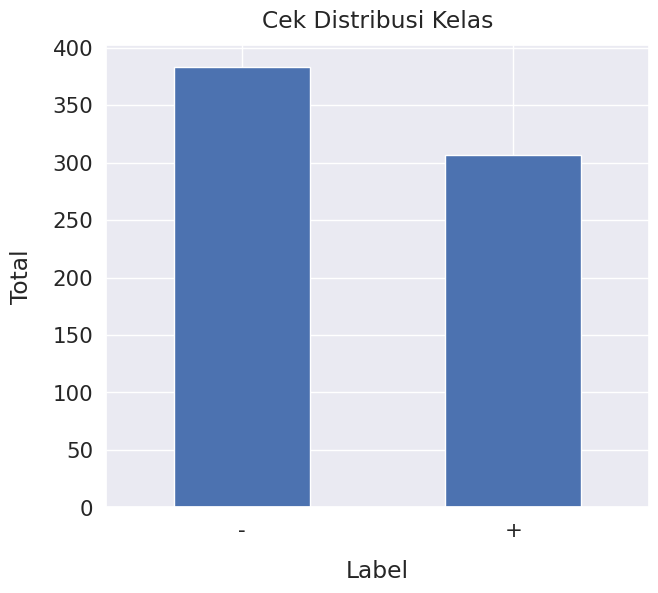

In [ ]:
sns.set(font_scale=1.4)
dataset['A16'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.title("Cek Distribusi Kelas", y=1.02);

## Cek Distribusi A1


In [ ]:
print(dataset['A1'].value_counts())

b    468
a    210
?     12
Name: A1, dtype: int64


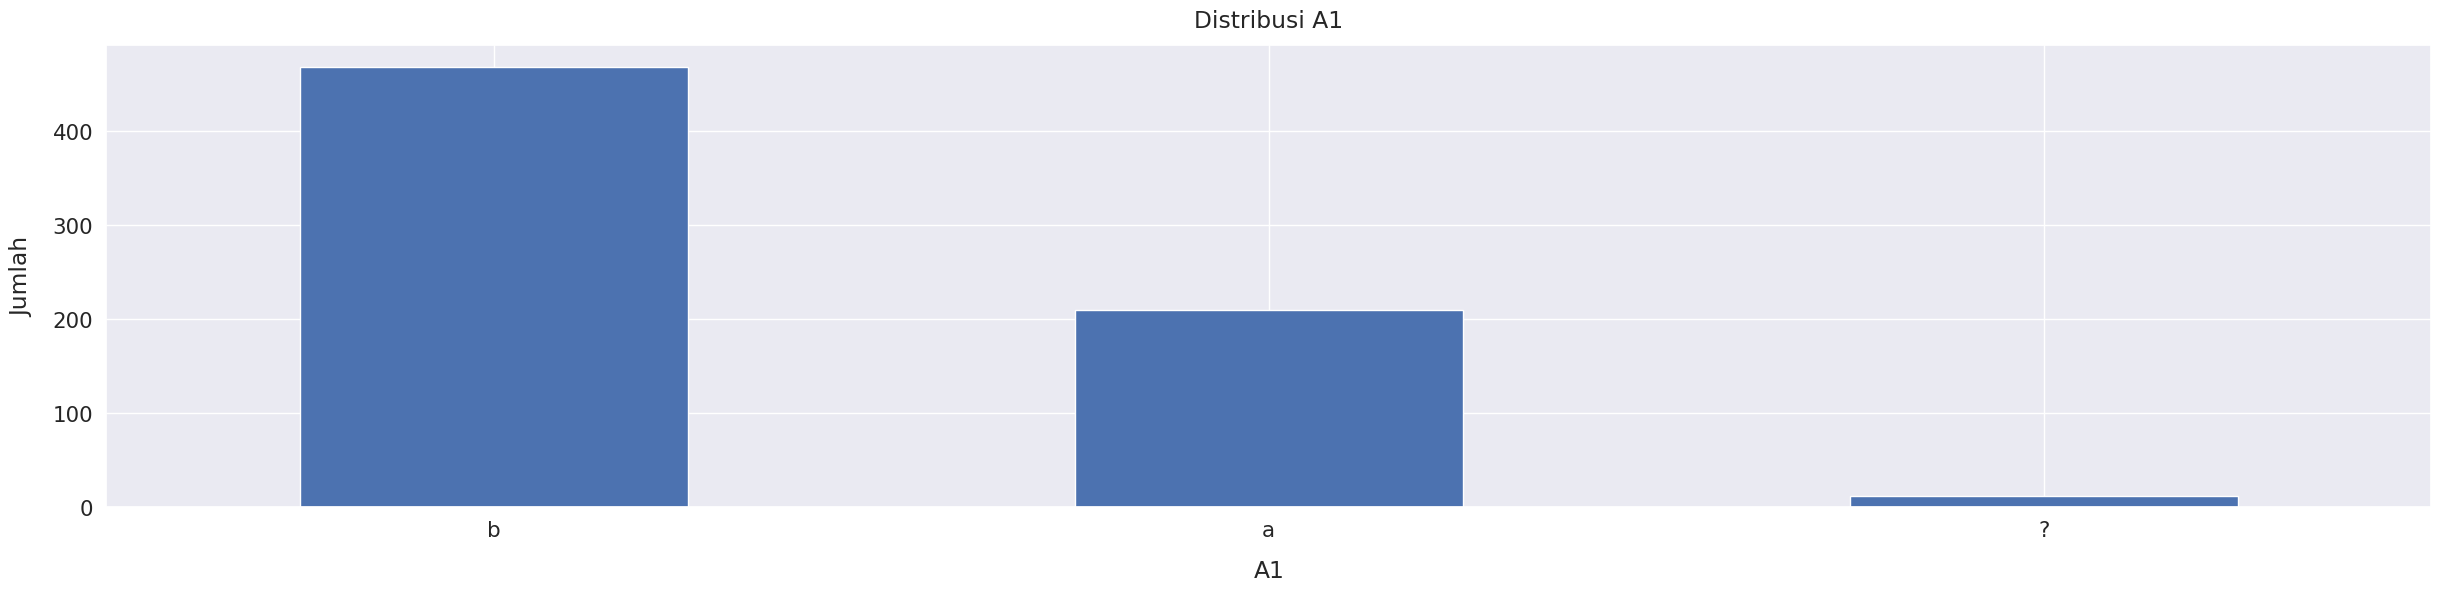

In [ ]:
sns.set(font_scale=1.4)
dataset['A1'].value_counts().plot(kind='bar', figsize=(30, 6), rot=0)
plt.xlabel("A1", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A1", y=1.02);

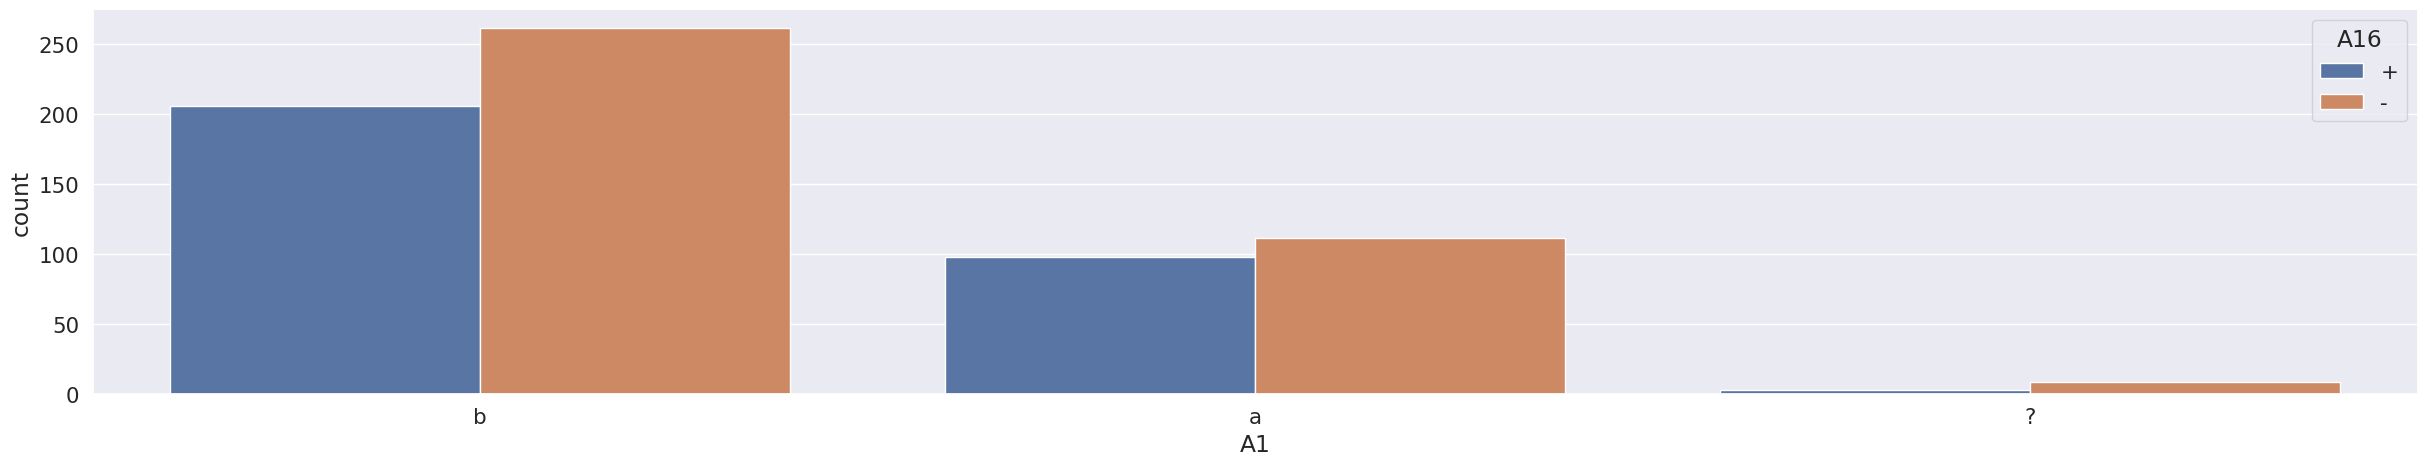

In [ ]:
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['A16'])
plt.show()

temuan: A1 itu banyak yang terkena rejected baik dari nilai B dan A

# Cek Distribusi A2

In [ ]:
print(dataset['A2'].value_counts())

?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: A2, Length: 350, dtype: int64


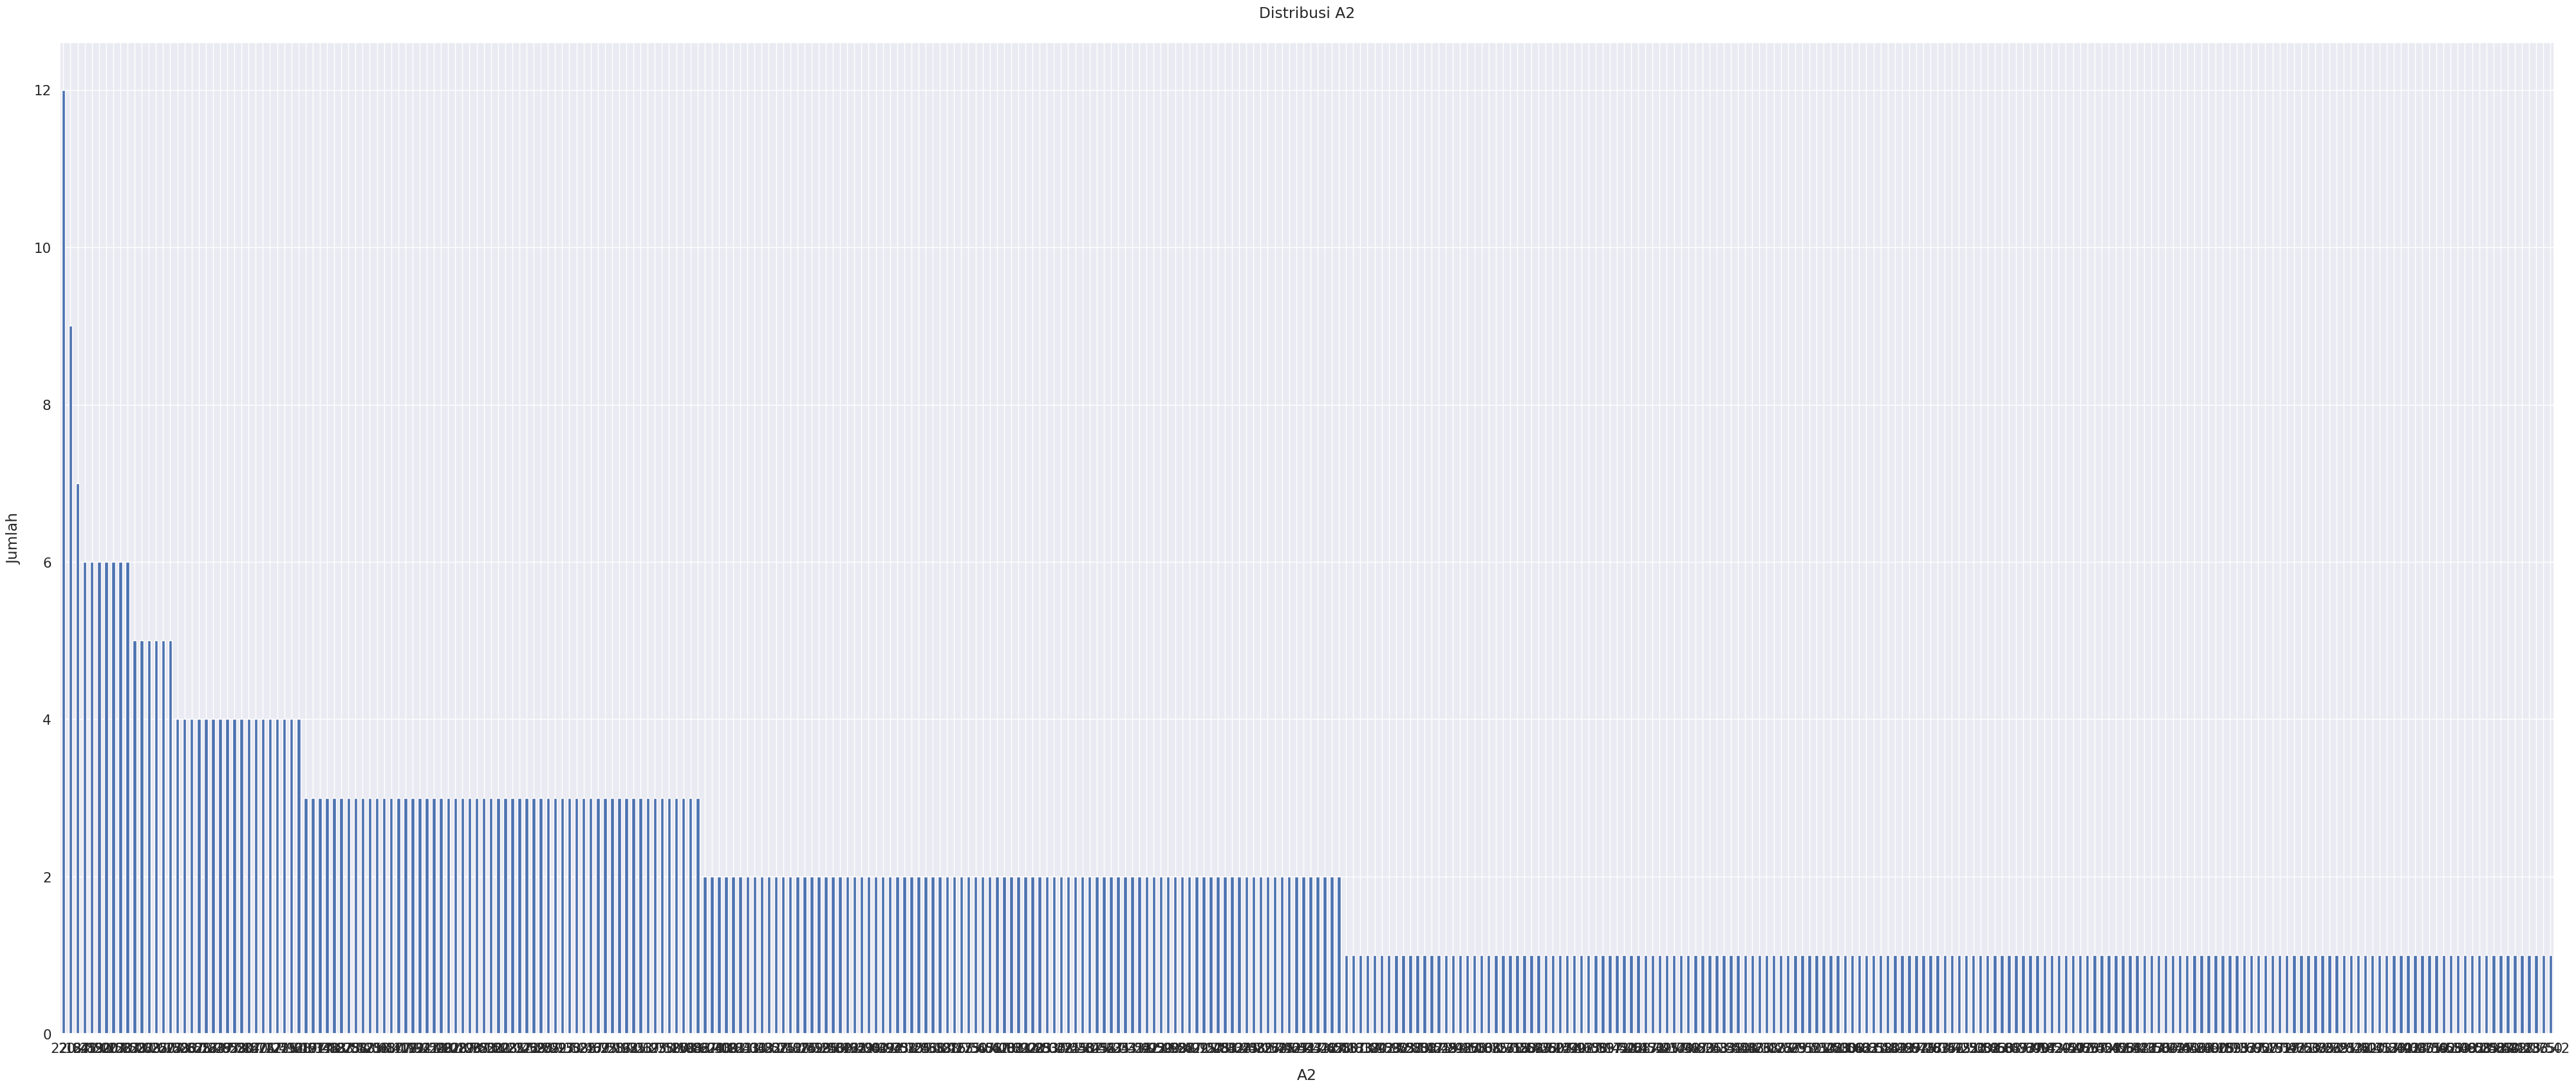

In [ ]:
sns.set(font_scale=1.4)
dataset['A2'].value_counts().plot(kind='bar', figsize=(50, 20), rot=0)
plt.xlabel("A2", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A2", y=1.02);

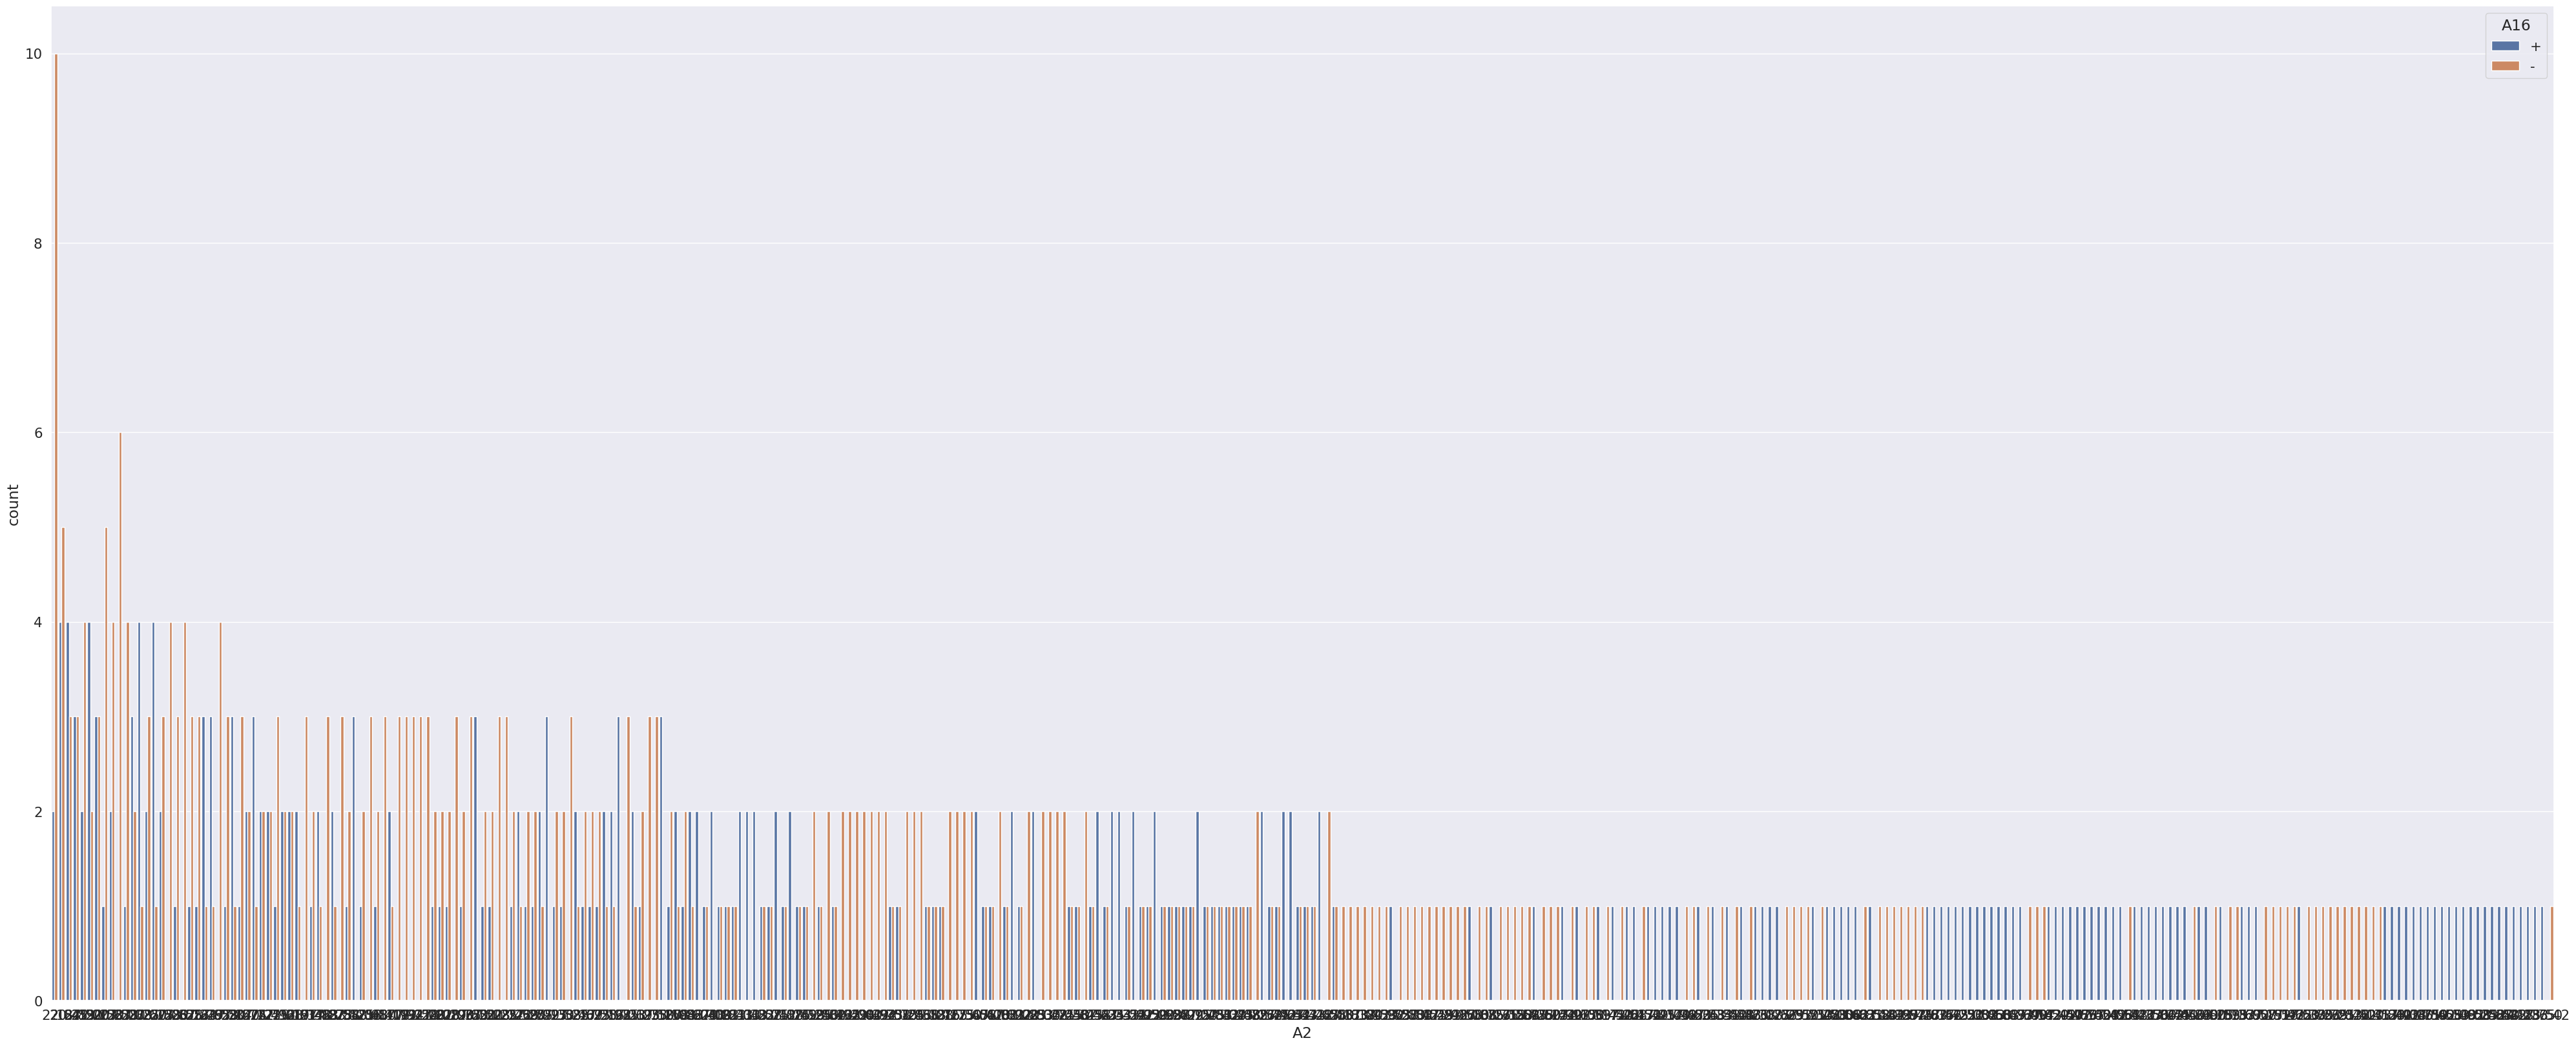

In [ ]:
plt.subplots(figsize = (50,20))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['A16'])
plt.show()

temuan: A2

# Cek Distribusi A3

In [ ]:
print(dataset['A3'].value_counts())

1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: A3, Length: 215, dtype: int64


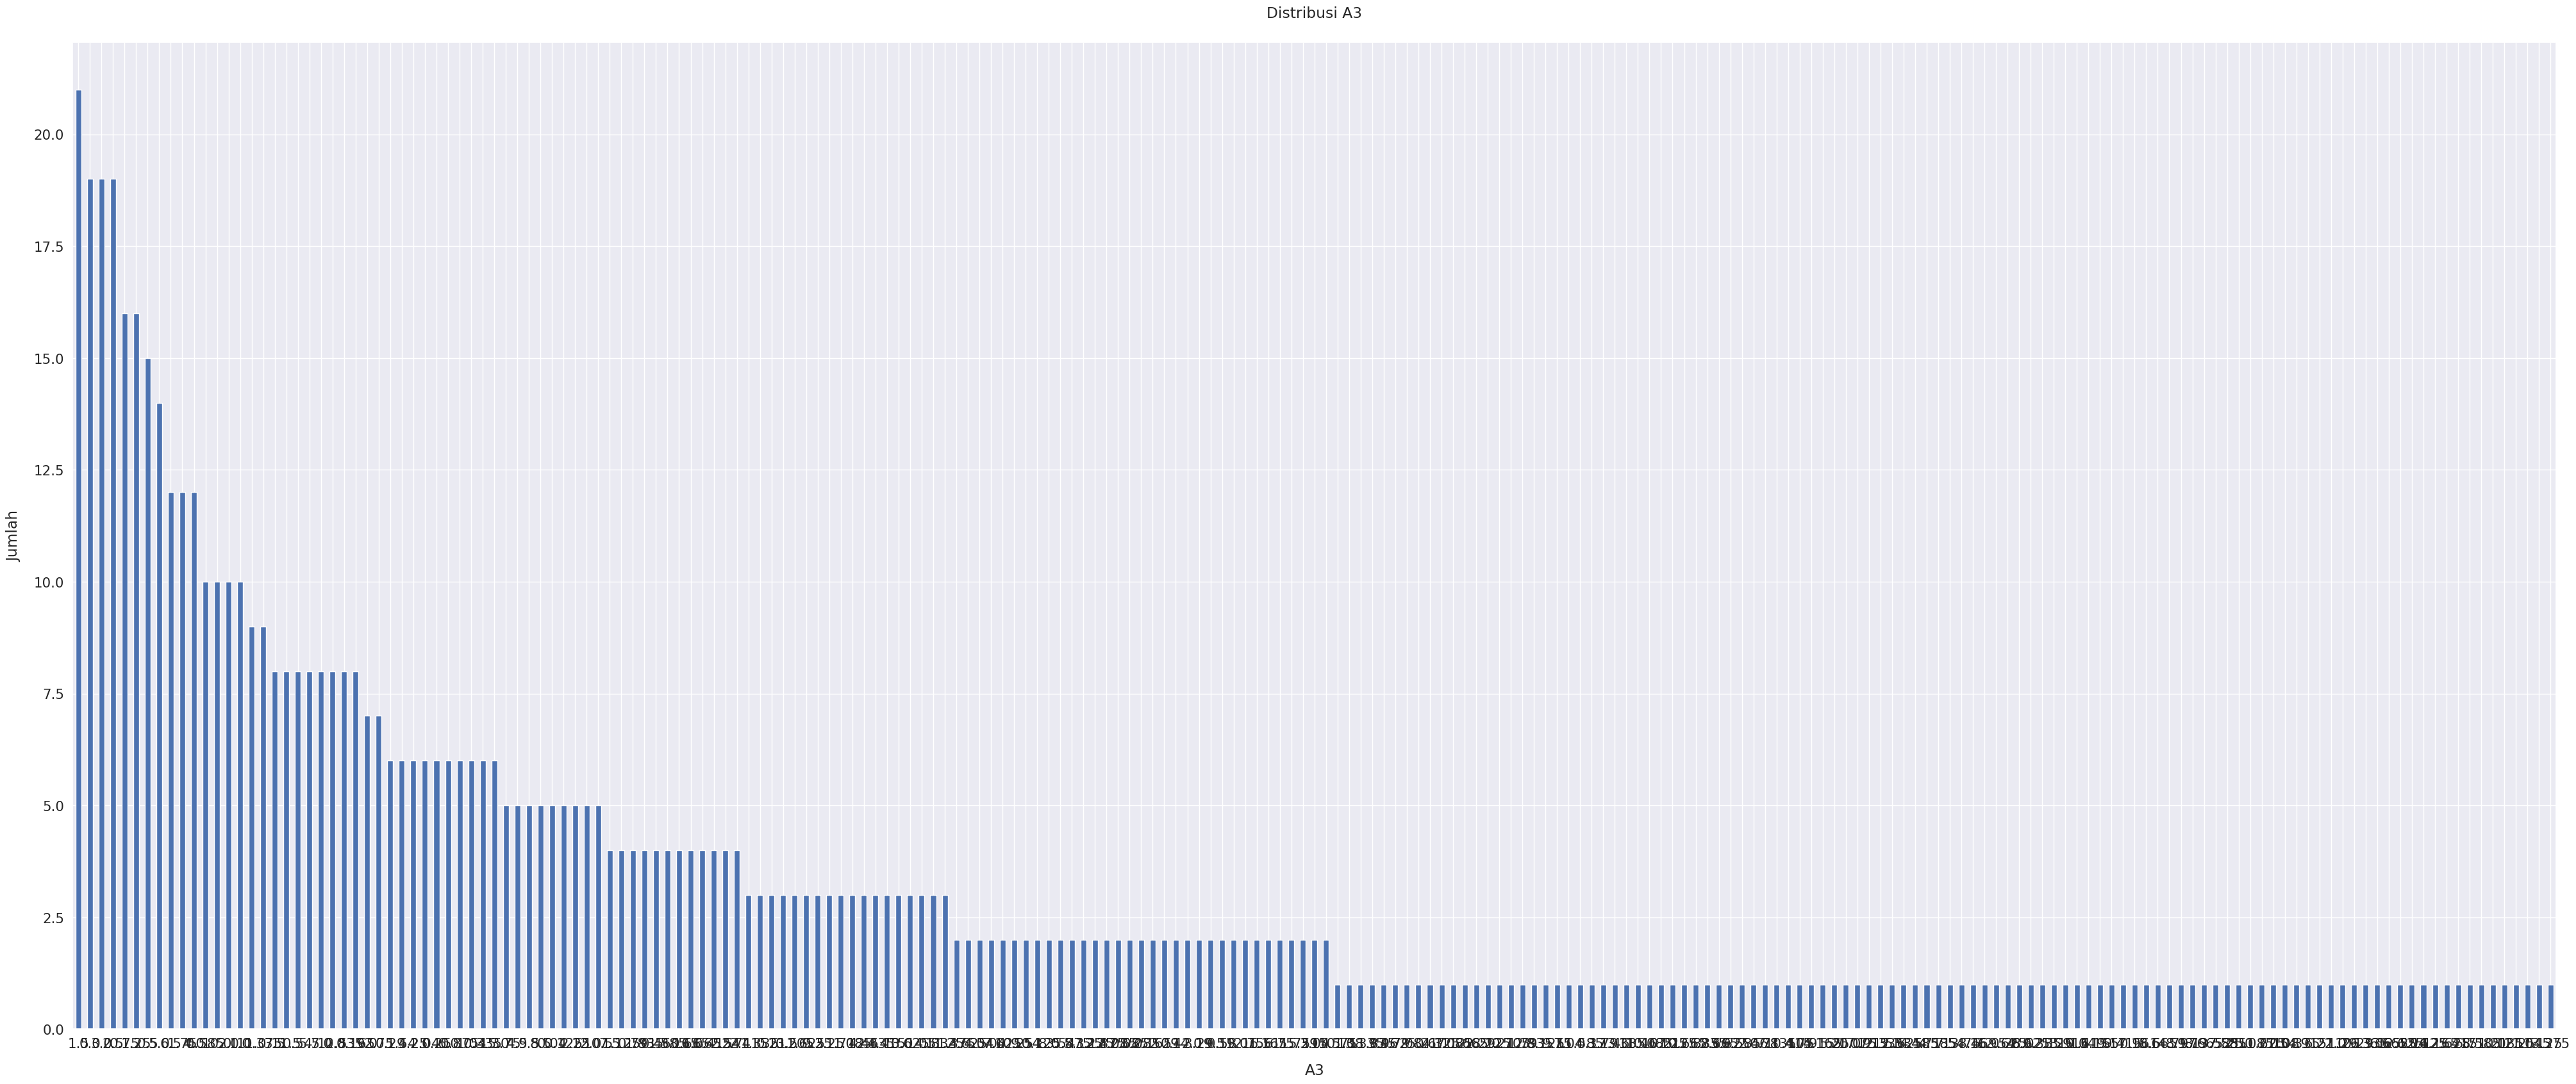

In [ ]:
sns.set(font_scale=1.4)
dataset['A3'].value_counts().plot(kind='bar', figsize=(50, 20), rot=0)
plt.xlabel("A3", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A3", y=1.02);

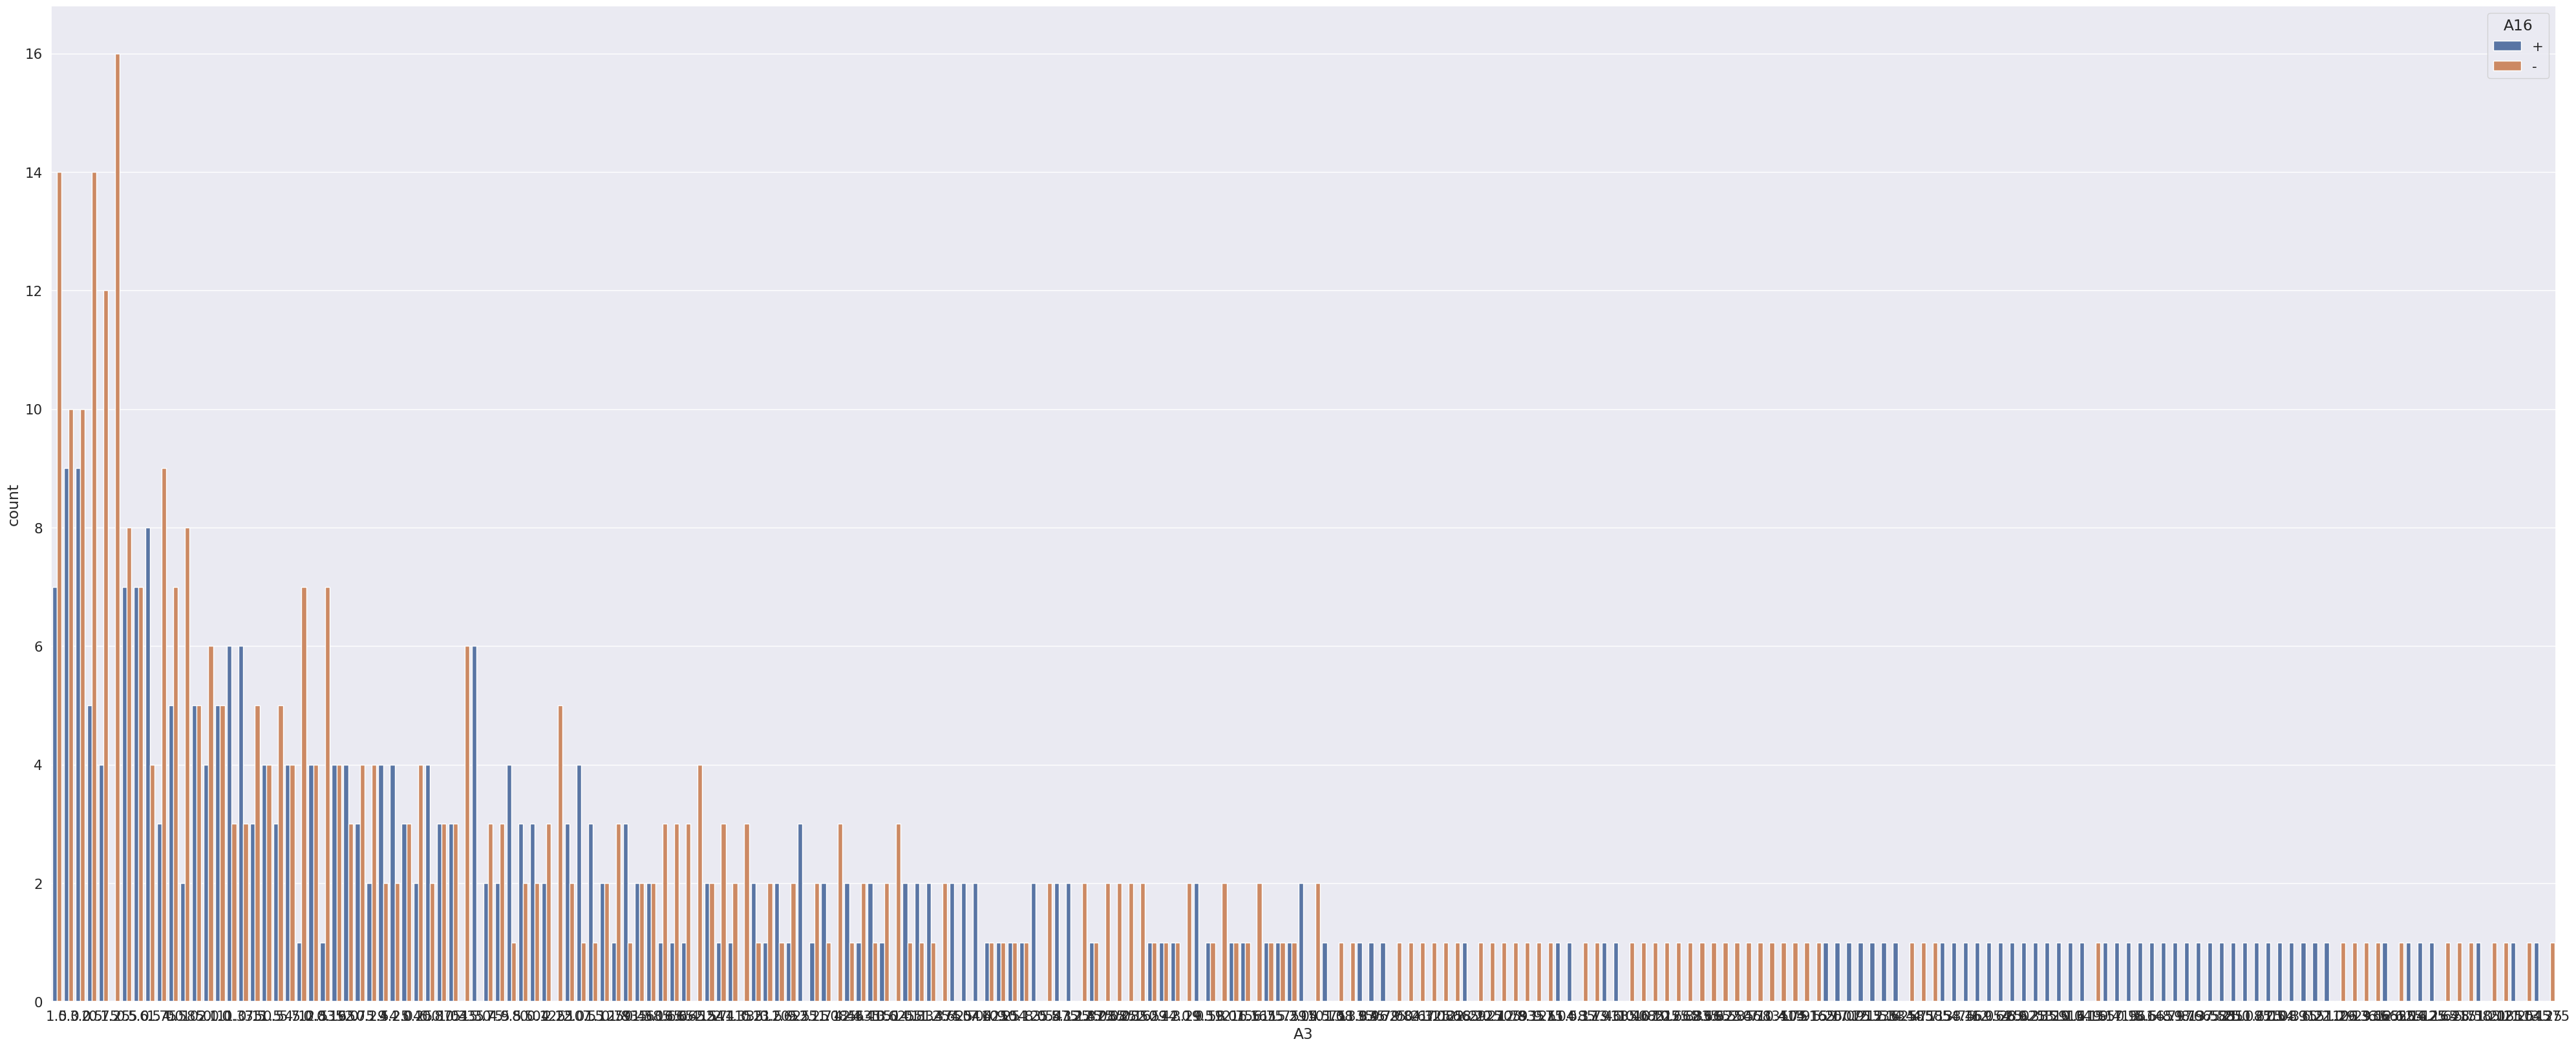

In [ ]:
plt.subplots(figsize = (50,20))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['A16'])
plt.show()

temuan: A3

# Cek Distribusi A4

In [ ]:
print(dataset['A4'].value_counts())

u    519
y    163
?      6
l      2
Name: A4, dtype: int64


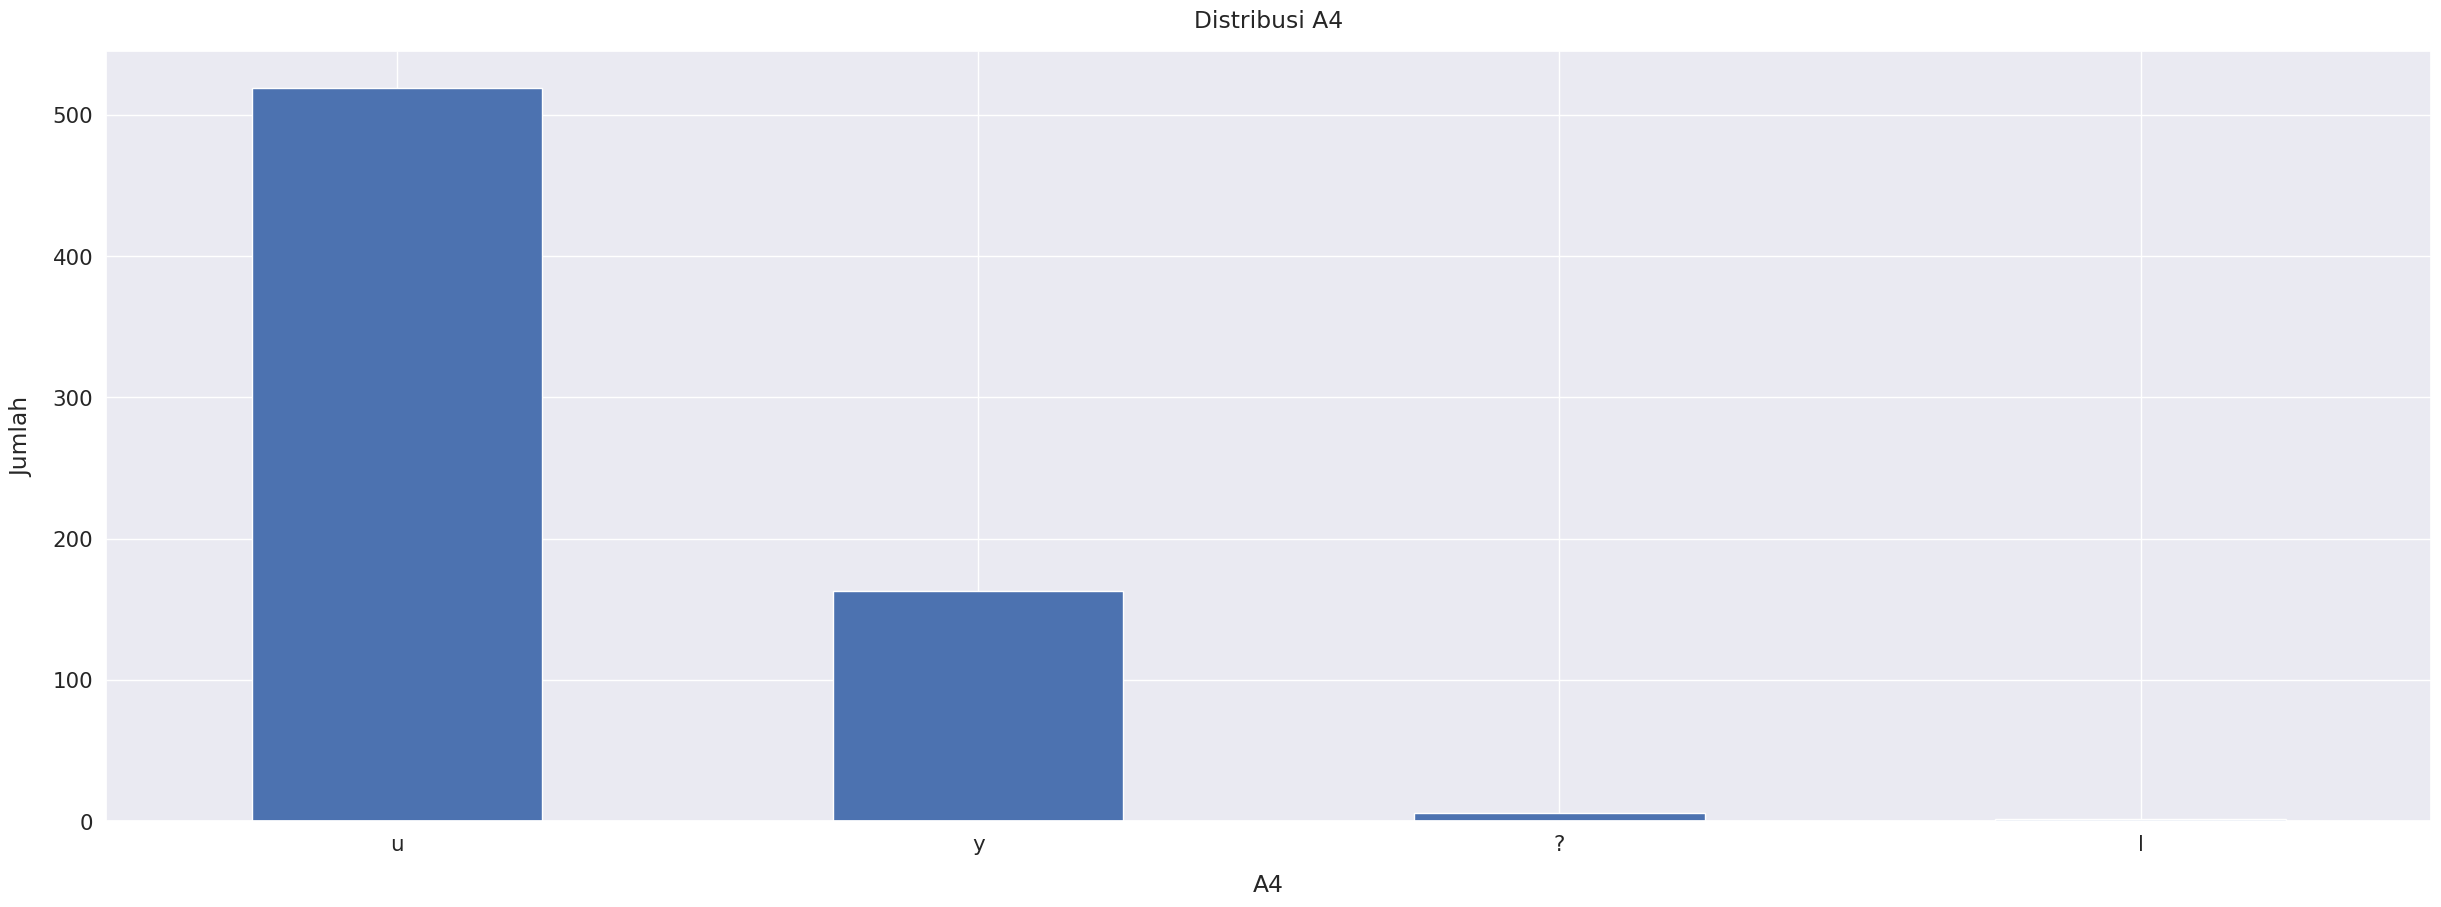

In [ ]:
sns.set(font_scale=1.4)
dataset['A4'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A4", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A4", y=1.02);

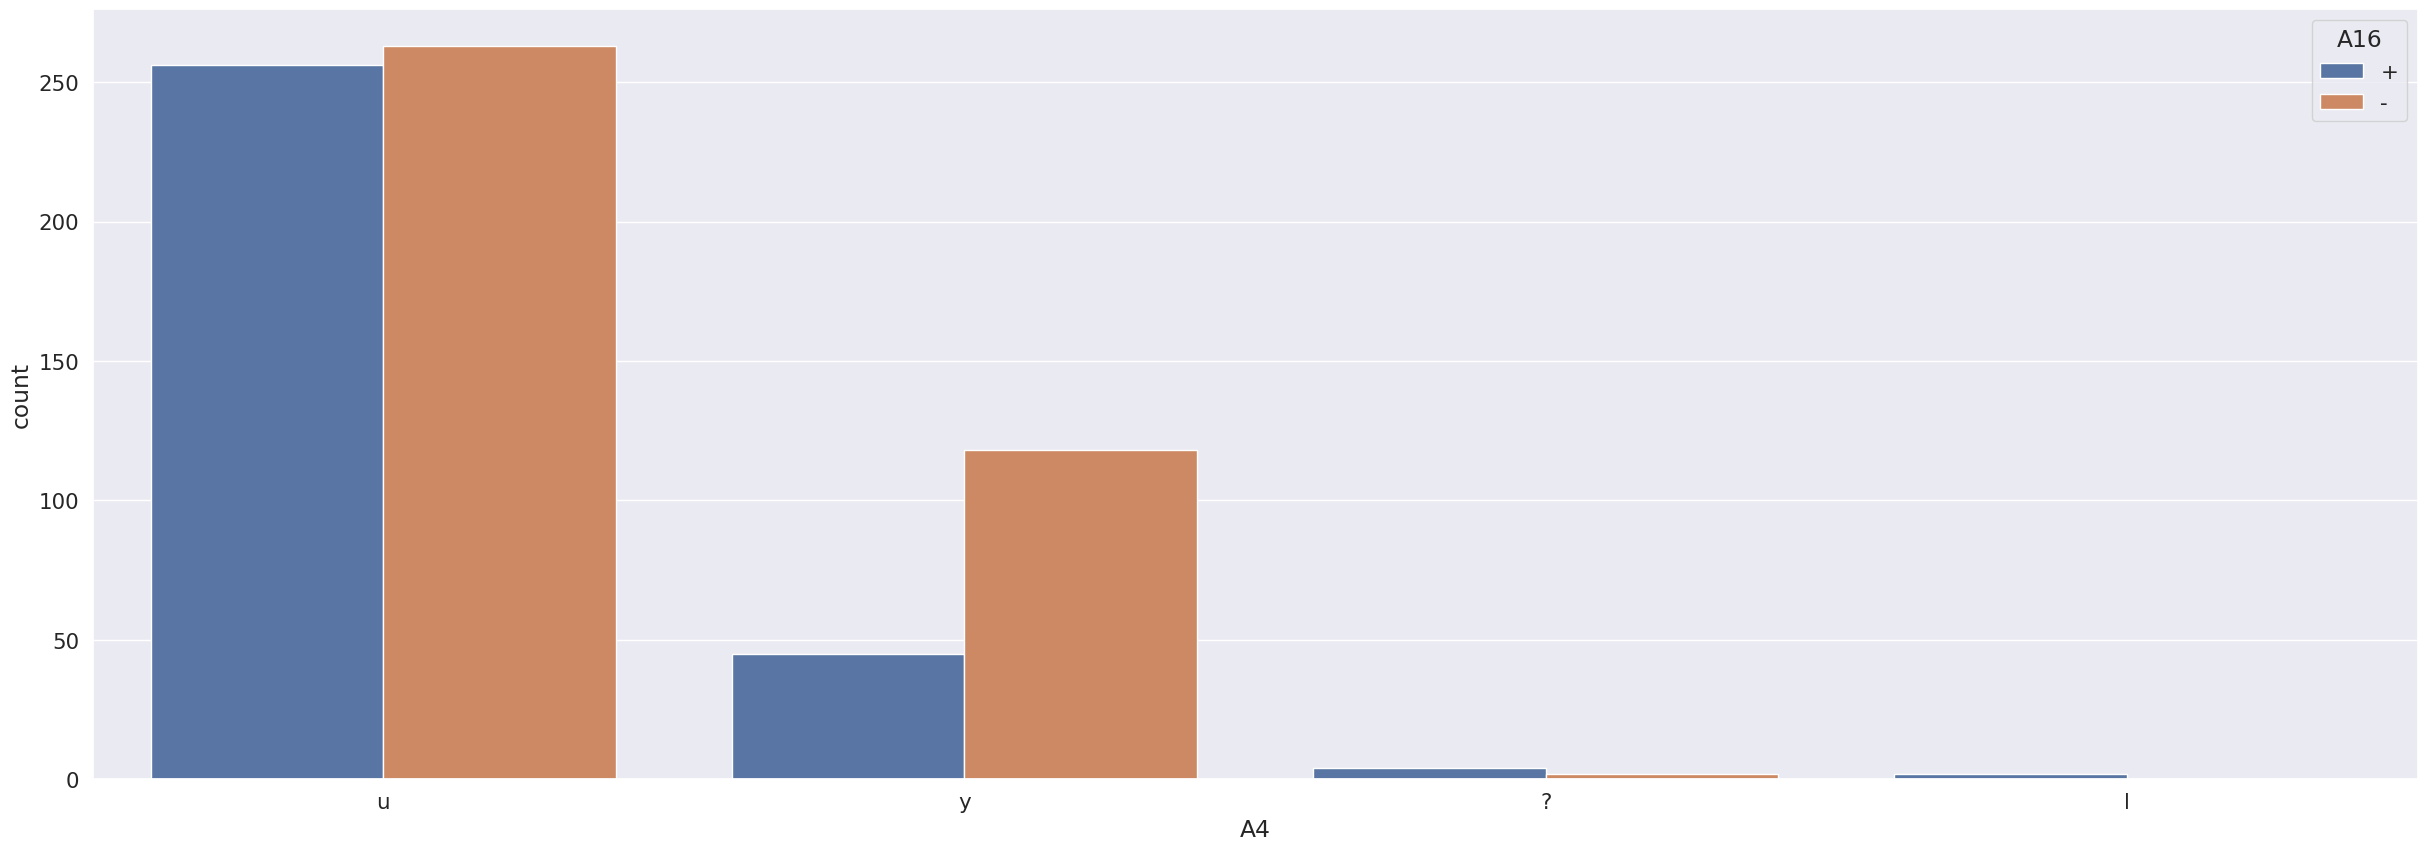

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x=dataset['A4'],order=dataset['A4'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A4

# Cek Distribusi A5

In [ ]:
print(dataset['A5'].value_counts())

g     519
p     163
?       6
gg      2
Name: A5, dtype: int64


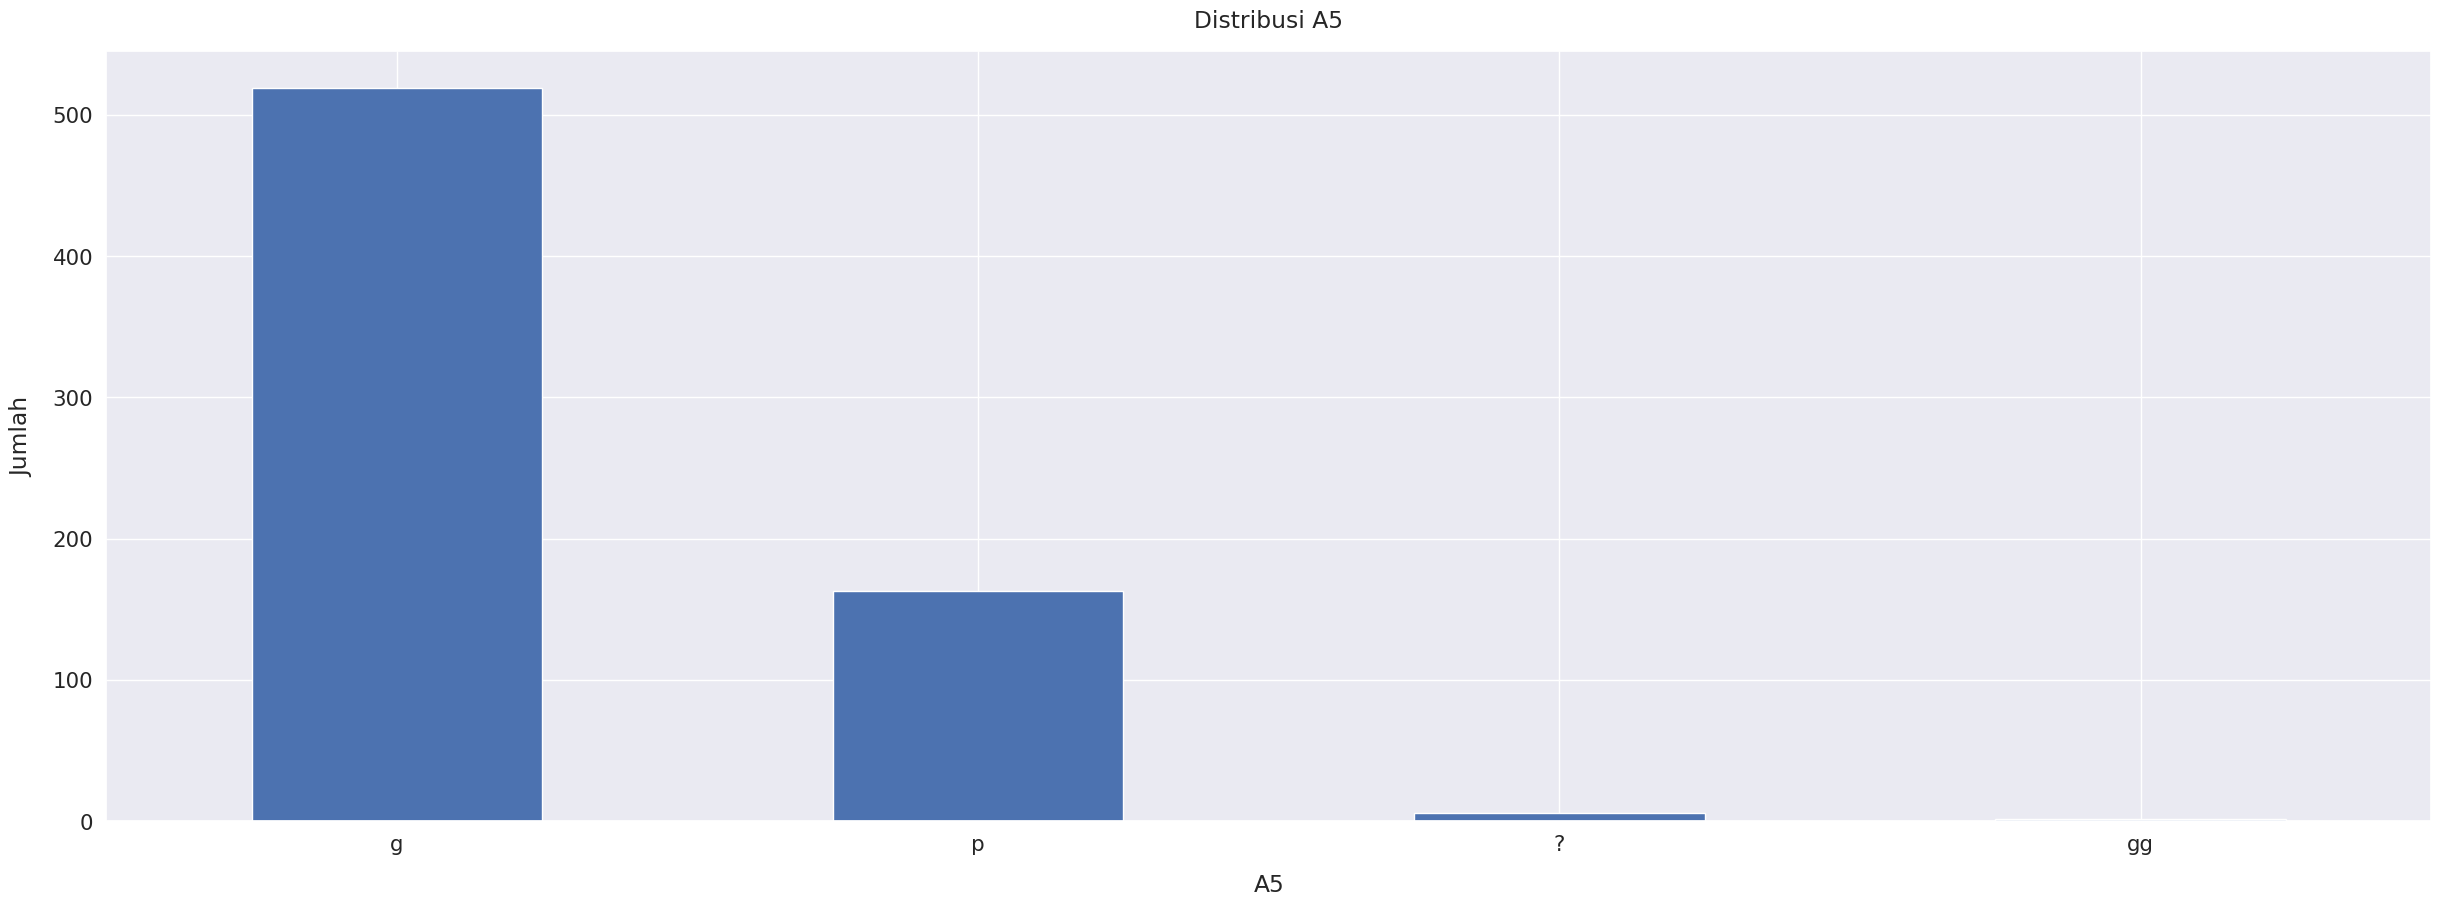

In [ ]:
sns.set(font_scale=1.4)
dataset['A5'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A5", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A5", y=1.02);

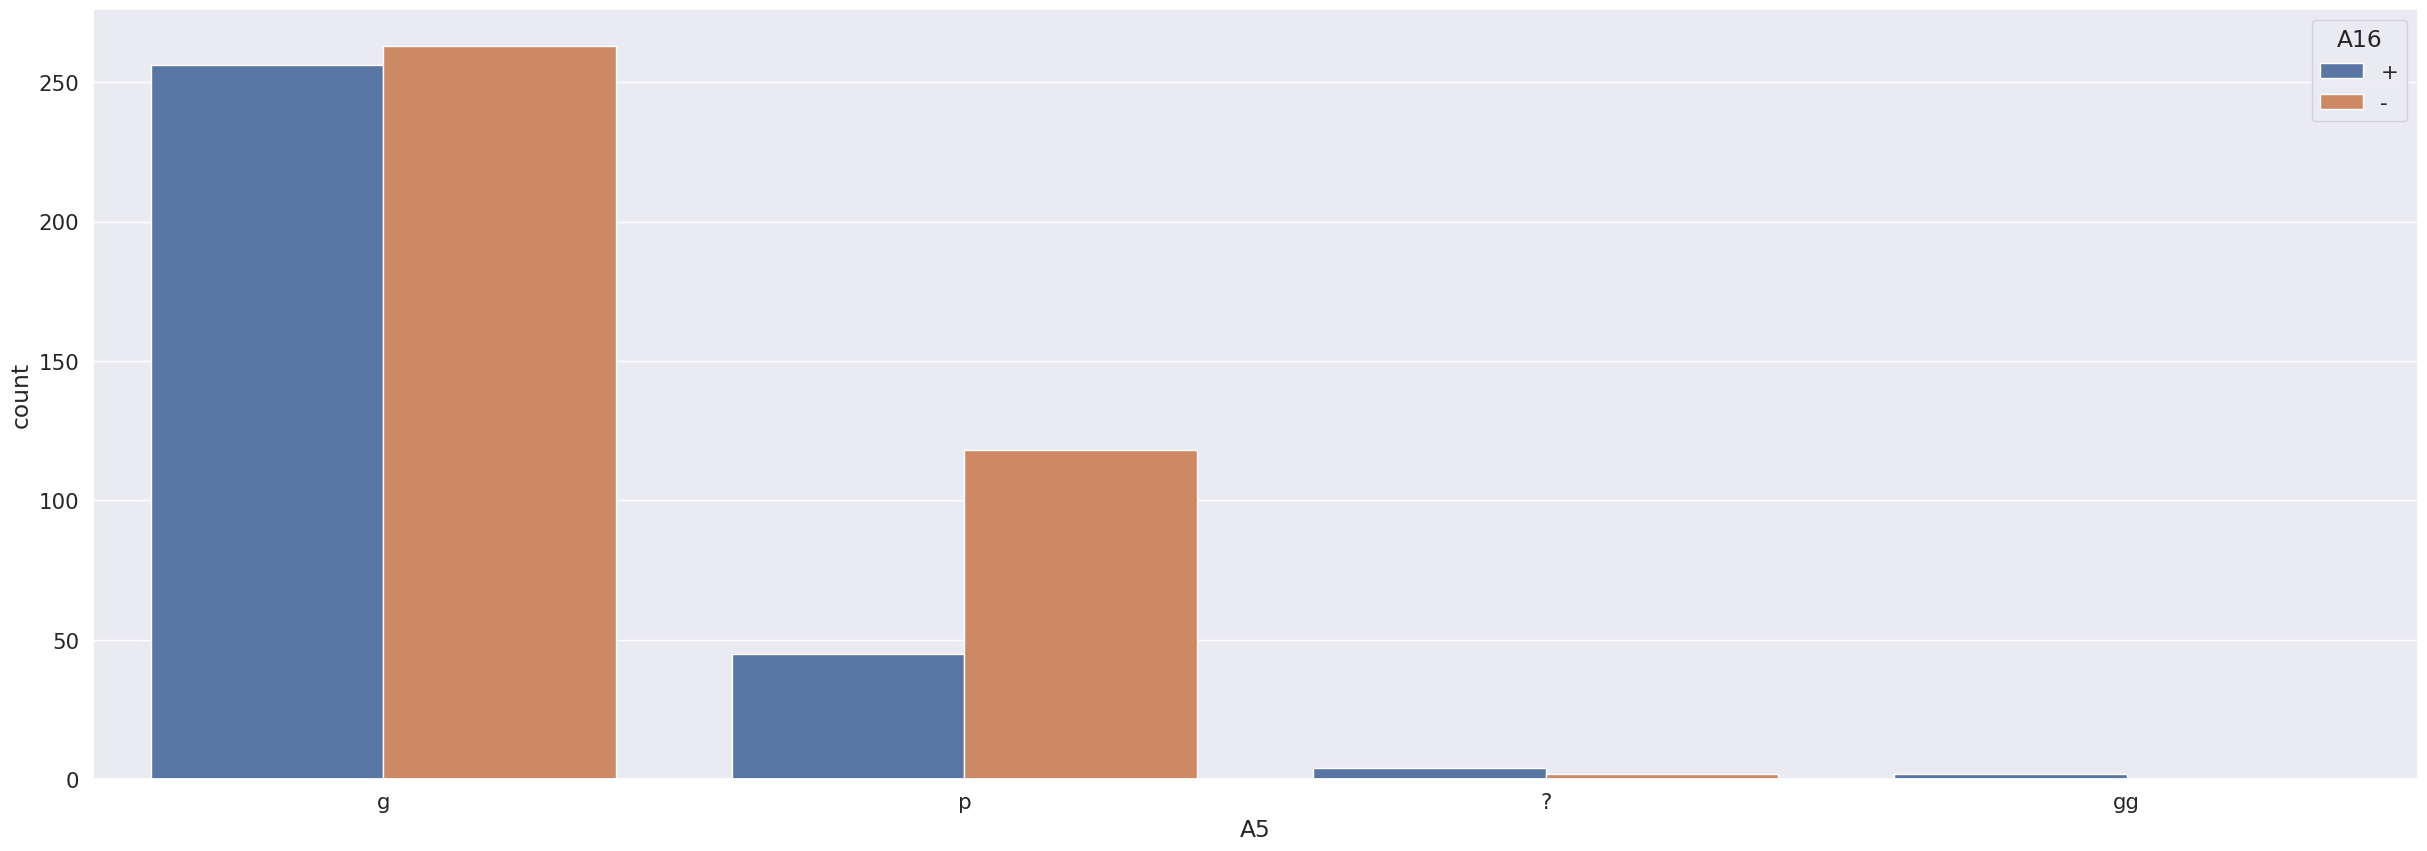

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A5

# Cek Distribusi A6

In [ ]:
print(dataset['A6'].value_counts())

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64


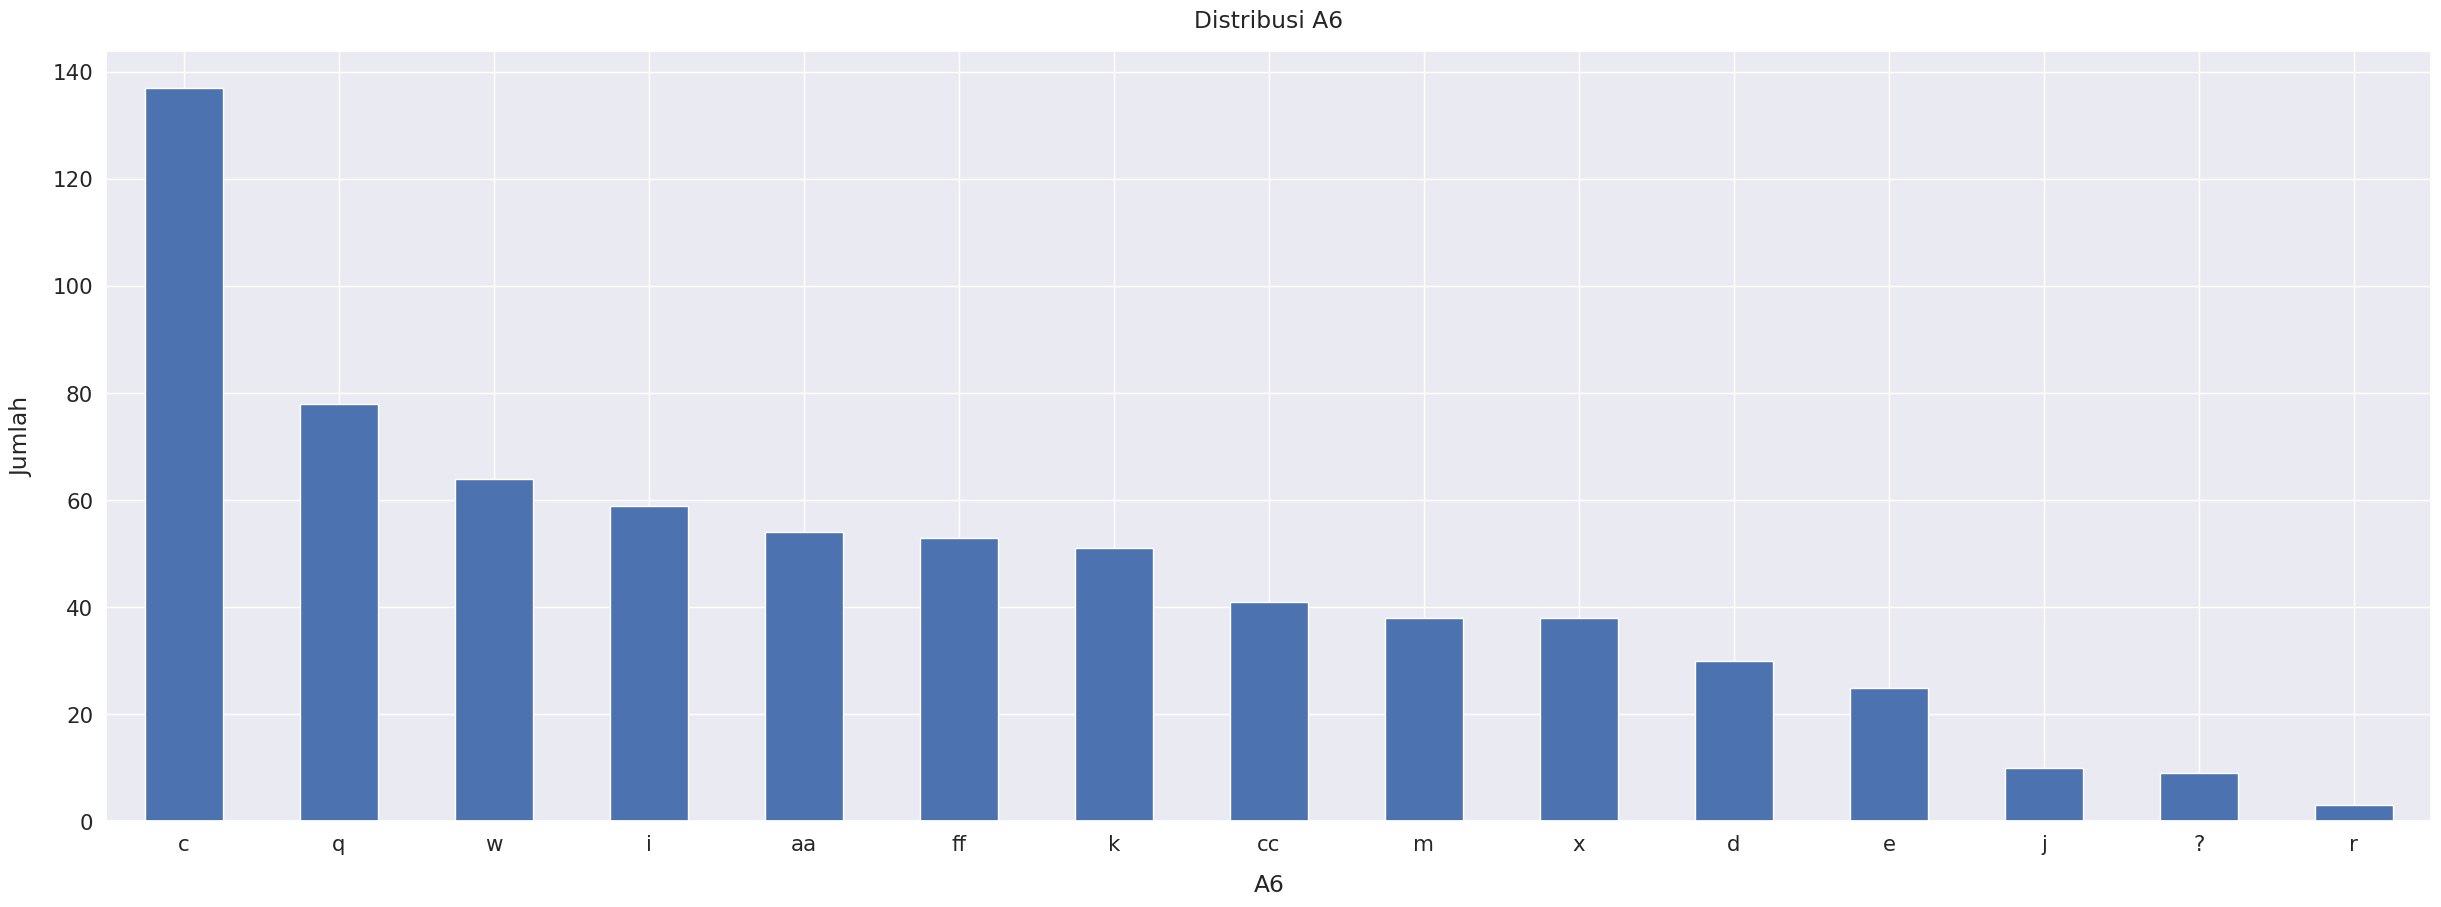

In [ ]:
sns.set(font_scale=1.4)
dataset['A6'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A6", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A6", y=1.02);

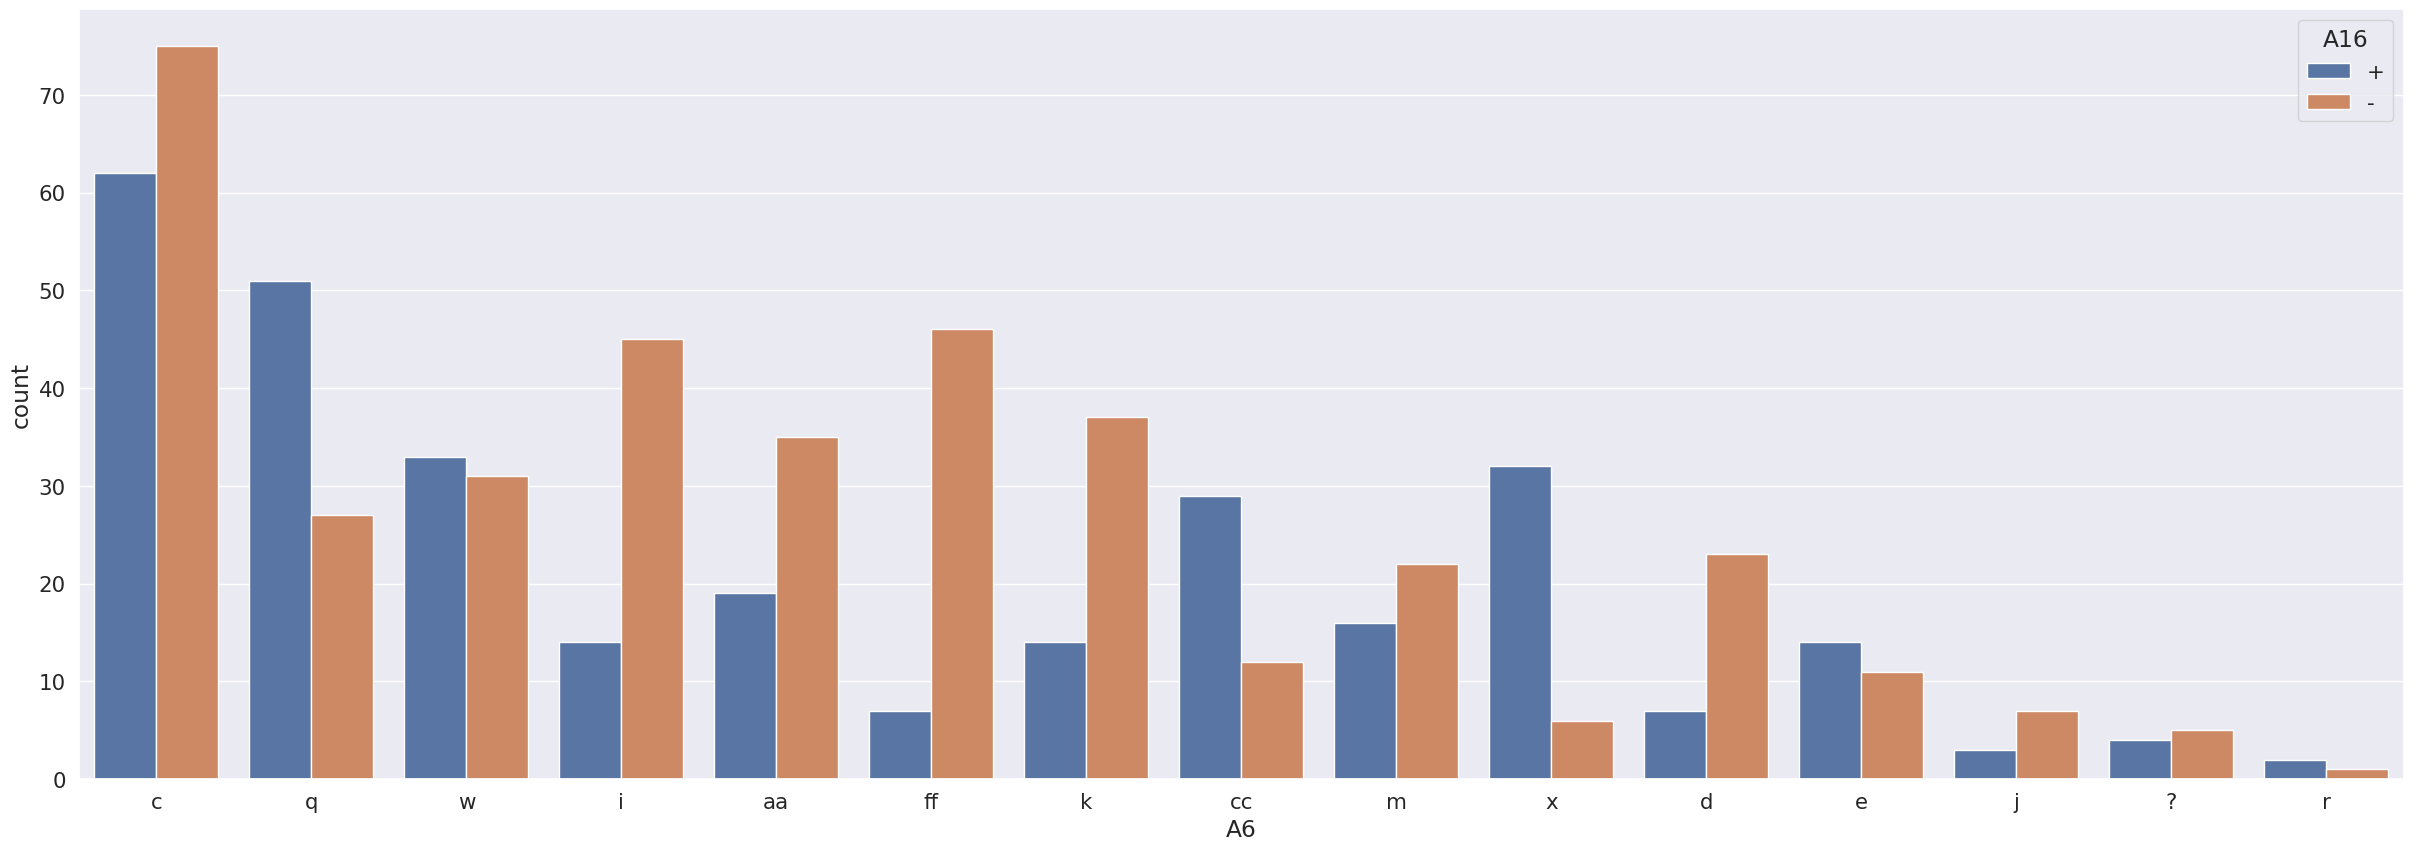

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A6

# Cek Distribusi A7

In [ ]:
print(dataset['A7'].value_counts())

v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64


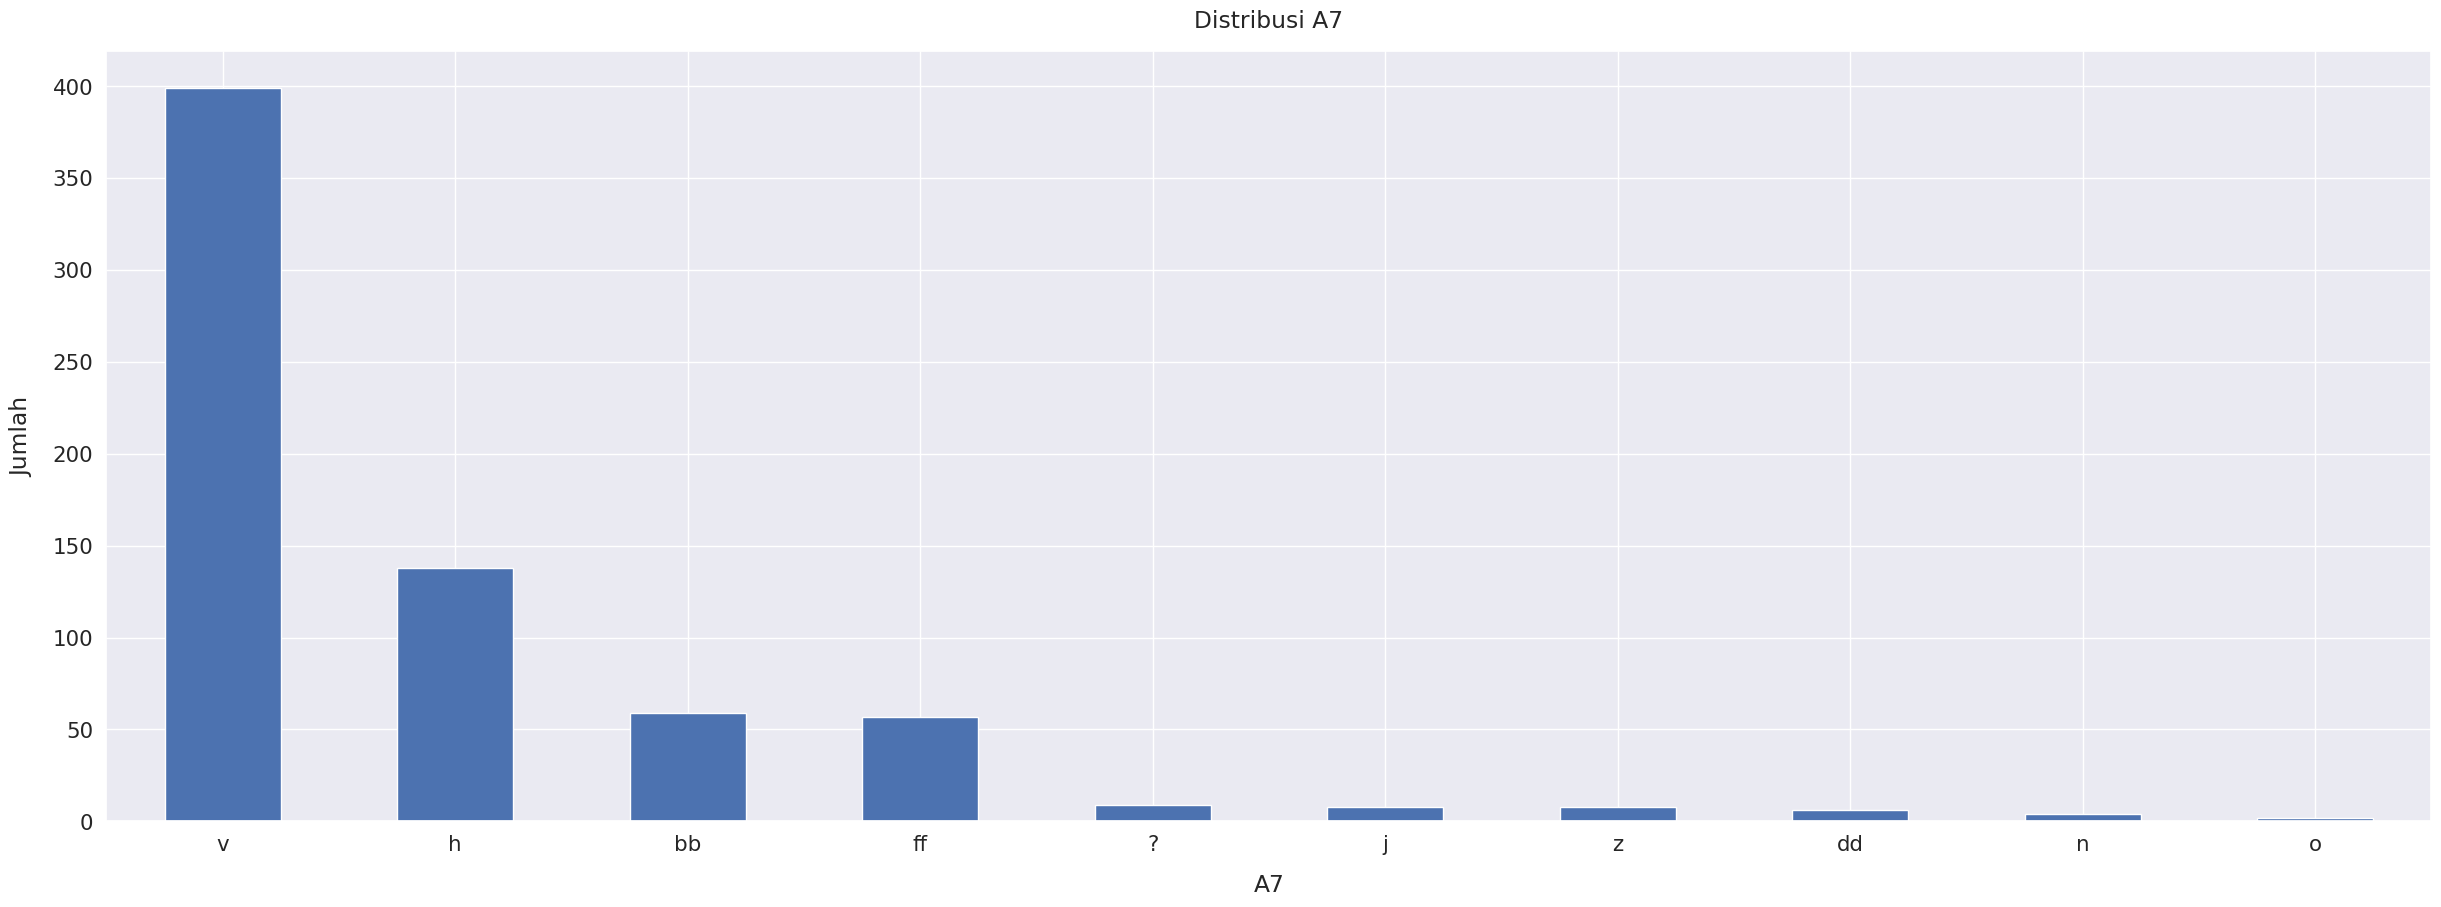

In [ ]:
sns.set(font_scale=1.4)
dataset['A7'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A7", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A7", y=1.02);

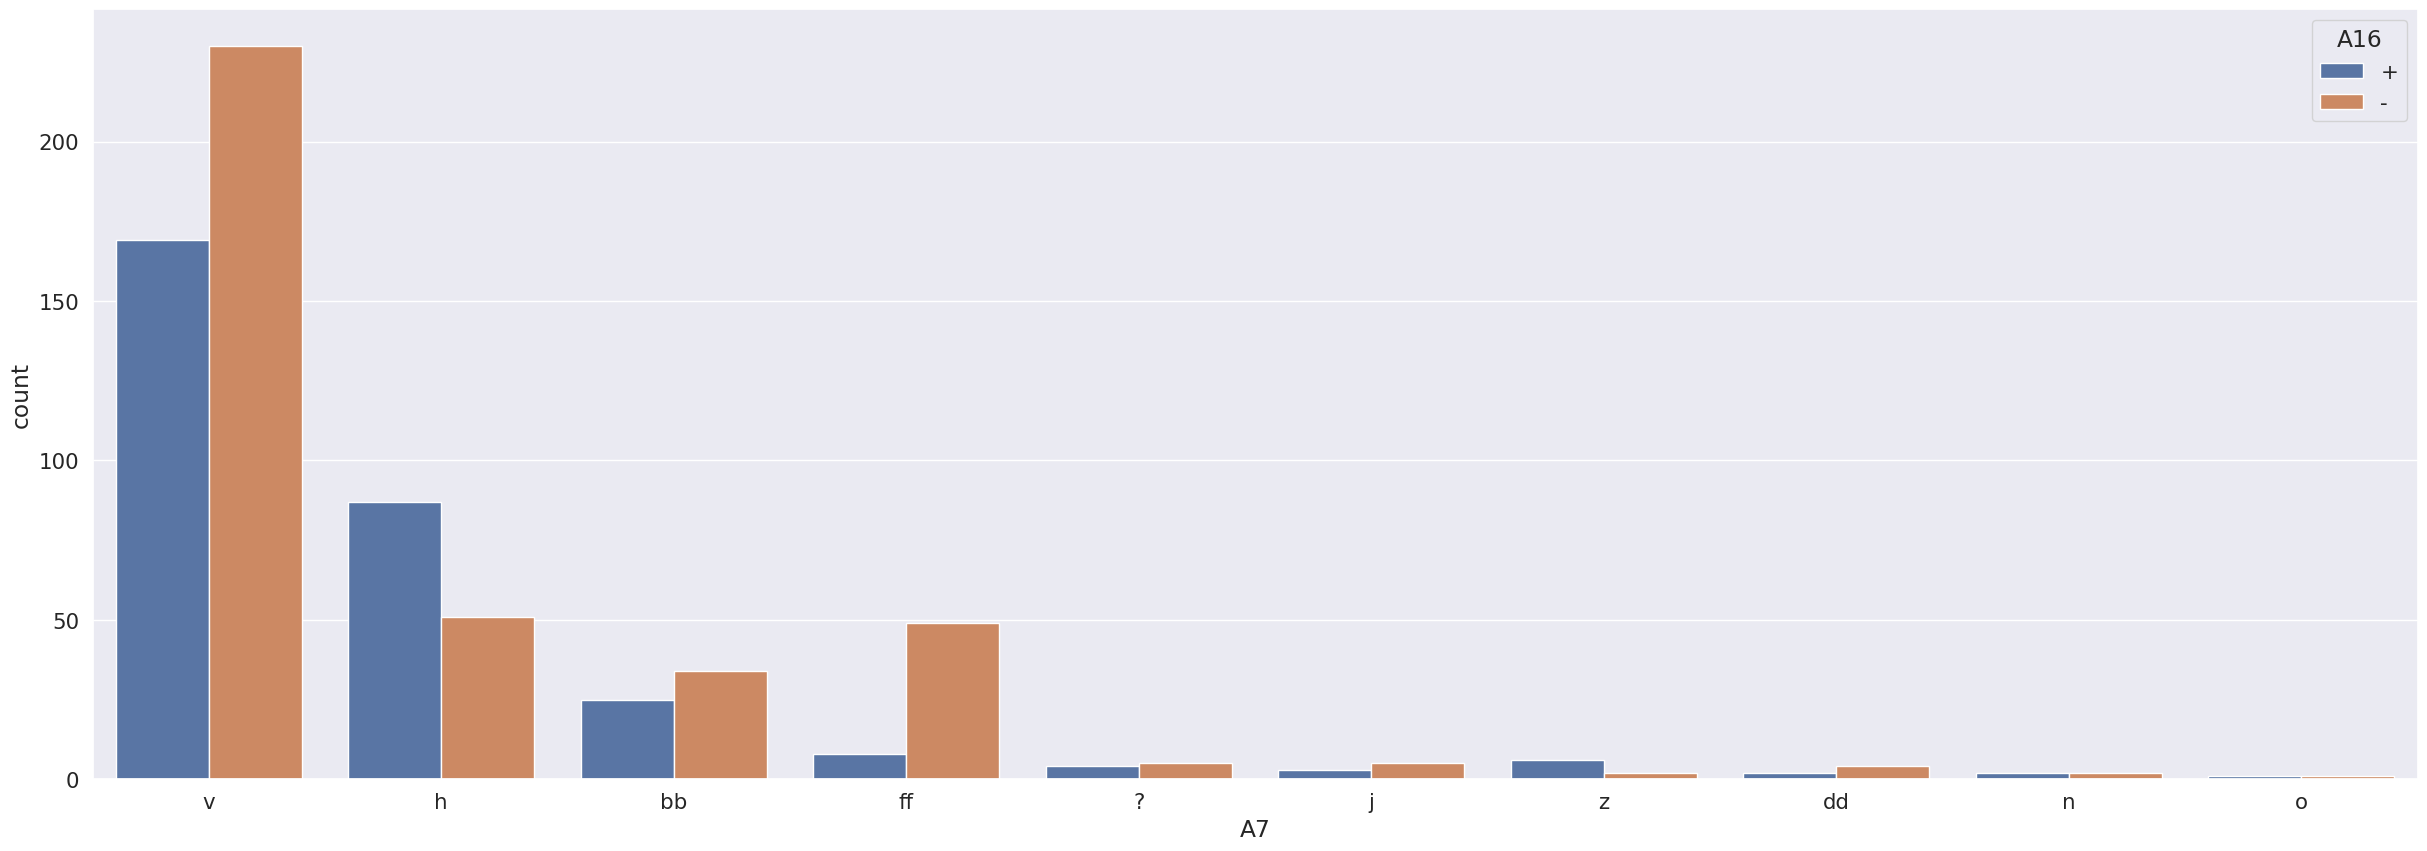

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A7

# Cek Distribusi A8

In [ ]:
print(dataset['A8'].value_counts())

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     1
Name: A8, Length: 132, dtype: int64


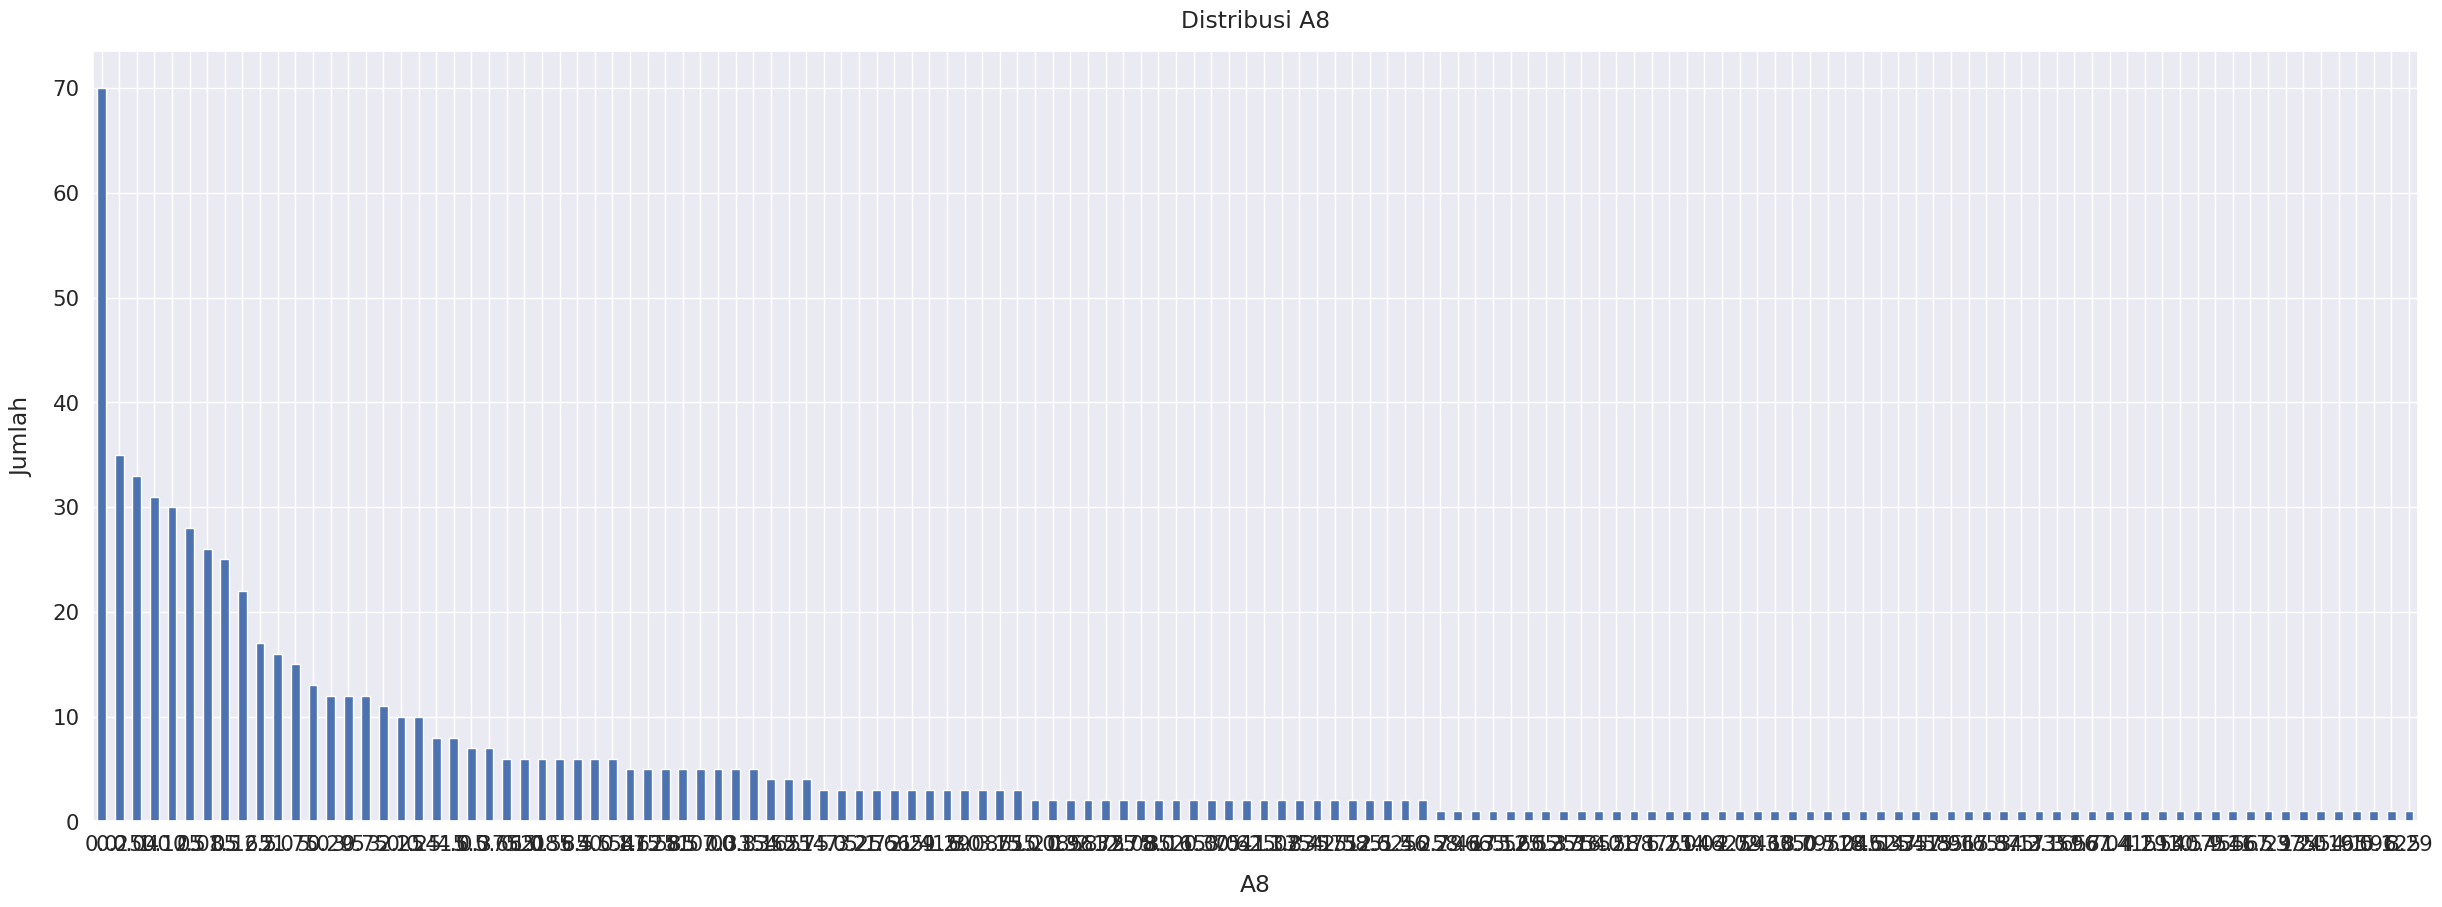

In [ ]:
sns.set(font_scale=1.4)
dataset['A8'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A8", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A8", y=1.02);

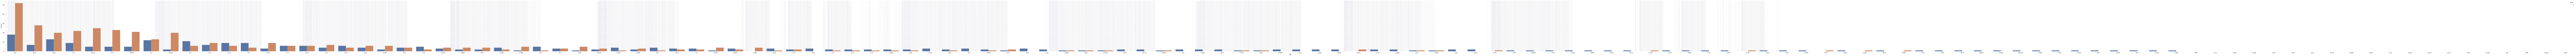

In [ ]:
plt.subplots(figsize = (500,10))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A8

# Cek Distribusi A9

In [ ]:
print(dataset['A9'].value_counts())

t    361
f    329
Name: A9, dtype: int64


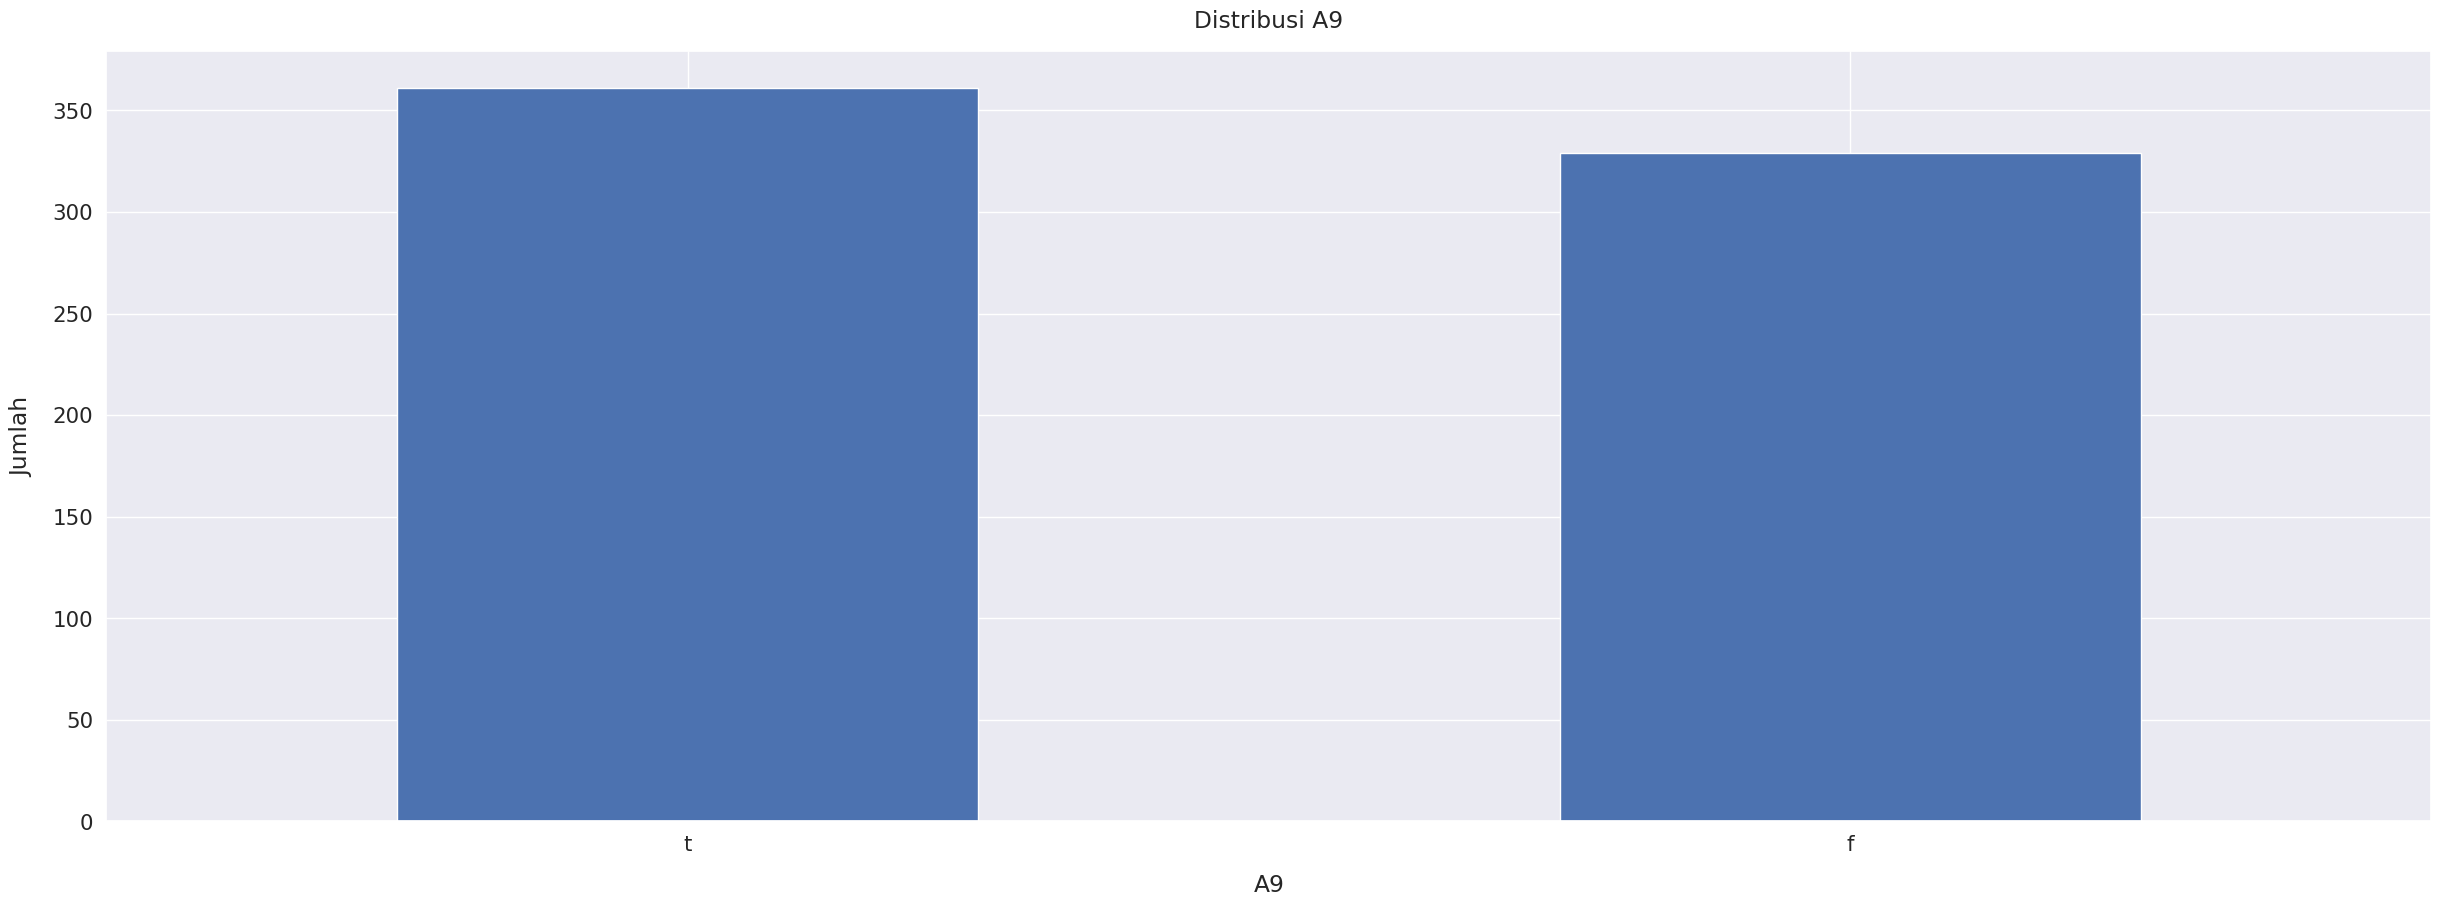

In [ ]:
sns.set(font_scale=1.4)
dataset['A9'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A9", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A9", y=1.02);

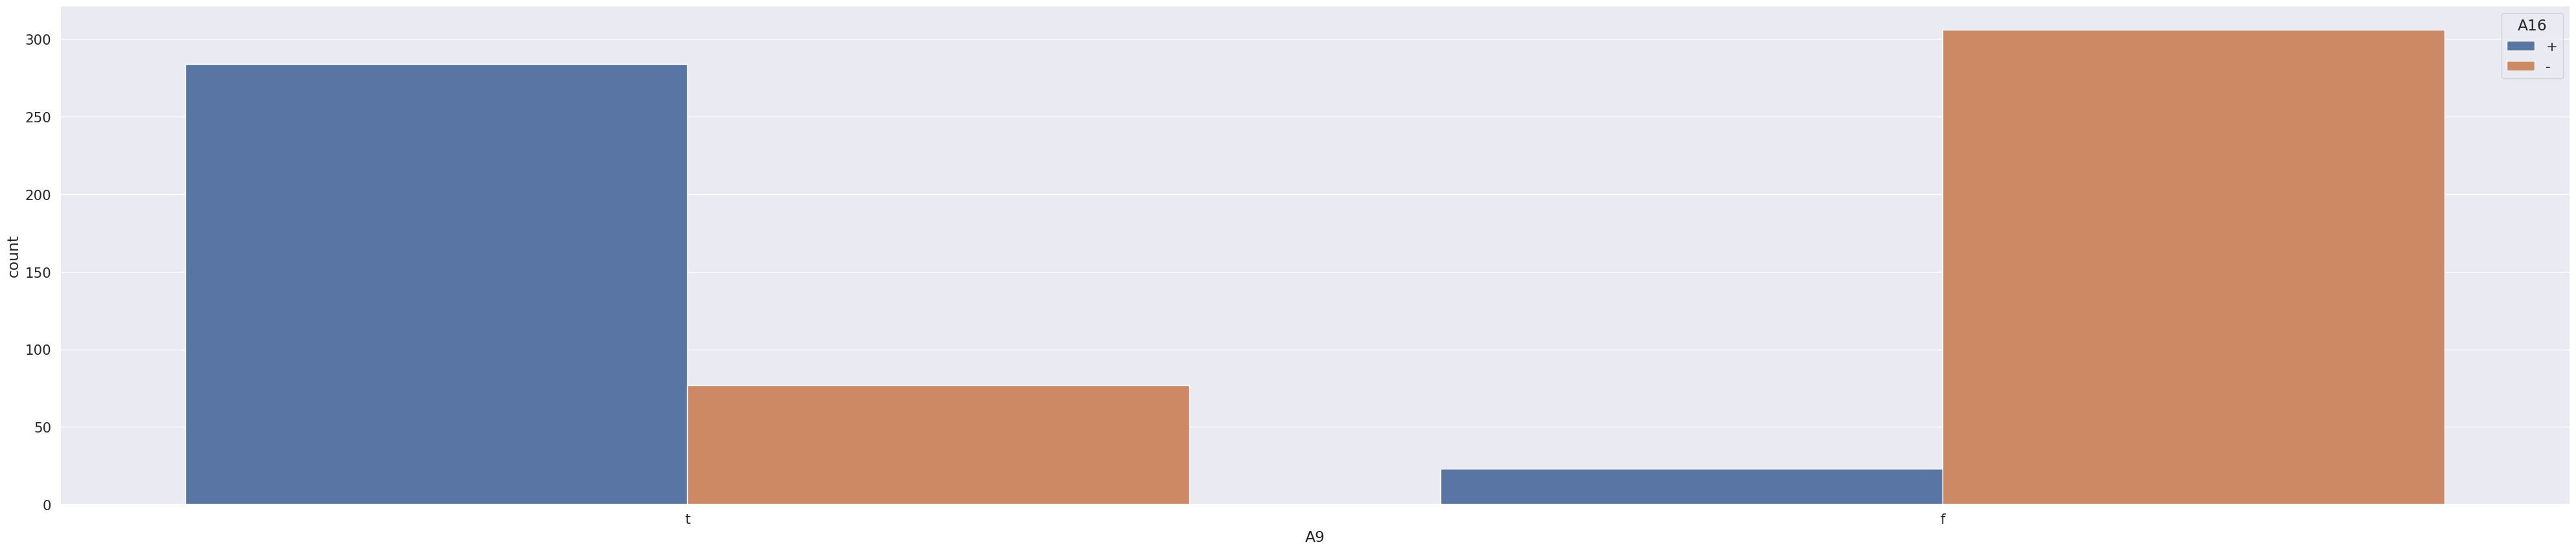

In [ ]:
plt.subplots(figsize = (50,10))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A9

# Cek Distribusi A10

In [ ]:
print(dataset['A10'].value_counts())

f    395
t    295
Name: A10, dtype: int64


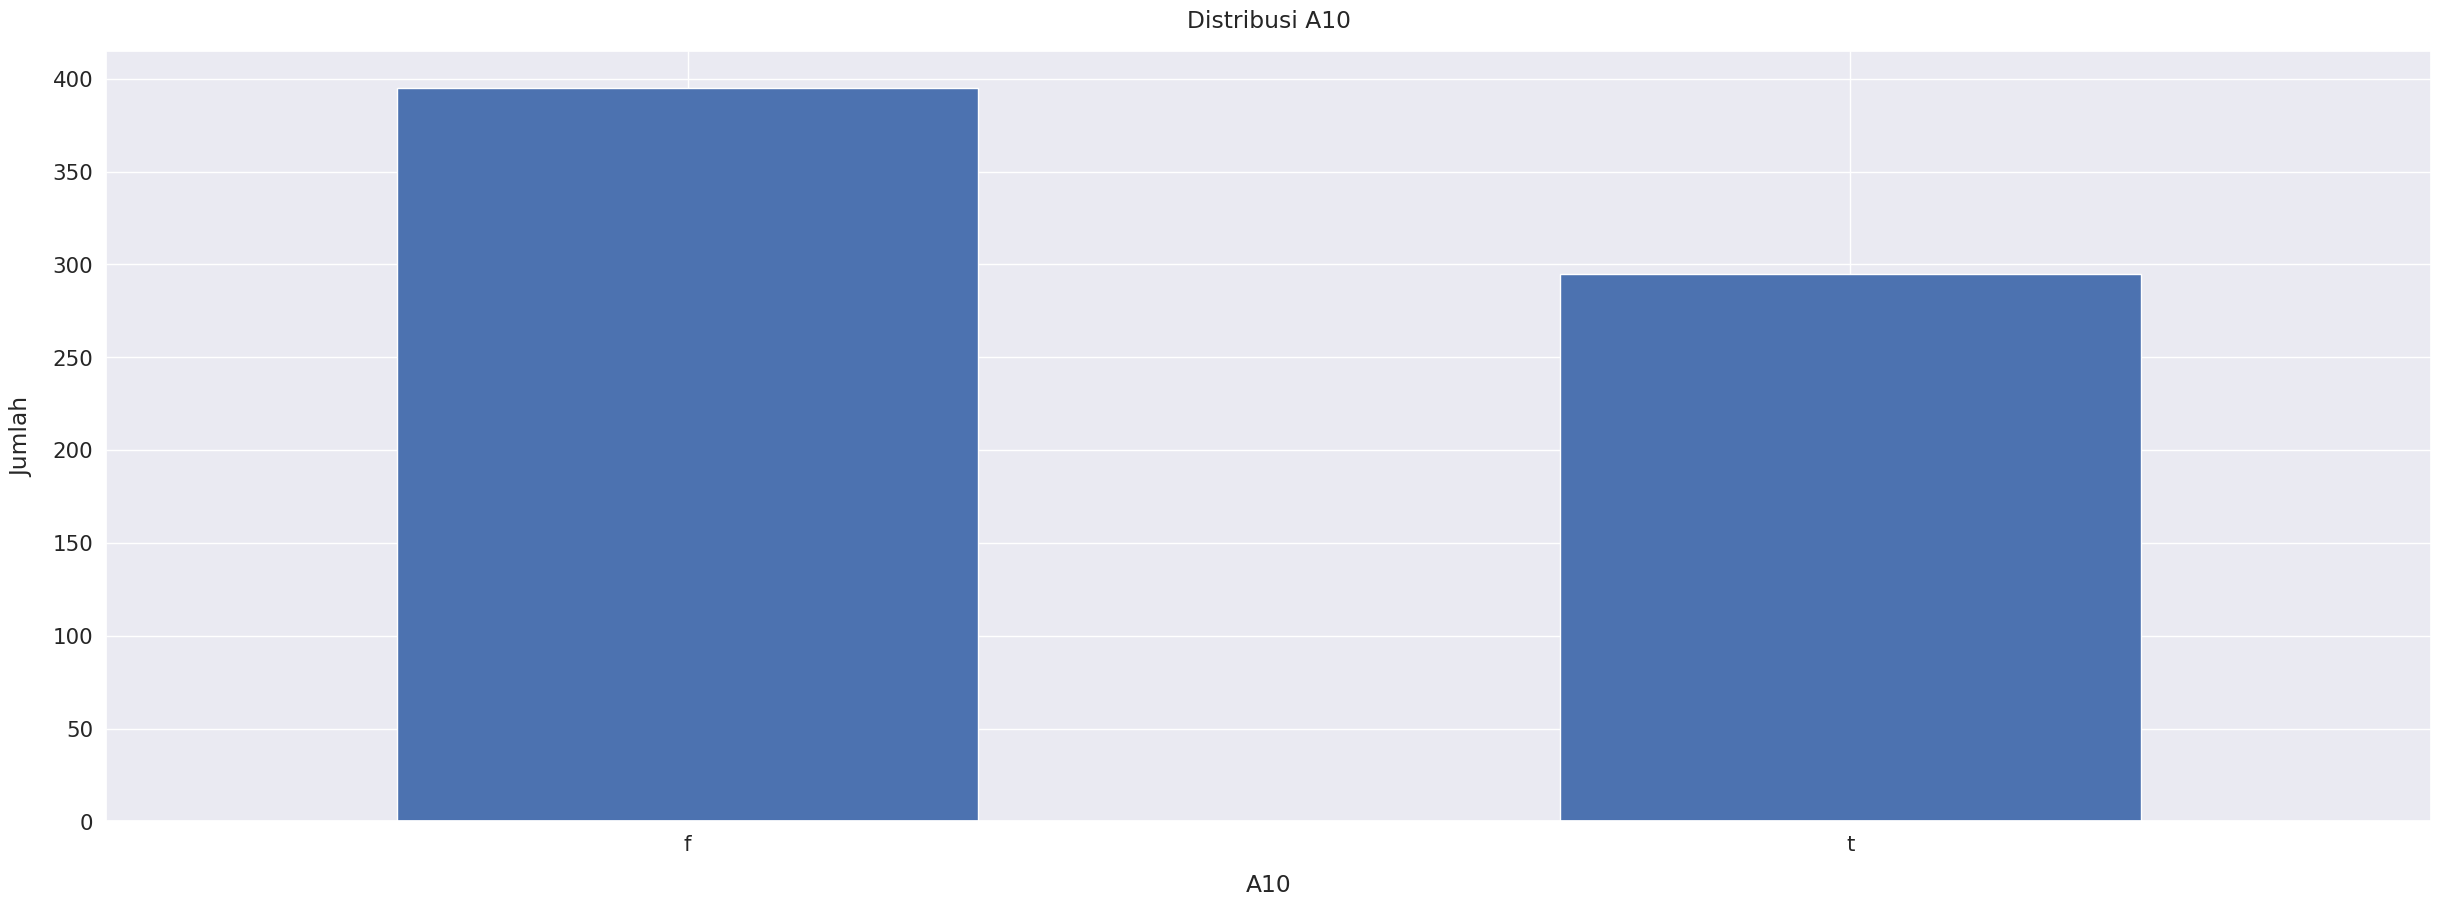

In [ ]:
sns.set(font_scale=1.4)
dataset['A10'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A10", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A10", y=1.02);

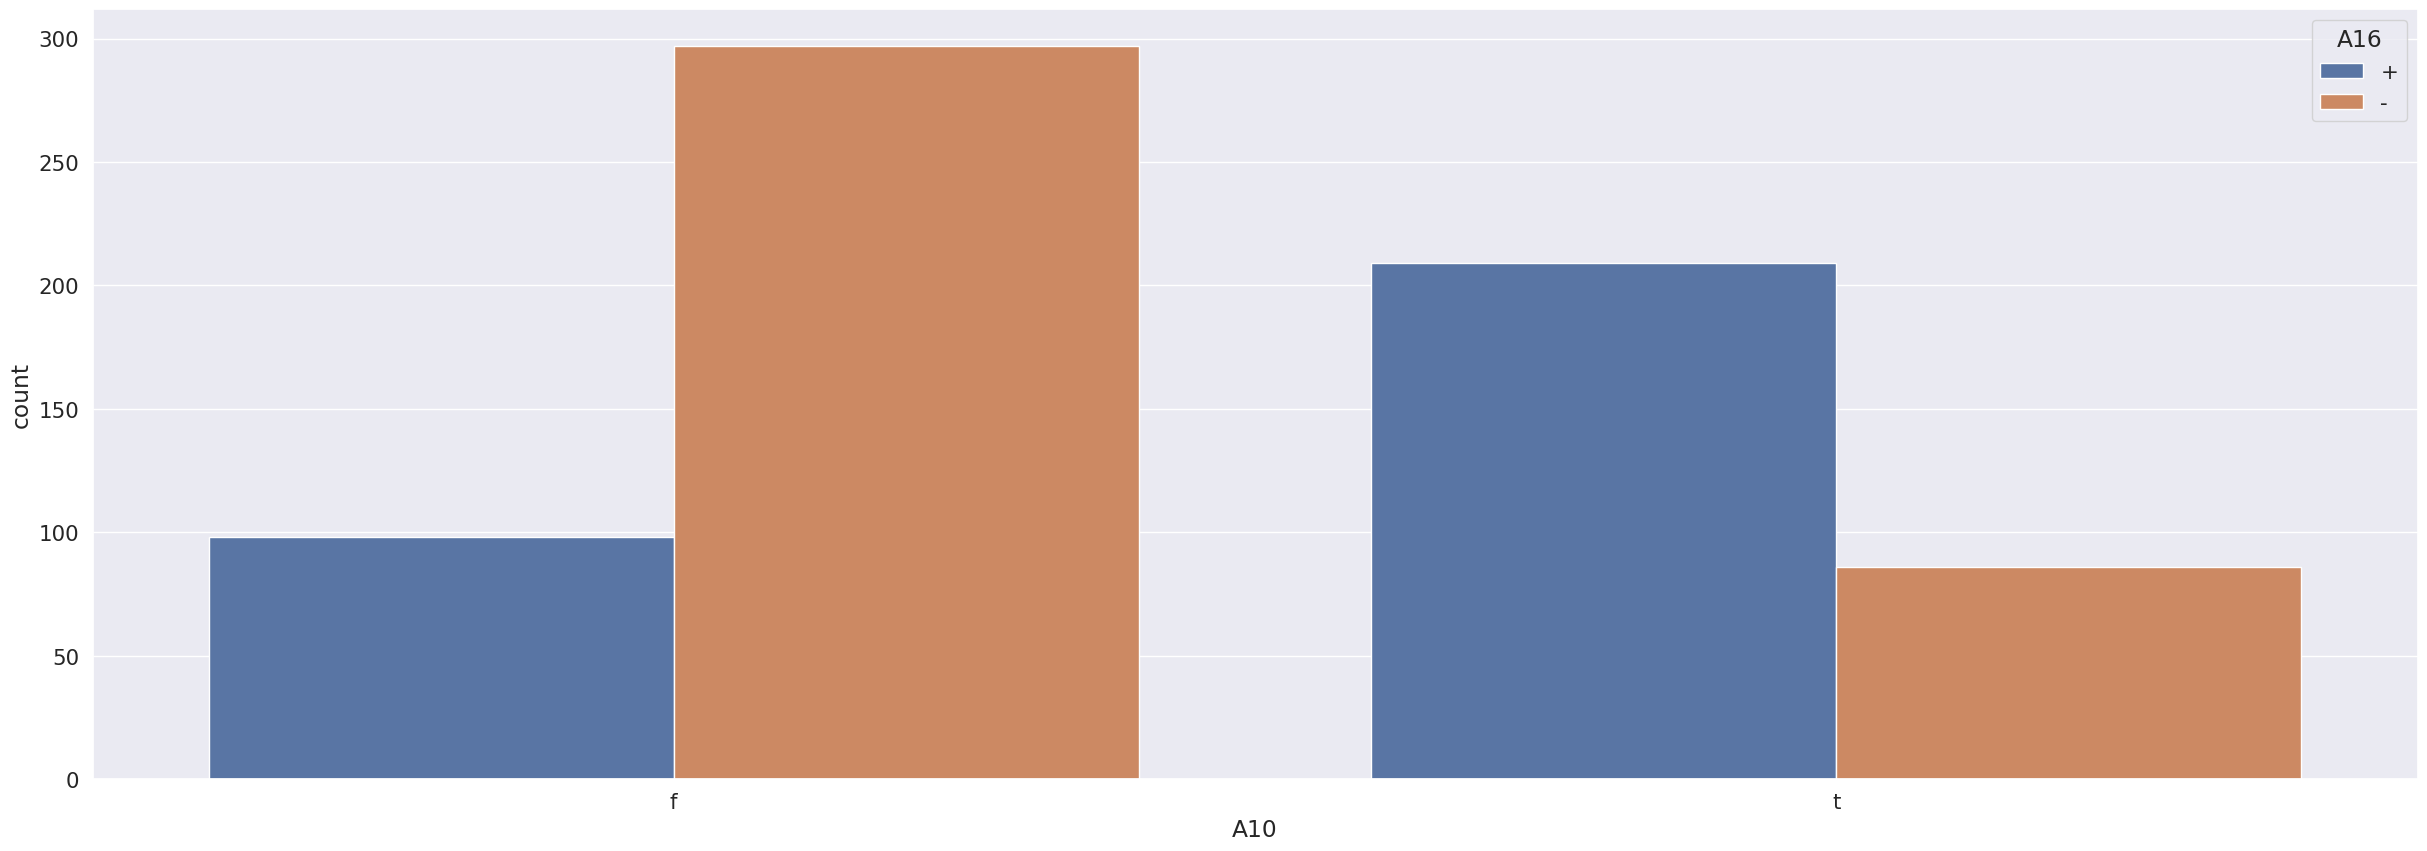

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A10

# Cek Distribusi A11

In [ ]:
print(dataset['A11'].value_counts())

0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
9      10
8      10
10      8
14      8
12      8
15      4
16      3
20      2
17      2
23      1
40      1
67      1
13      1
19      1
Name: A11, dtype: int64


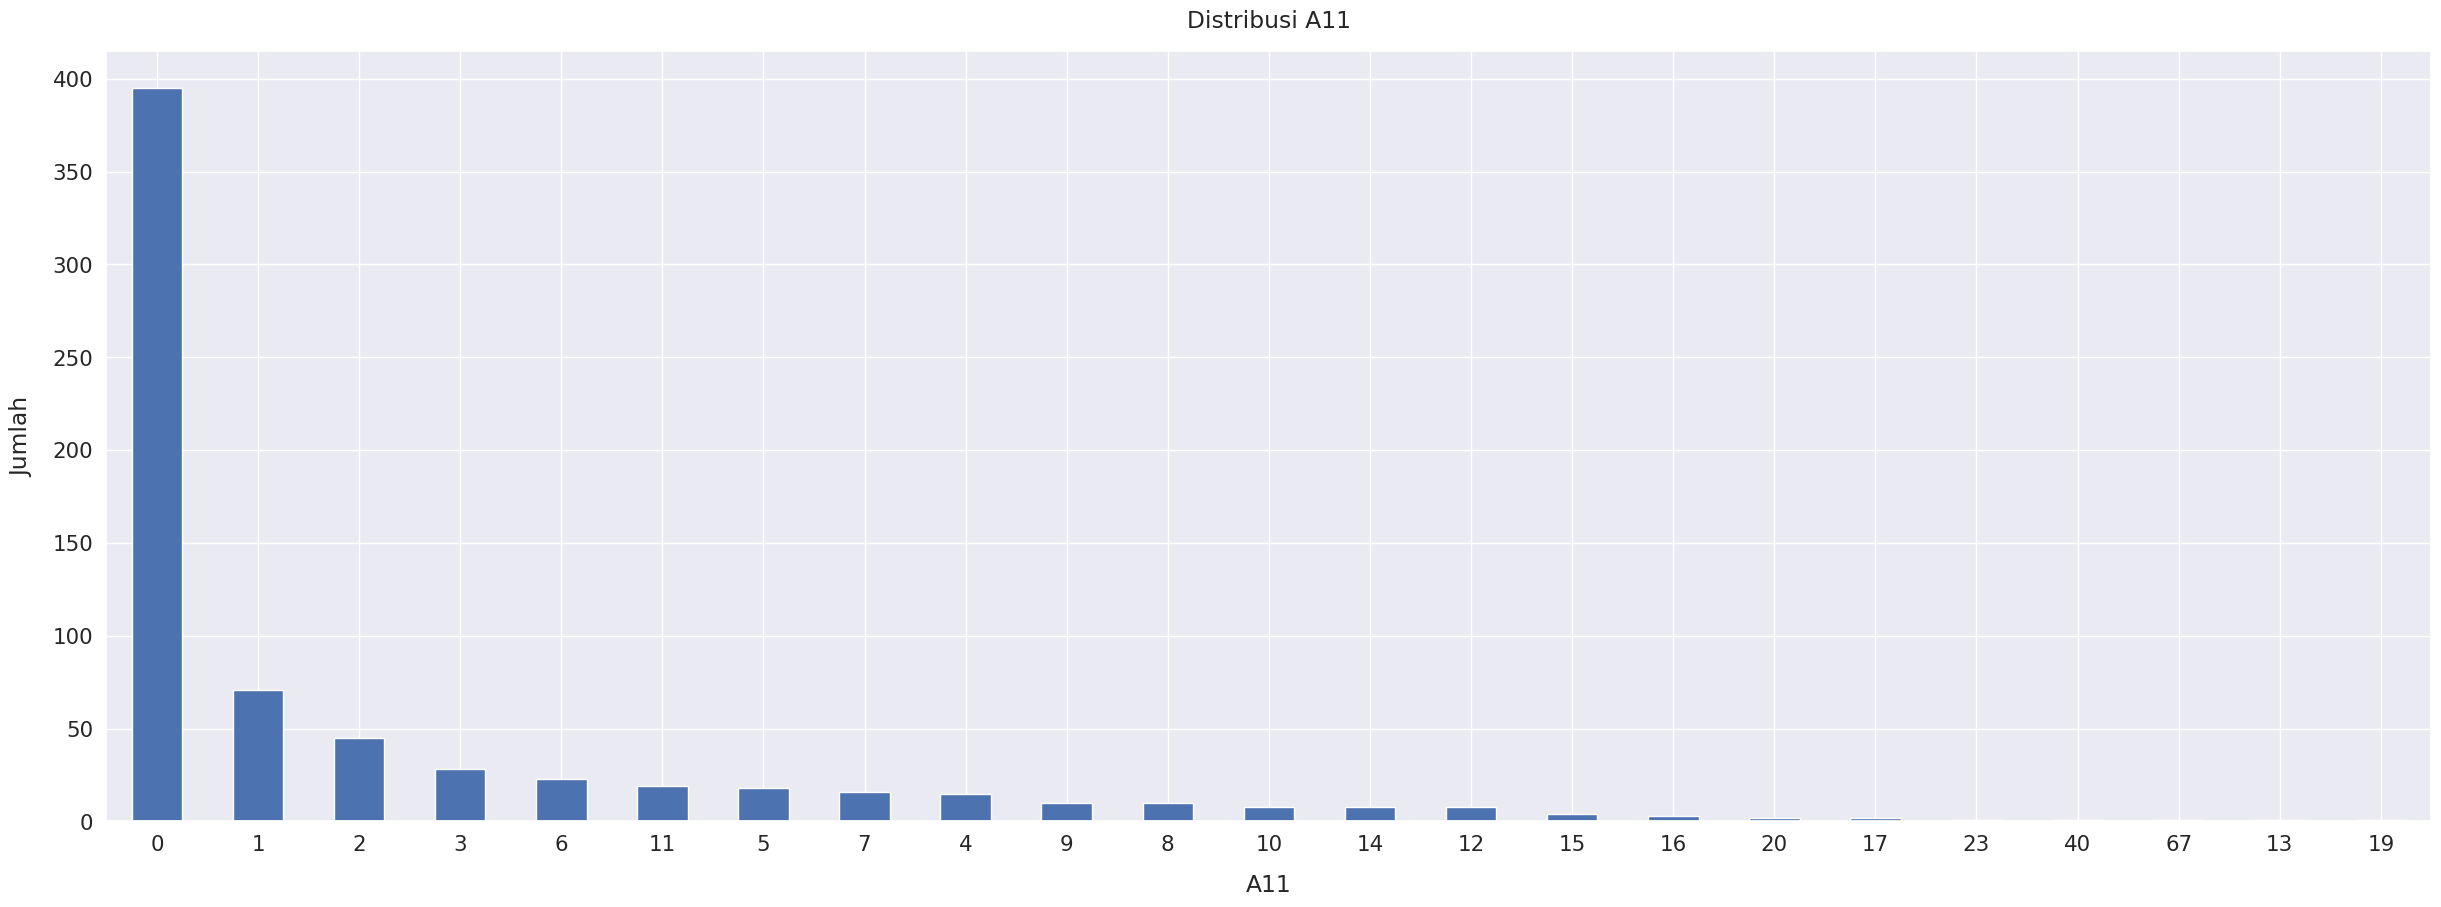

In [ ]:
sns.set(font_scale=1.4)
dataset['A11'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A11", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A11", y=1.02);

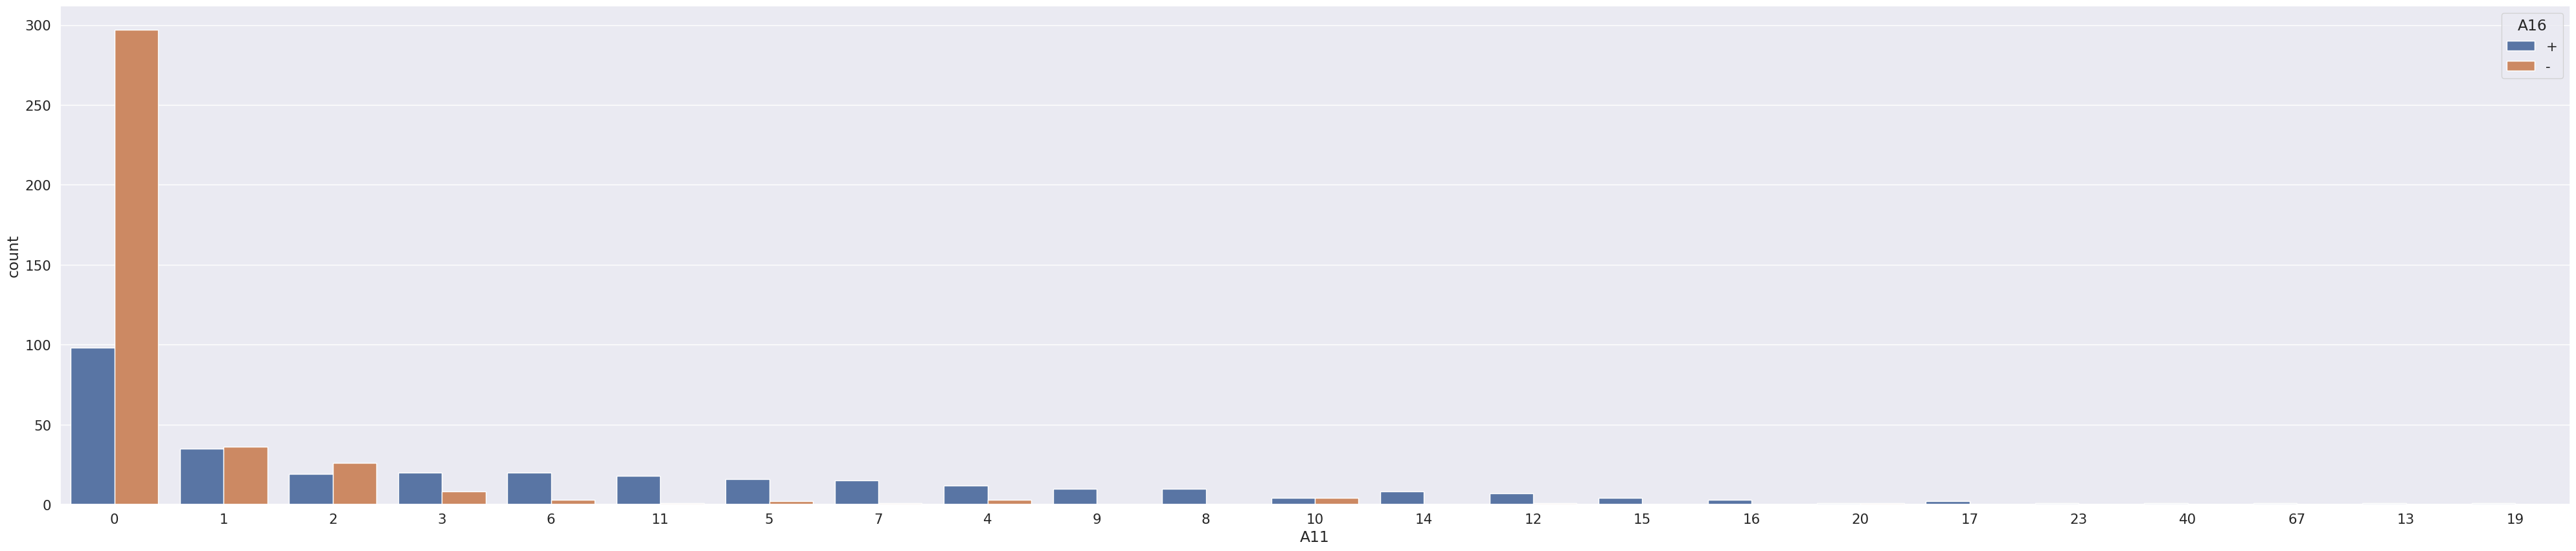

In [ ]:
plt.subplots(figsize = (50,10))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A11

# Cek Distribusi A12

In [ ]:
print(dataset['A12'].value_counts())

f    374
t    316
Name: A12, dtype: int64


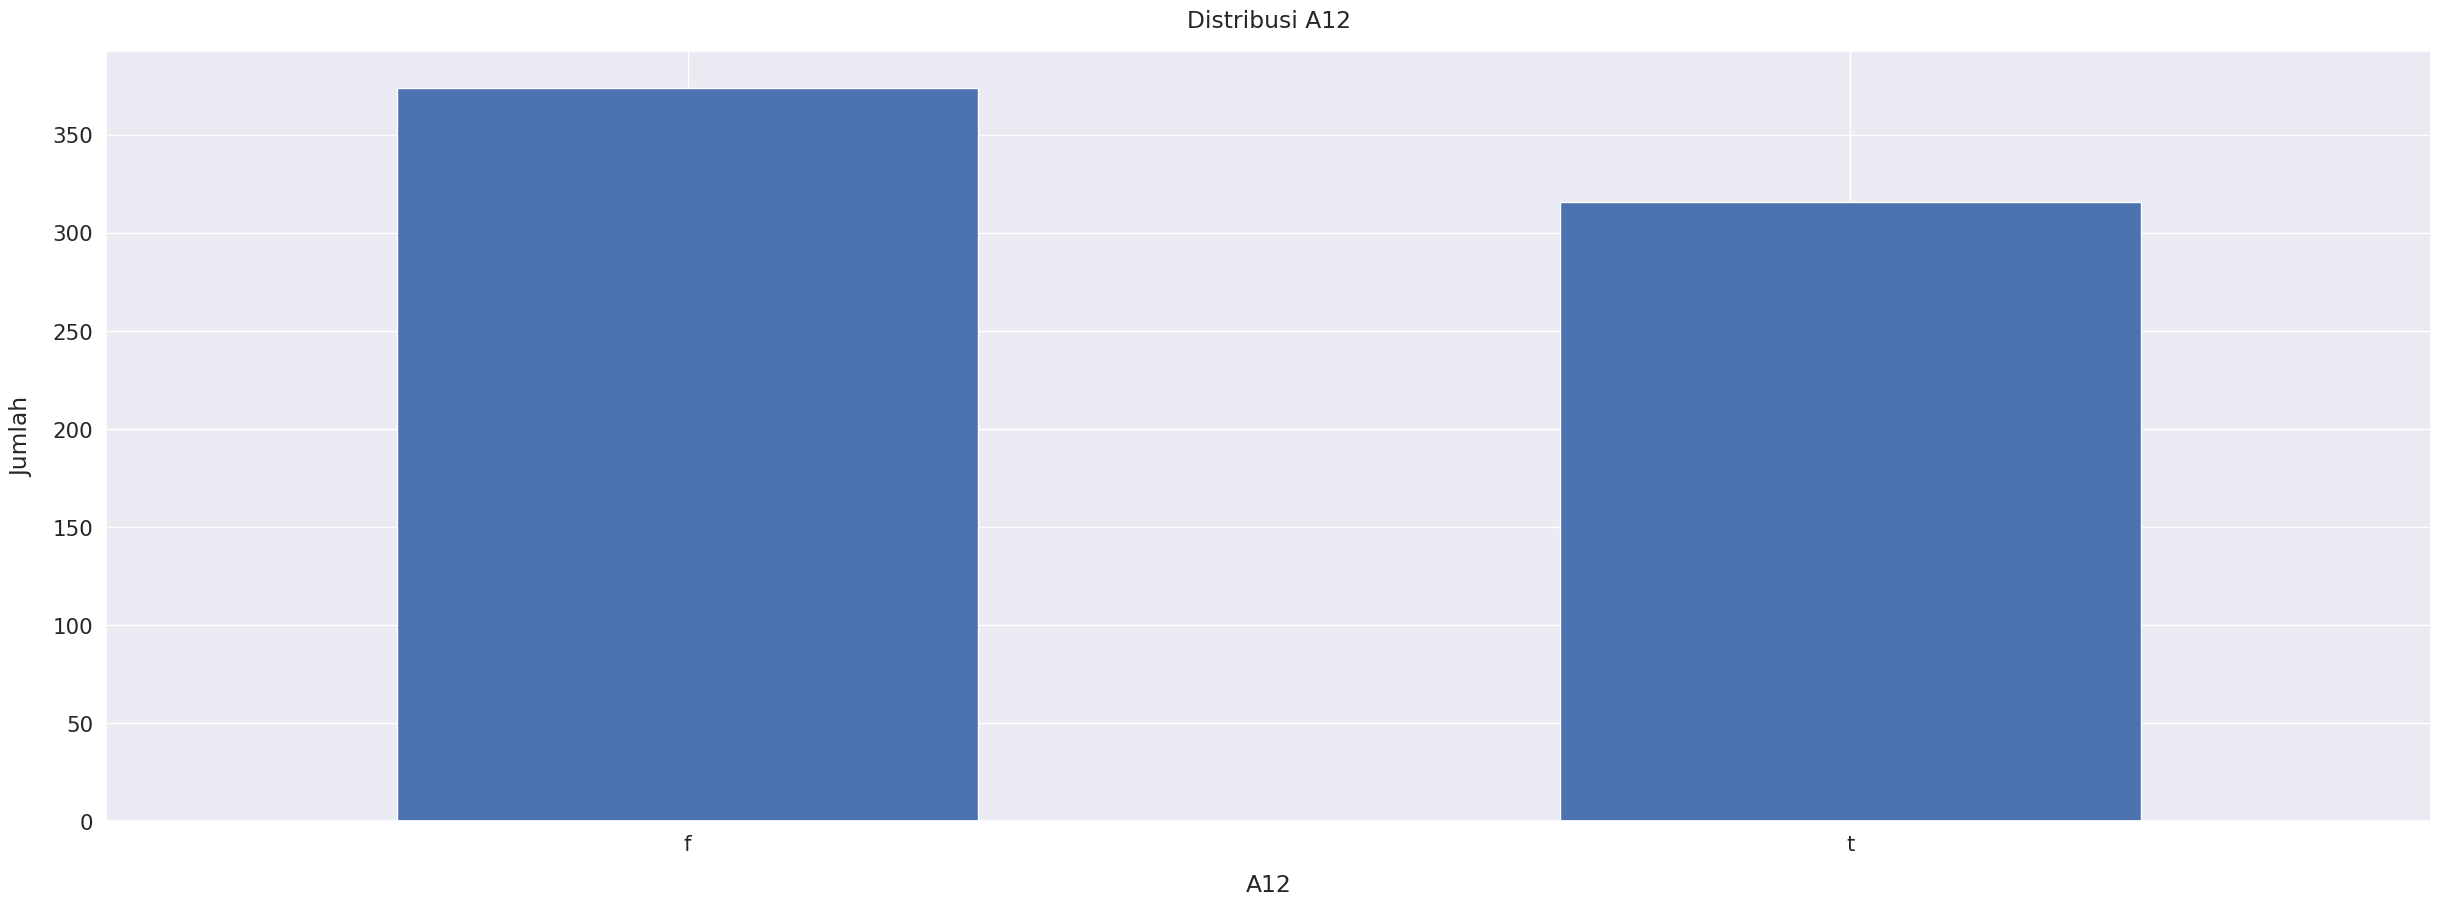

In [ ]:
sns.set(font_scale=1.4)
dataset['A12'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A12", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A12", y=1.02);

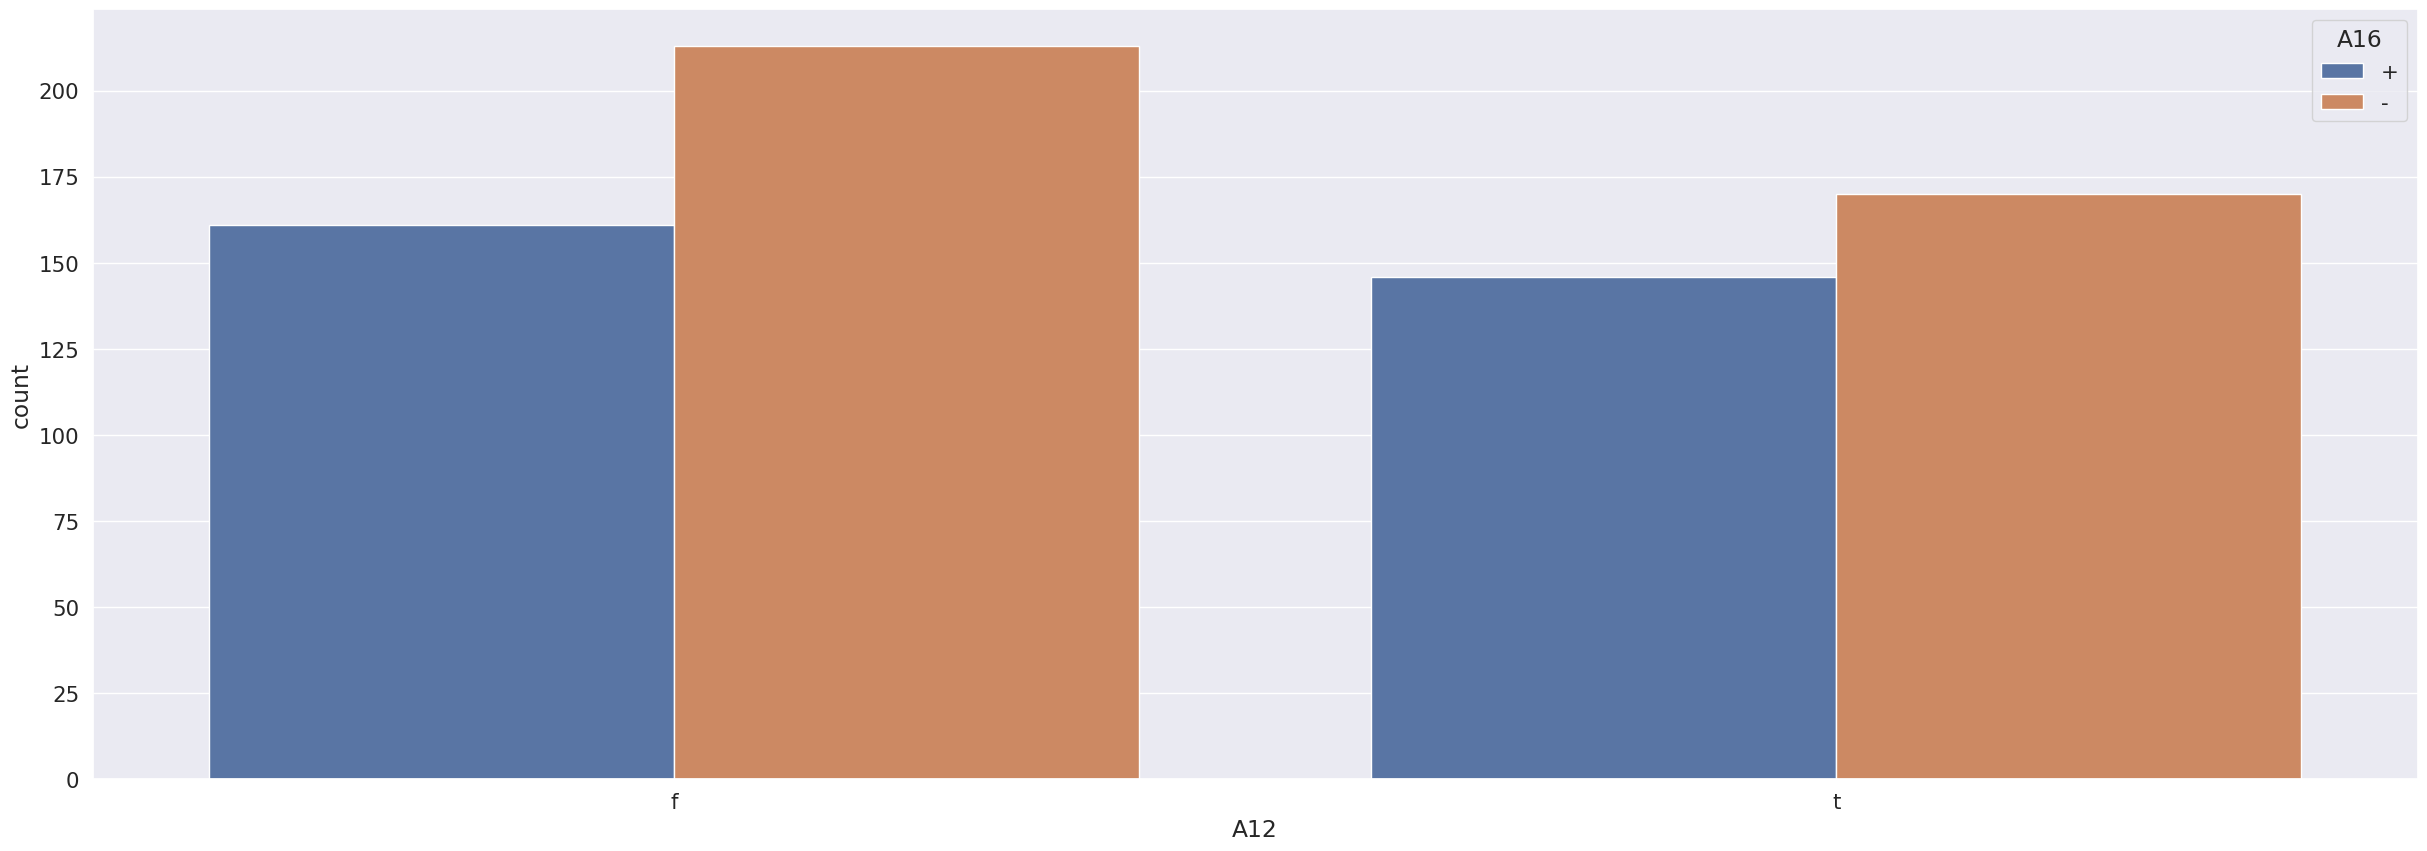

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A12

# Cek Distribusi A13

In [ ]:
print(dataset['A13'].value_counts())

g    625
s     57
p      8
Name: A13, dtype: int64


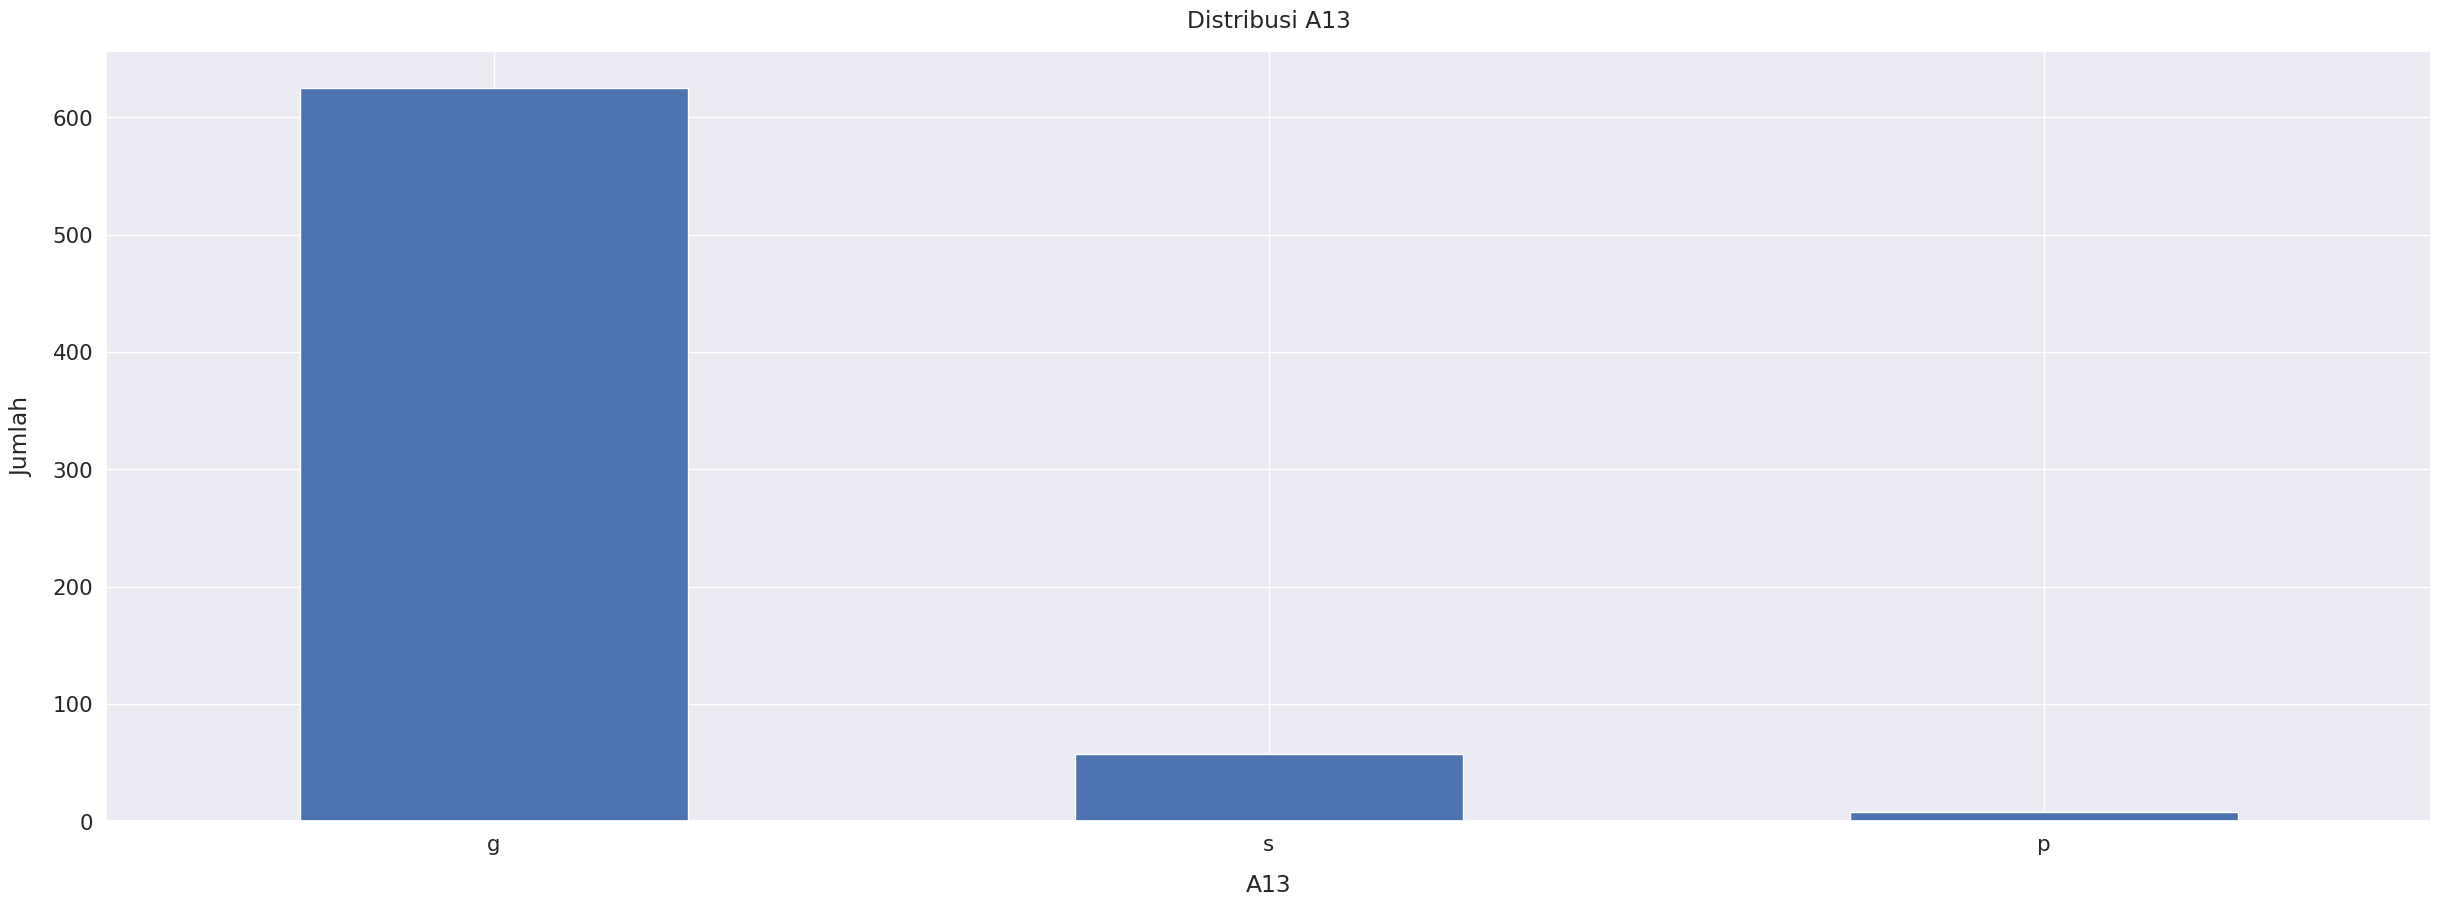

In [ ]:
sns.set(font_scale=1.4)
dataset['A13'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A13", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A13", y=1.02);

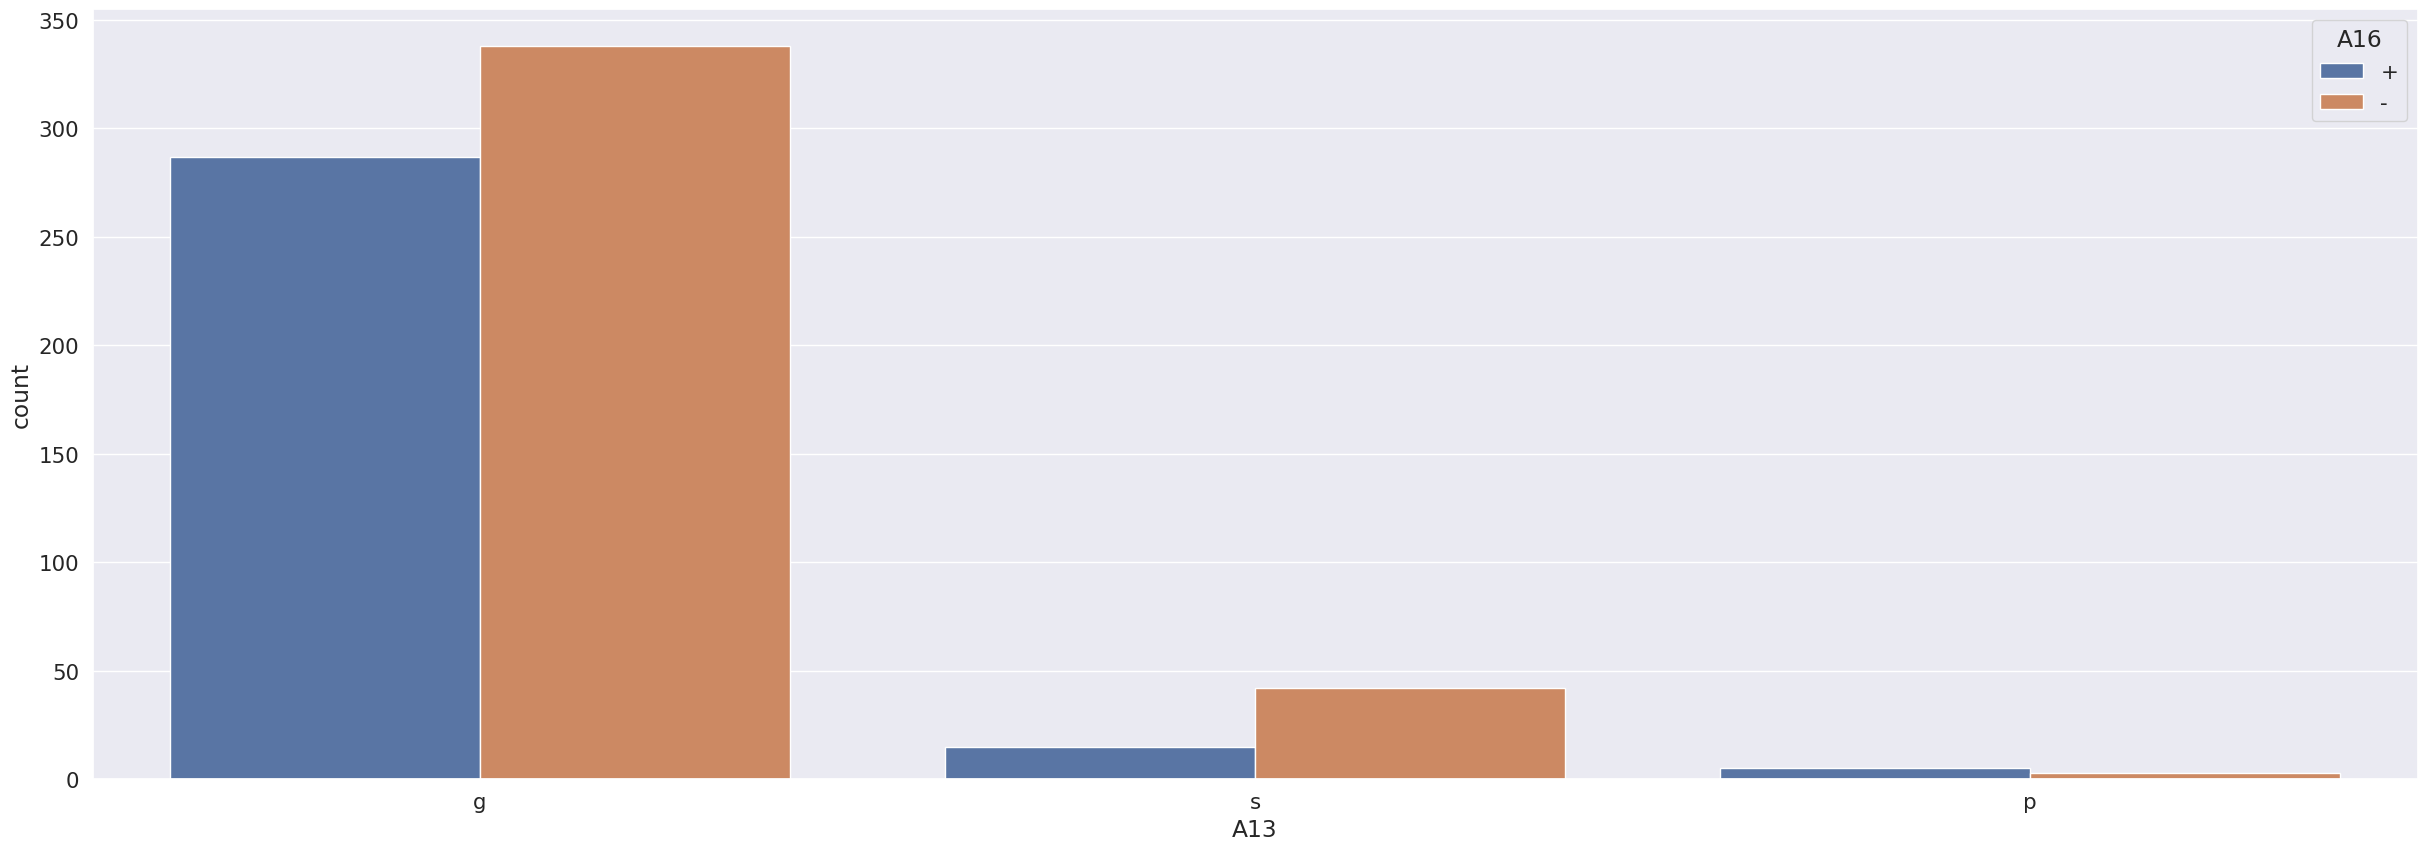

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A13

# Cek Distribusi A14

In [ ]:
print(dataset['A14'].value_counts())

00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093      1
00256      1
Name: A14, Length: 171, dtype: int64


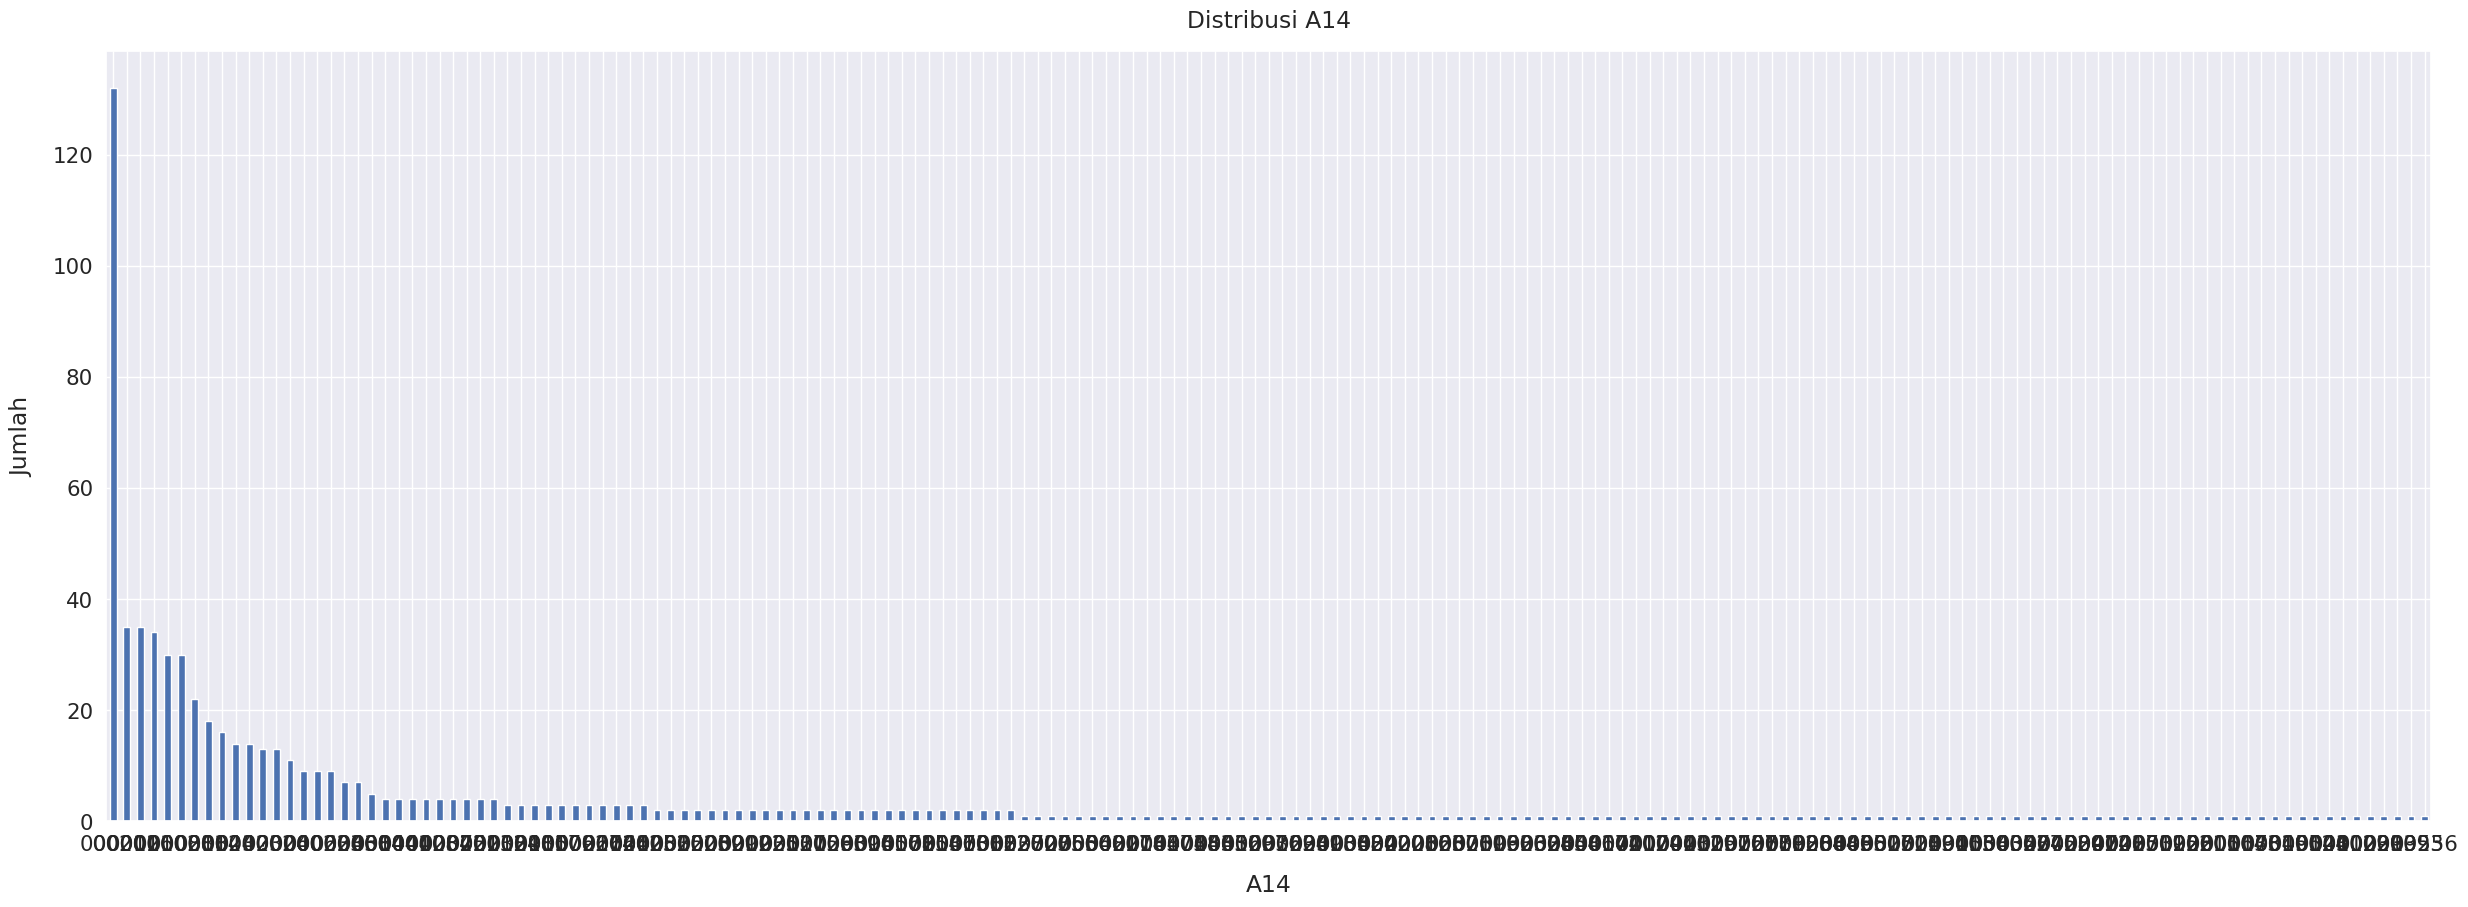

In [ ]:
sns.set(font_scale=1.4)
dataset['A14'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A14", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A14", y=1.02);

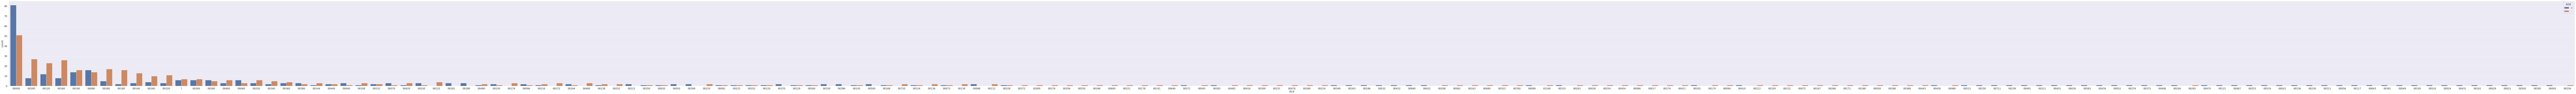

In [ ]:
plt.subplots(figsize = (300,10))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A14

# Cek Distribusi A15

In [ ]:
print(dataset['A15'].value_counts())

0       295
1        29
500      10
1000     10
2         9
       ... 
1704      1
857       1
6700      1
2503      1
750       1
Name: A15, Length: 240, dtype: int64


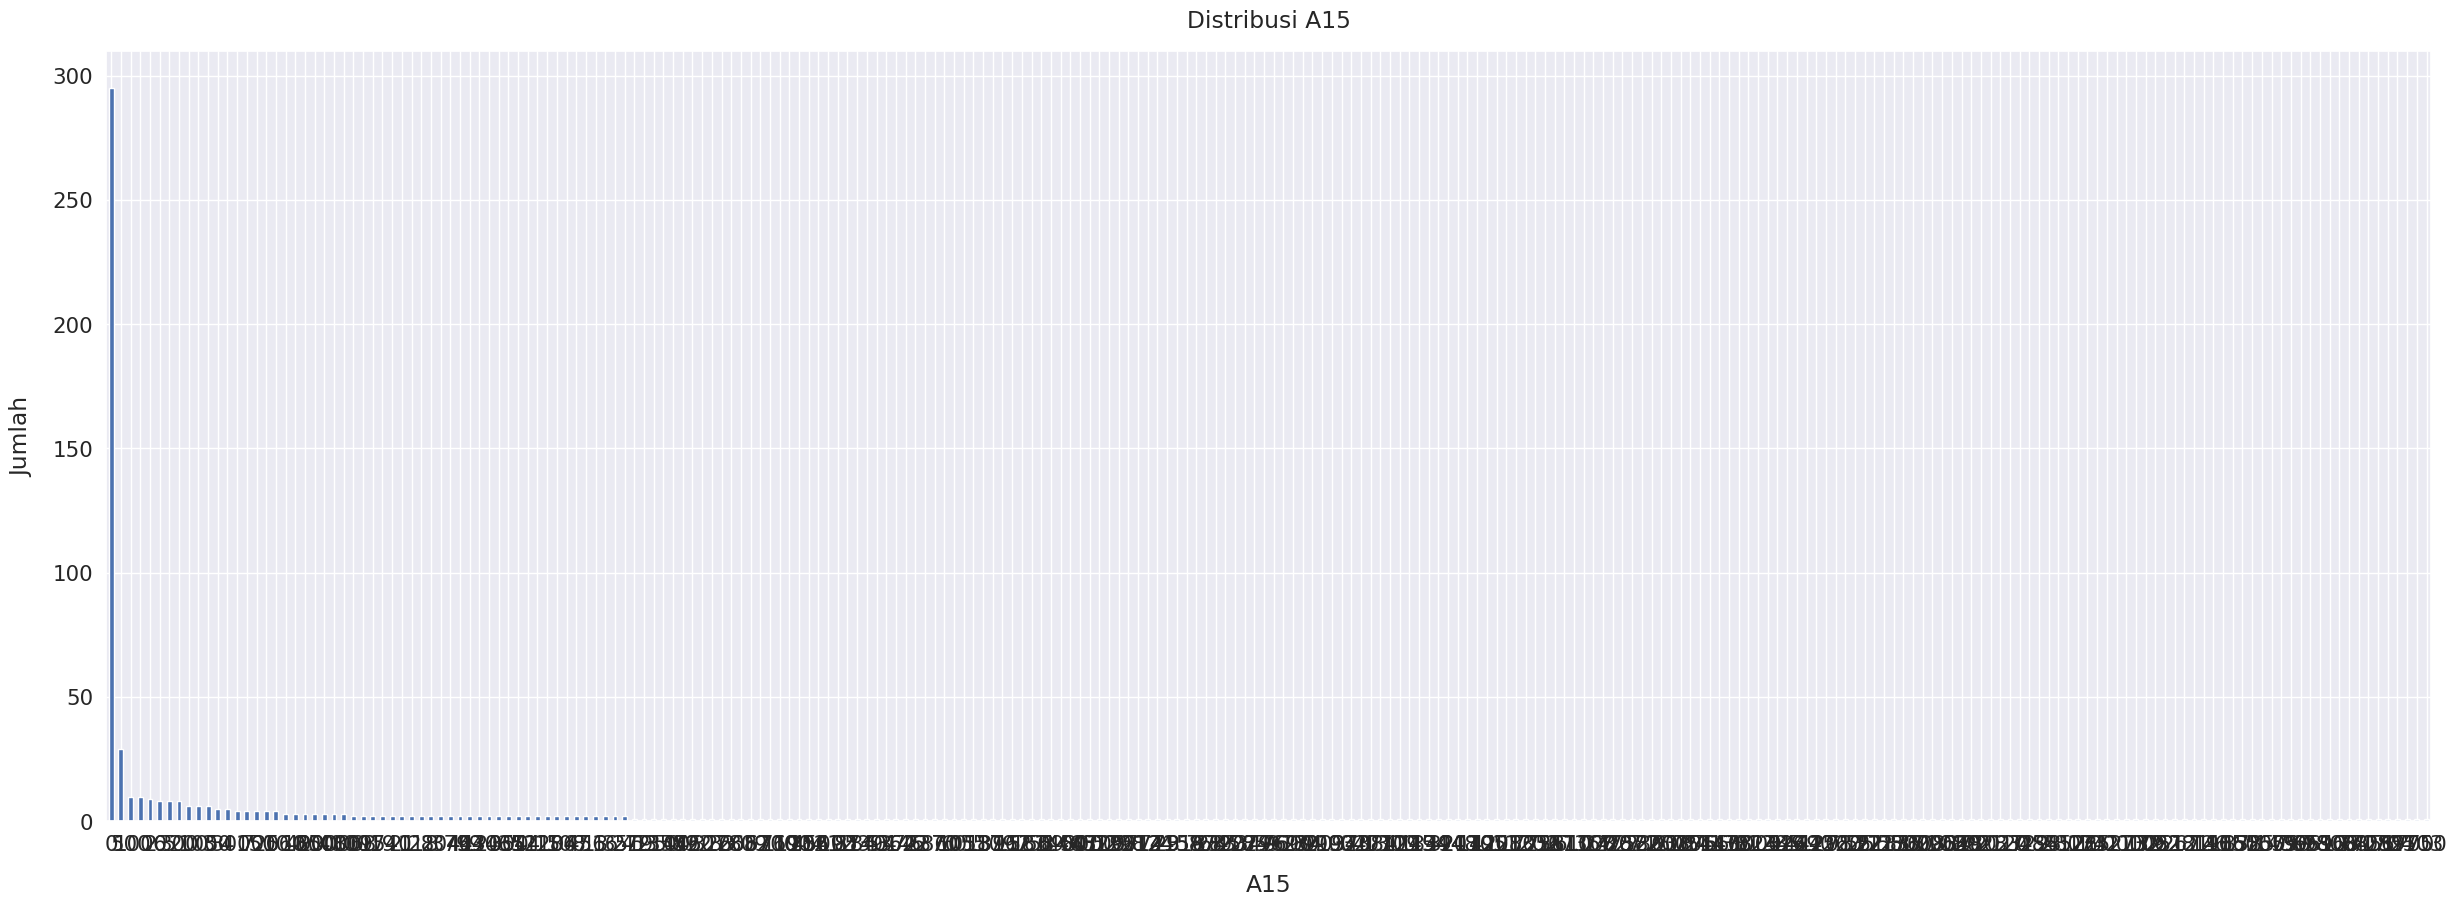

In [ ]:
sns.set(font_scale=1.4)
dataset['A15'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0)
plt.xlabel("A15", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A15", y=1.02);

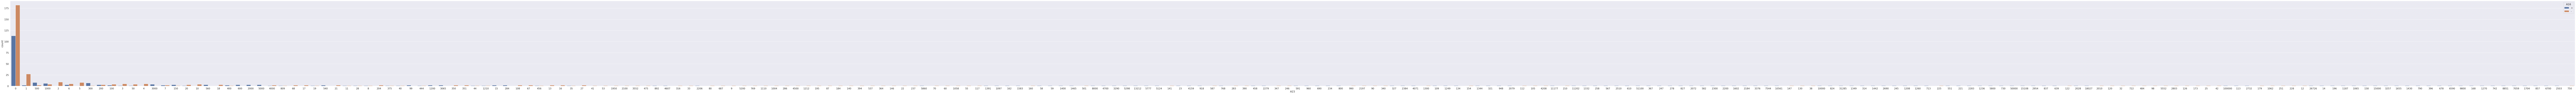

In [ ]:
plt.subplots(figsize = (300,10))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['A16'])
plt.show()

Temuan: A15

### cek korelasi tahap 1

<ipython-input-60-3f5d6d881738>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


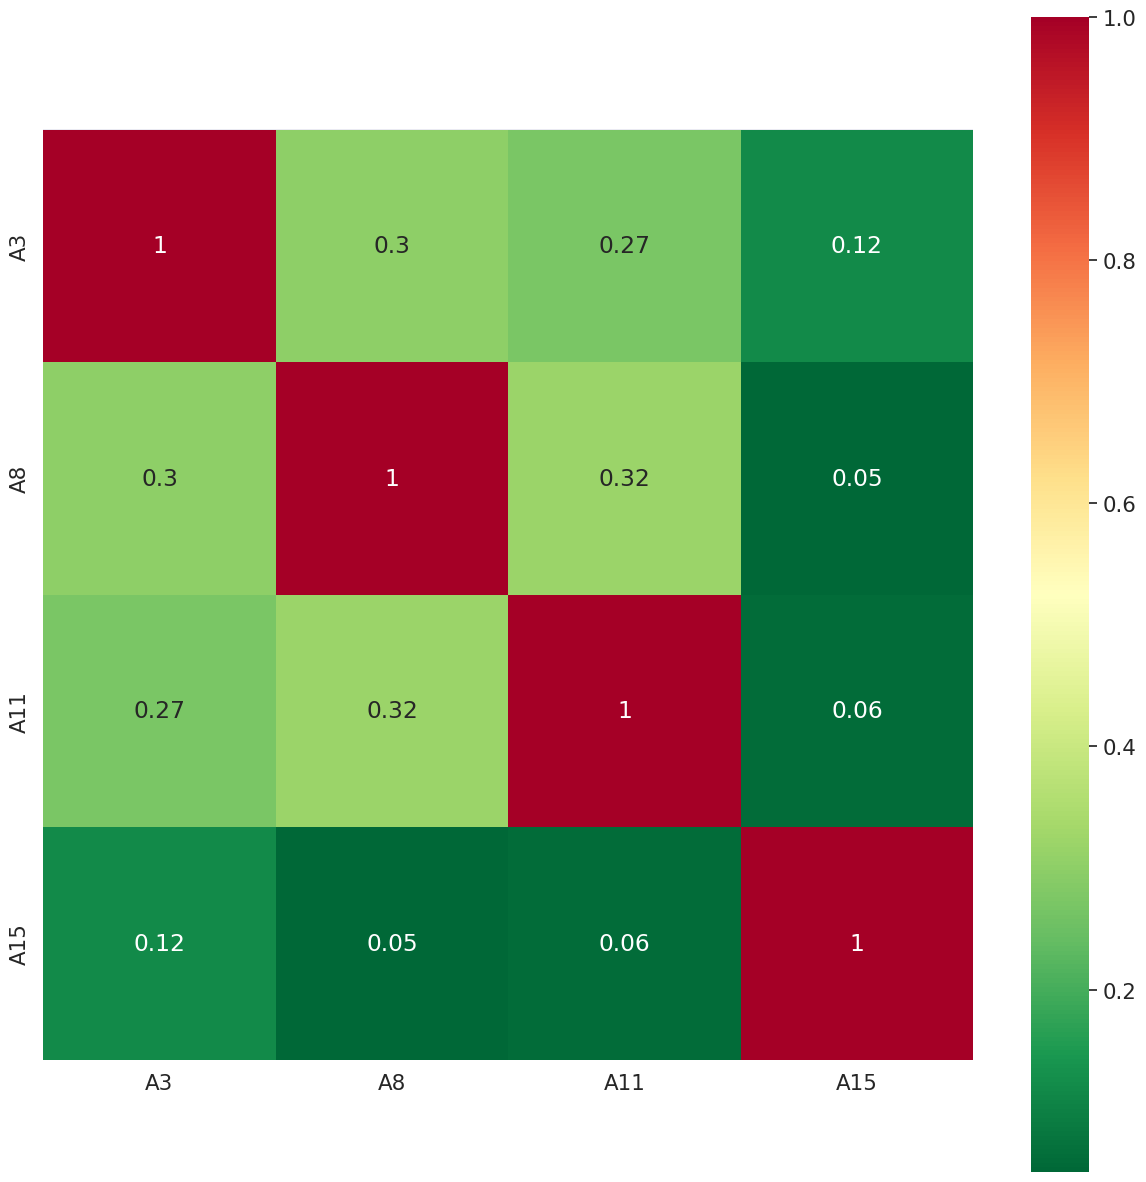

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

**temuan:**
- ada beberapa fitur yang bernilai `?`, maka dapat kita katakan, bahwa `?` merupakan penanda nilai yang hilang
- korelasi matrix tidak bekerja karena tipe data tidak tepat

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Penilaian kualitas data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- Penilaian tingkat kecukupan data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- ada beberapa fitur yang nilainya hilang, harus digunakan tahapan **`memperbaiki nilai yang hilang`**
- distribusi class **`imbalanced`**, disini asesi **tidak melakukan proses perbaikan imbalanced learning**

## BAB 4 – (J.62DMI00.007.1) menentukan object data
silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

**temuan**:

|Nama | Deskripsi |
|-----|-----------|
| A16 | **Label** |
| A15 | Atribut   |
| A14 | Atribut   |
| A13 | Atribut   |
| A12 | Atribut   |
| A11 | Atribut   |
| A10 | Atribut   |
| A9  | Atribut   |
| A8  | Atribut   |
| A7  | Atribut   |
| A6  | Atribut   |
| A5  | Atribut   |
| A4  | Atribut   |
| A3  | Atribut   |
| A2  | Atribut   |
| A1  | Atribut   |


## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

**silakan rubah tanda tanya**

In [ ]:
dataset.replace("?", np.nan, inplace= True)

### cek bentuk dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


### tahap memperbaiki nilai yang hilang


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14'], dtype='object')

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

A1     1.739130
A2     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A14    1.884058
dtype: float64

Pengecekan persentasi perkolom untuk nilai missing value karena tidak ada yang 50% maka tidak perlu ada data yang di drop

**temuan**:

<Axes: >

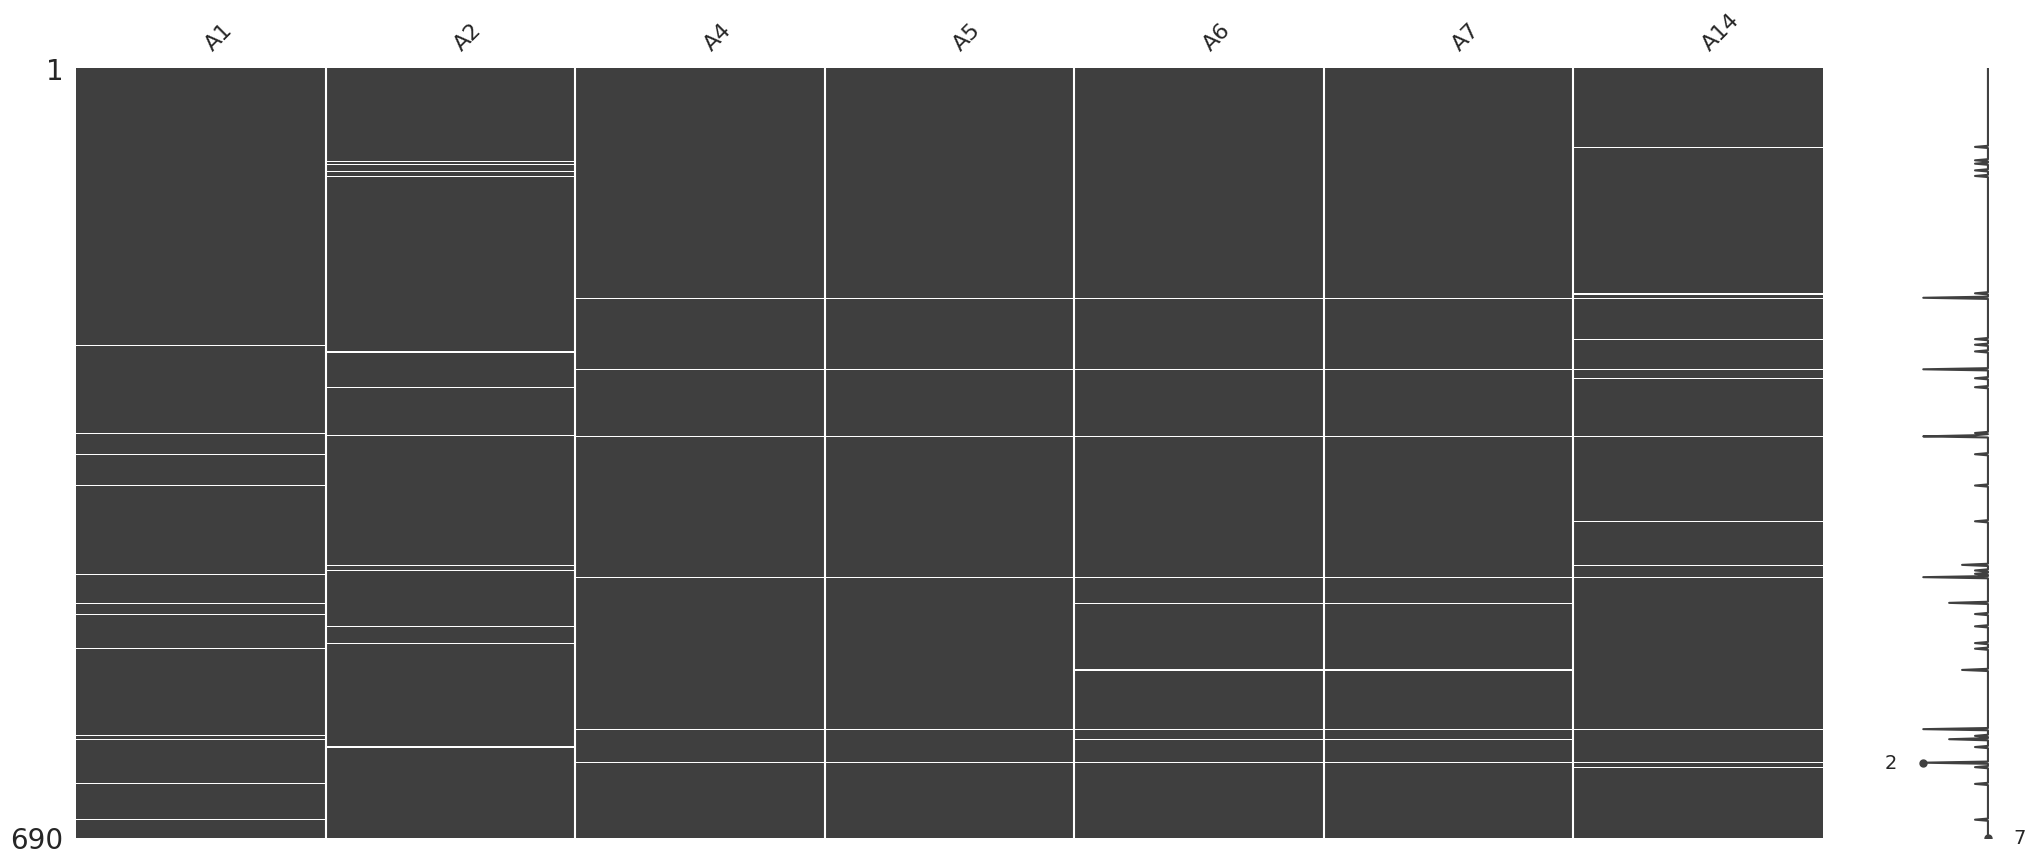

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

**silakan gunakan sesuai kebutuhan**

In [ ]:
from sklearn.preprocessing import LabelEncoder
dataset['A1'] = LabelEncoder().fit_transform(dataset['A1'])
dataset['A4'] = LabelEncoder().fit_transform(dataset['A4'])
dataset['A5'] = LabelEncoder().fit_transform(dataset['A5'])
dataset['A6'] = LabelEncoder().fit_transform(dataset['A6'])
dataset['A7'] = LabelEncoder().fit_transform(dataset['A7'])
dataset['A9'] = LabelEncoder().fit_transform(dataset['A9'])
dataset['A10'] = LabelEncoder().fit_transform(dataset['A10'])
dataset['A12'] = LabelEncoder().fit_transform(dataset['A12'])
dataset['A13'] = LabelEncoder().fit_transform(dataset['A13'])
dataset['A16'] = LabelEncoder().fit_transform(dataset['A16'])

# Perbaiki A1
modus_value=dataset['A1'].mode()
dataset['A1']=dataset['A1'].fillna(modus_value)

# Perbaiki A2
modus_value=dataset['A2'].mode()[0]
dataset['A2']=dataset['A2'].fillna(modus_value)

# Perbaiki A4
modus_value=dataset['A4'].mode()
dataset['A4']=dataset['A4'].fillna(modus_value)

# Perbaiki A5
modus_value=dataset['A5'].mode()
dataset['A5']=dataset['A5'].fillna(modus_value)

# Perbaiki A6
modus_value=dataset['A6'].mode()
dataset['A6']=dataset['A6'].fillna(modus_value)

# Perbaiki A7
modus_value=dataset['A7'].mode()
dataset['A7']=dataset['A7'].fillna(modus_value)

# Perbaiki A14
modus_value=dataset['A14'].mode()[0]
dataset['A14']=dataset['A14'].fillna(modus_value)

In [ ]:
dataset.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690.000000,690,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690,690.000000,690.000000
unique,NaN,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170,NaN,NaN
top,NaN,22.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00000,NaN,NaN
freq,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,NaN,NaN
mean,0.713043,NaN,4.758725,1.250725,0.501449,5.868116,5.124638,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,NaN,1017.385507,0.555072
std,0.489635,NaN,4.978163,0.459735,0.880772,4.353235,2.540608,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,NaN,5210.102598,0.497318
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,0.000000,0.000000
25%,0.000000,NaN,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,0.000000,0.000000
50%,1.000000,NaN,2.750000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,NaN,5.000000,1.000000
75%,1.000000,NaN,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,NaN,395.500000,1.000000


In [ ]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,00202,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,00043,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,00280,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,00100,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,00120,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,00260,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,00200,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,00200,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,00280,750,1


cek kembali

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 86.4+ KB


**temuan**: meski sudah diperbaiki, namun tipe data masih Object, maka perlu dirubah menjadi int atau Float. untuk menentukan tersebut, perlu dilihat kembali distribusi data

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

**silakan pakai sesuai kebutuhan**

In [ ]:
dataset['A2'] = dataset['A2'].astype(str).astype(float)
dataset['A8'] = dataset['A8'].astype(str).astype(float)
dataset['A14'] = dataset['A14'].astype(str).astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


In [ ]:
dataset.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.713043,31.413420,4.758725,1.250725,0.501449,5.868116,5.124638,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,180.547826,1017.385507,0.555072
std,0.489635,11.910293,4.978163,0.459735,0.880772,4.353235,2.540608,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.170000,2.750000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000


### menghapus nilai yang bernilai konstan

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


### cek Korelasi

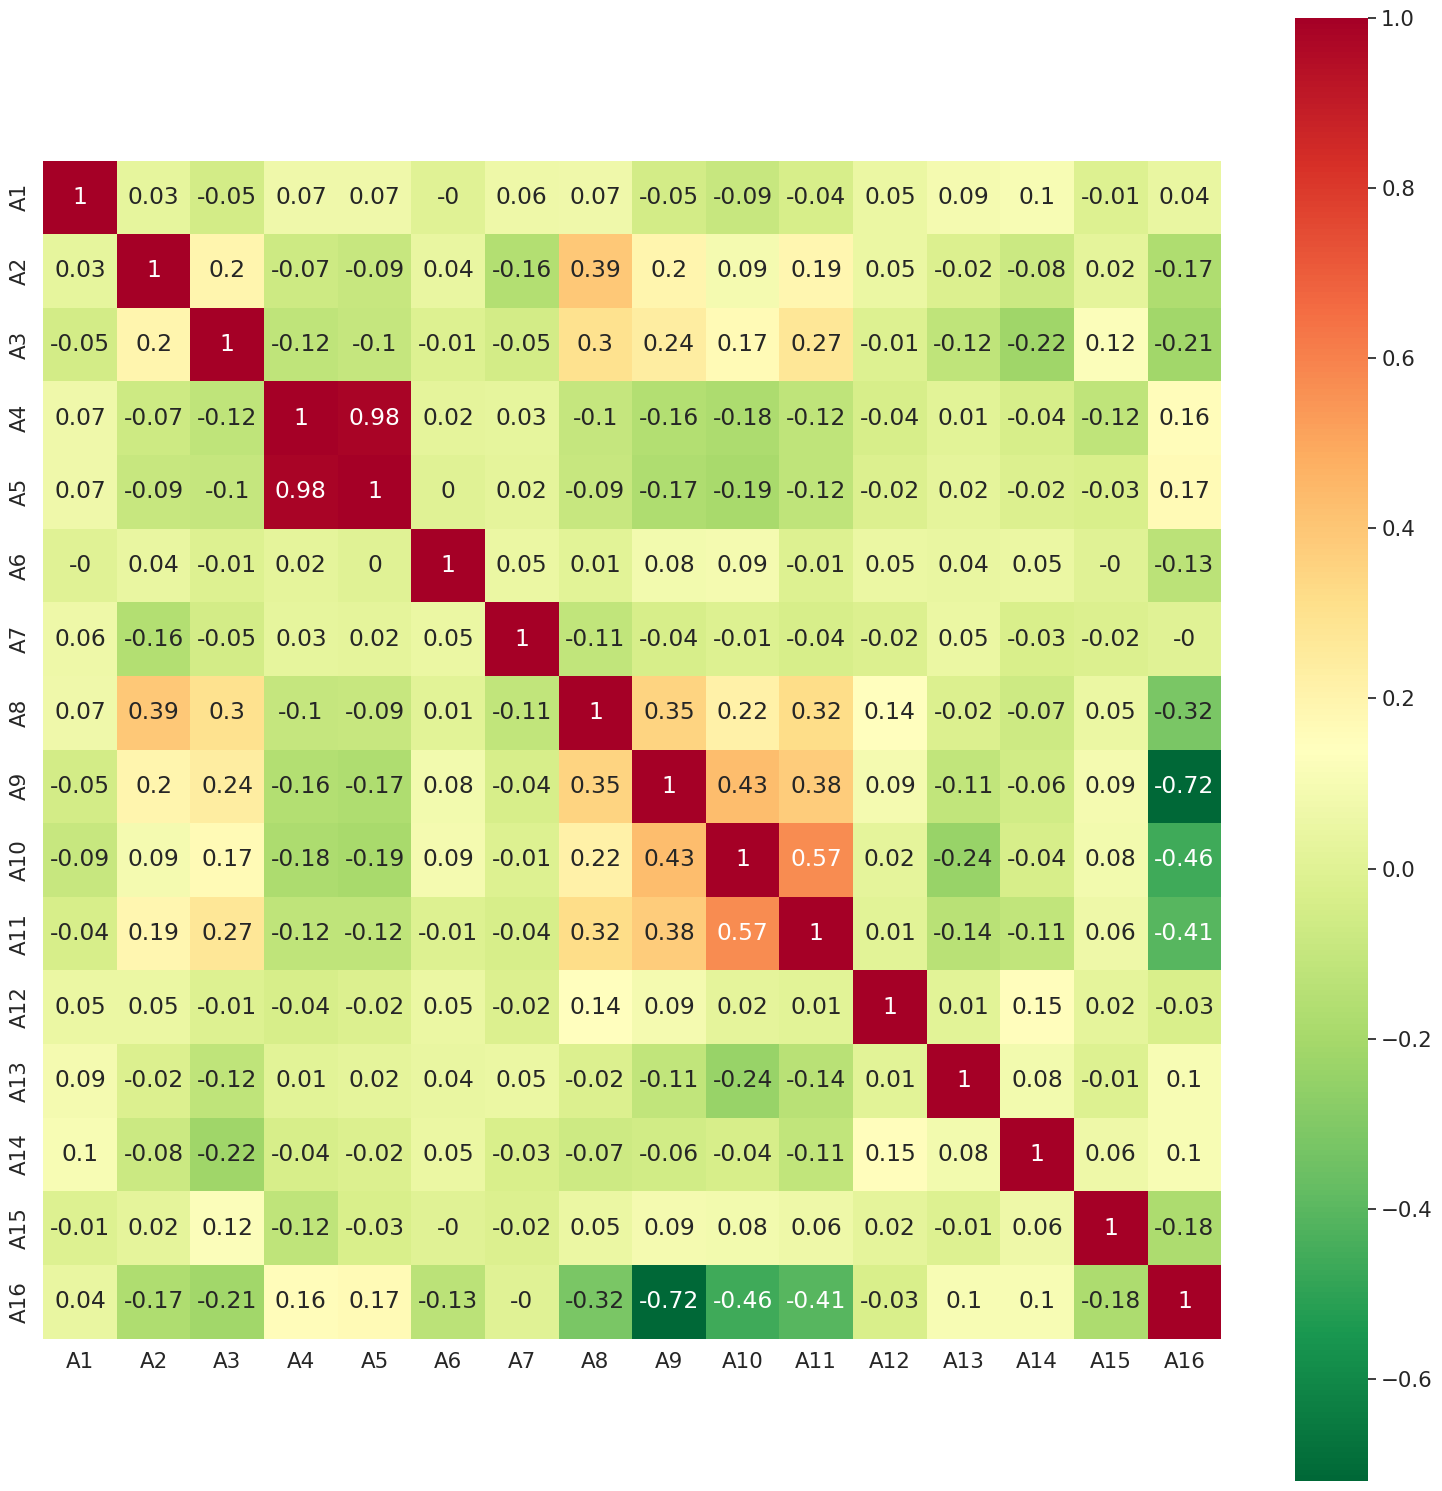

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## BAB 7 – (J.62DMI00.010.1) menentukan label data

**silakan diganti**

In [ ]:
y = dataset['A16']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: A16, Length: 690, dtype: int64

In [ ]:
X = dataset.drop(['A16'], 1)

<ipython-input-82-affc905b0602>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop(['A16'], 1)


In [ ]:
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### Perlakukan data original

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=42)

### Perlakuan data normal

In [ ]:
X_norm = StandardScaler().fit_transform(X)

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.1, random_state=42)

## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [ ]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=5,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 2
model__min_samples_leaf: 5
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=5,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 2
model__min_samples_leaf: 5
model__min_samples_split: 2
model__random_state: 42


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.8599033816425121
Precision pada training set:  0.8599033816425121
Recall pada training set:  0.8599033816425121
Akurasi pada test set:  0.8405797101449275
Precision pada test set:  0.8405797101449275
Recall pada test set:  0.8405797101449275


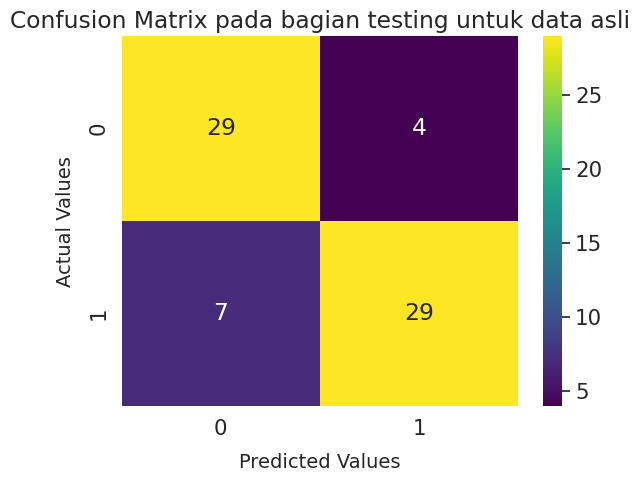

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.8599033816425121
Precision pada training set:  0.8599033816425121
Recall pada training set:  0.8599033816425121
Akurasi pada test set:  0.8405797101449275
Precision pada test set:  0.8405797101449275
Recall pada test set:  0.8405797101449275


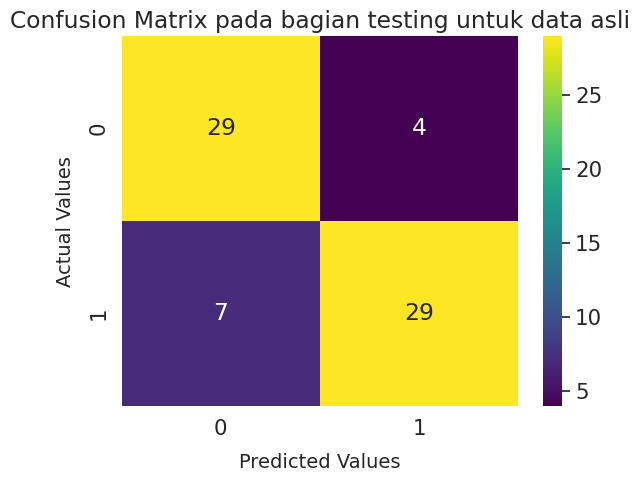

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),

         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.859903,0.84058
1,Machine Learning Data Normalisasi,0.859903,0.84058


In [ ]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),

                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.84058,0.84058,0.84058
1,Machine Learning Data Normalisasi,0.84058,0.84058,0.84058


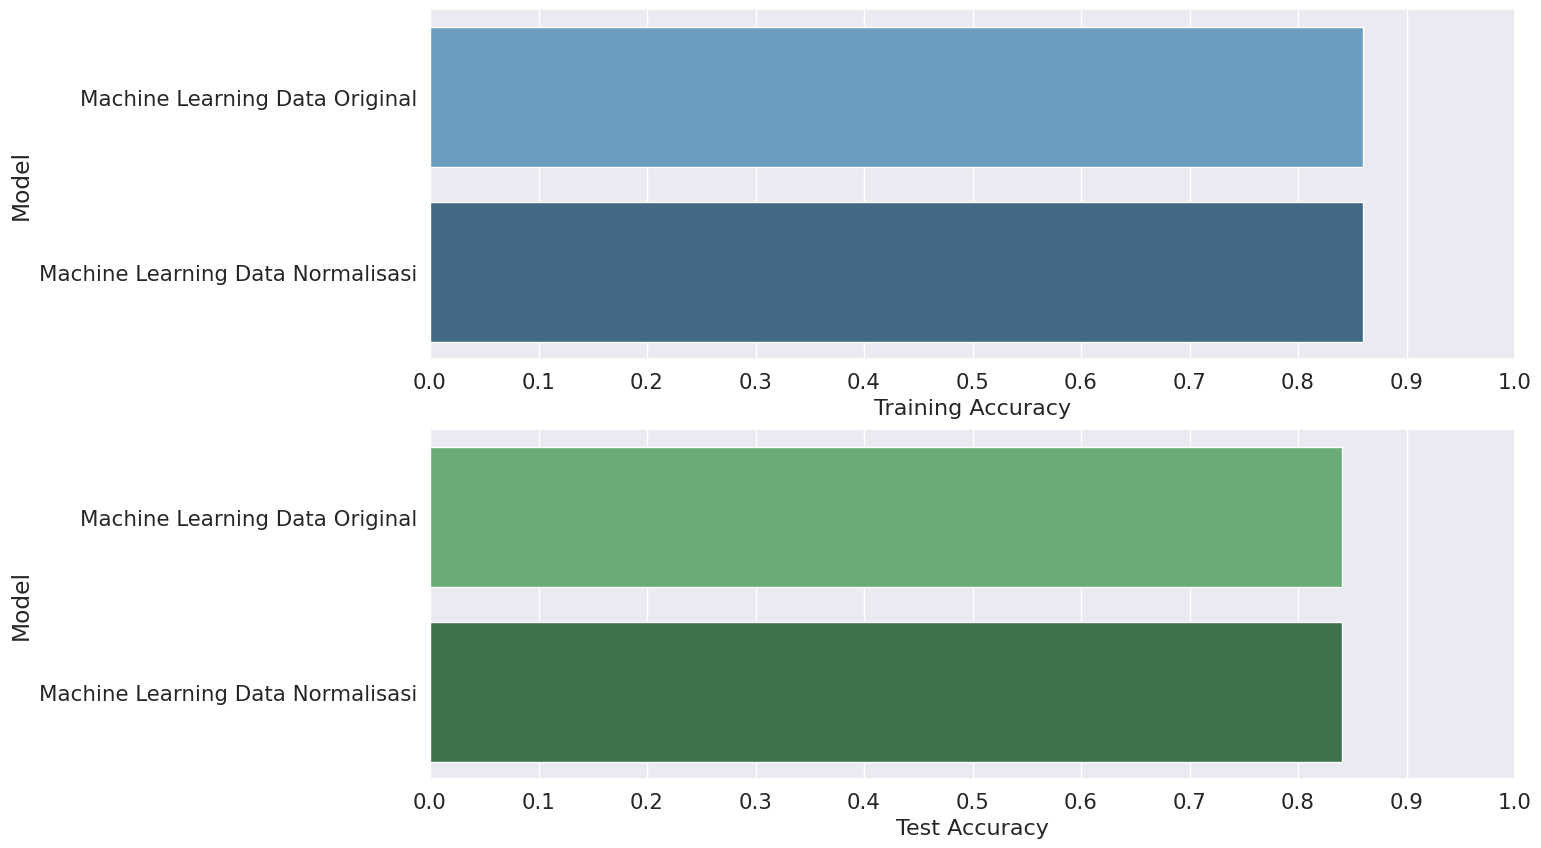

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [ ]:
dataset.nunique()

A1       3
A2     349
A3     215
A4       4
A5       4
A6      15
A7      10
A8     132
A9       2
A10      2
A11     23
A12      2
A13      3
A14    170
A15    240
A16      2
dtype: int64

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [ ]:
from sklearn import tree

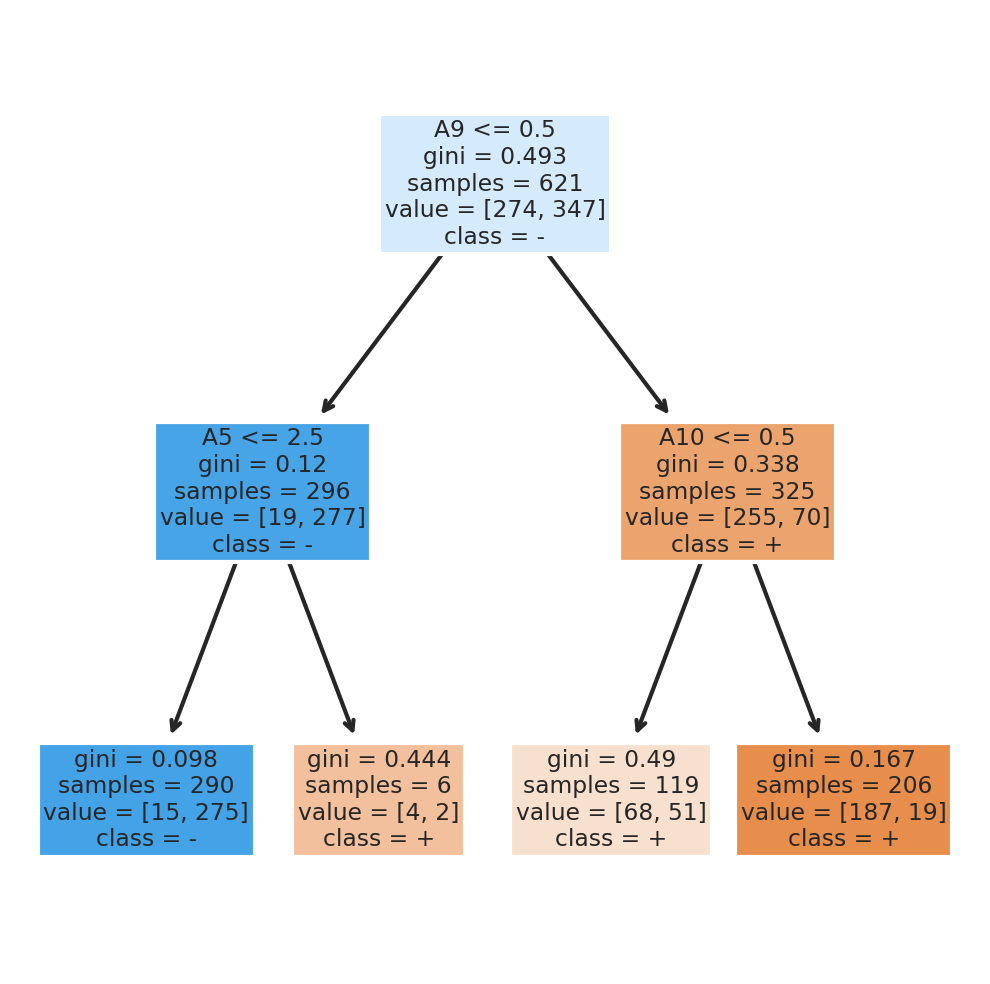

In [ ]:
fn=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"]
cn=['+','-']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
# feature_importances = ori_classifier_dt.best_estimator_.named_steps["model"].feature_importances_
# feature_importances

In [ ]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

   name      coef
8    A9  0.882010
9   A10  0.093604
4    A5  0.024386
0    A1  0.000000
1    A2  0.000000
2    A3  0.000000
3    A4  0.000000
5    A6  0.000000
6    A7  0.000000
7    A8  0.000000
10  A11  0.000000
11  A12  0.000000
12  A13  0.000000
13  A14  0.000000
14  A15  0.000000


,name,coef
0,A1,0.000000
1,A2,0.000000
2,A3,0.000000
3,A4,0.000000
4,A5,0.024386
5,A6,0.000000
6,A7,0.000000
7,A8,0.000000
8,A9,0.882010
9,A10,0.093604


In [ ]:
# tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"])

In [ ]:
# fn=["xxx"]
# cn=['xxx', 'xxx']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
#                feature_names = fn,
#                class_names=cn,
#                filled = True);
# fig.savefig('imagename.png')

cara baca:
Jika Bilirubin <=2.45 maka ke node kiri, selain itu ke kanan.